In [285]:
# 1. Data Manipulation dan Umum
import numpy as np
import pandas as pd
from collections import Counter

# 2. Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing dan Evaluasi Model
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    
)

# 4. Model Klasifikasi Scikit-learn
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# 5. Model Gradient Boosting Tambahan
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier

# 6. Penanganan Data Tidak Seimbang (Imbalanced-learn)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

# 7. Category Encoders
import category_encoders as ce

# Tambahan jika diperlukan
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV


# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

In [286]:
df_read = pd.read_csv('../datasets/cleanedfix2.csv')

In [287]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12296 non-null  object
 1   Age_band_of_driver           12296 non-null  object
 2   Sex_of_driver                12296 non-null  object
 3   Vehicle_driver_relation      12296 non-null  object
 4   Driving_experience           12296 non-null  object
 5   Type_of_vehicle              12296 non-null  object
 6   Owner_of_vehicle             12296 non-null  object
 7   Area_accident_occured        12296 non-null  object
 8   Lanes_or_Medians             12296 non-null  object
 9   Road_allignment              12296 non-null  object
 10  Types_of_Junction            12296 non-null  object
 11  Road_surface_type            12296 non-null  object
 12  Road_surface_conditions      12296 non-null  object
 13  Light_conditions             12

In [247]:
df_read.isnull().sum()

Time                           0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
Day                            0
dtype: int64

In [248]:
df_read.iloc[0:5, 0:7]

Time Age_band_of_driver Sex_of_driver Vehicle_driver_relation  \
0  17:00:00              18-30          Male                Employee   
1  17:00:00              31-50          Male                Employee   
2  17:00:00              18-30          Male                Employee   
3  01:00:00              18-30          Male                Employee   
4  01:00:00              18-30          Male                Employee   

  Driving_experience     Type_of_vehicle Owner_of_vehicle  
0              1-2yr     Private Vehicle            Owner  
1         Above 10yr    Public Transport            Owner  
2              1-2yr  Commercial Vehicle            Owner  
3             5-10yr    Public Transport     Governmental  
4              2-5yr     Private Vehicle            Owner

In [249]:
df_read.iloc[0:5, 7:14]

Area_accident_occured                                  Lanes_or_Medians  \
0     Residential areas  Two-way (divided with broken lines road marking)   
1          Office areas                                 Undivided Two way   
2    Recreational areas                                             other   
3          Office areas                                             other   
4      Industrial areas                                             other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                 Tangent road with flat terrain       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  
0     Asphalt roads                     Dry               Daylight  
1     Asphalt roads                     Dry               Daylight  
2     Asphalt roads                     Dry               Daylight  
3       Earth roads                     Dry  Darkness - lights lit  
4     Asphalt roads                     Dry  Darkness - lights lit

In [250]:
df_read.iloc[0:5, 14:23]

Weather_conditions            Type_of_collision  \
0             Normal  Stationary Object Collision   
1             Normal            Vehicle Collision   
2             Normal  Stationary Object Collision   
3             Normal            Vehicle Collision   
4             Normal            Vehicle Collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Moving forward   
1                            2                     2   Moving forward   
2                            2                     2   Moving forward   
3                            2                     2   Moving forward   
4                            2                     2   Moving forward   

  Casualty_severity   Cause_of_accident Accident_severity     Day  
0                na     Moving Backward     Slight Injury  Monday  
1                na            Speeding     Slight Injury  Monday  
2                 3  Unsafe Lane Change    Serious Injury  Monday  
3                 3  Unsafe Lane Change     Slight Injury  Sunday  
4                na            Speeding     Slight Injury  Sunday

buat mix 

    Time : KFOLD
    Age  : Label
    Sex_of_drive  : One hot
    vehicle driver realtion : One hot
    Driving expe : Label
    Type of vehicle : kfold target
    Owner of vehicle :  One hot
    Area accident occured : Kfold
    Lanes_or_Medians : Kfold
    Road_allignment : Kfold
    Types of Junction : Kfold
    Road_surface : Ohe
    Road_surface_conditions : ohe
    Light conditions : ohe
    Weather conditions : kfold
    Type of colision : Kfold
    Vehicle Movement : Kfold
    Casualty_severity : Kfold / Label (cek lebih lanjut)
    Cause of accident : Kfold
    Day : Ohe 





In [251]:
df_read.iloc[0:5, 14:23]

Weather_conditions            Type_of_collision  \
0             Normal  Stationary Object Collision   
1             Normal            Vehicle Collision   
2             Normal  Stationary Object Collision   
3             Normal            Vehicle Collision   
4             Normal            Vehicle Collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Moving forward   
1                            2                     2   Moving forward   
2                            2                     2   Moving forward   
3                            2                     2   Moving forward   
4                            2                     2   Moving forward   

  Casualty_severity   Cause_of_accident Accident_severity     Day  
0                na     Moving Backward     Slight Injury  Monday  
1                na            Speeding     Slight Injury  Monday  
2                 3  Unsafe Lane Change    Serious Injury  Monday  
3                 3  Unsafe Lane Change     Slight Injury  Sunday  
4                na            Speeding     Slight Injury  Sunday

In [252]:
fitur_kategori = df_read.columns[df_read.dtypes == 'object'].tolist()
fitur_kategori

['Time',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_severity',
 'Cause_of_accident',
 'Accident_severity',
 'Day']

In [253]:
df_read['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10401
Serious Injury     1737
Fatal injury        158
Name: count, dtype: int64

In [254]:
df_read.isnull().sum()

Time                           0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
Day                            0
dtype: int64

# Encoding

In [255]:
le = LabelEncoder()
df_le = df_read.copy()

for nama_kategori in fitur_kategori:
    df_le[nama_kategori] = le.fit_transform(df_le[[nama_kategori]])


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: D

In [256]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12296 non-null  int64
 1   Age_band_of_driver           12296 non-null  int64
 2   Sex_of_driver                12296 non-null  int64
 3   Vehicle_driver_relation      12296 non-null  int64
 4   Driving_experience           12296 non-null  int64
 5   Type_of_vehicle              12296 non-null  int64
 6   Owner_of_vehicle             12296 non-null  int64
 7   Area_accident_occured        12296 non-null  int64
 8   Lanes_or_Medians             12296 non-null  int64
 9   Road_allignment              12296 non-null  int64
 10  Types_of_Junction            12296 non-null  int64
 11  Road_surface_type            12296 non-null  int64
 12  Road_surface_conditions      12296 non-null  int64
 13  Light_conditions             12296 non-null  i

In [257]:
df_read['Day'].head(20)

0        Monday
1        Monday
2        Monday
3        Sunday
4        Sunday
5        Friday
6     Wednesday
7        Friday
8        Friday
9        Friday
10     Saturday
11     Saturday
12     Thursday
13     Thursday
14     Thursday
15       Monday
16       Monday
17       Monday
18       Monday
19      Tuesday
Name: Day, dtype: object

In [258]:
X = df_le.drop(columns=['Accident_severity'])
y = df_le['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [243]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train_ohe, "One-Hot Encoding")
score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train_te, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train_ohe, y_train).mean(),
    'Label Encoding': mutual_info_classif(X_train, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train_te, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:


Label Encoding: 0.8505

Mutual Information Scores:


KeyboardInterrupt: 

In [259]:
model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Time                           0.116965
Day                            0.078127
Cause_of_accident              0.076681
Area_accident_occured          0.069567
Driving_experience             0.065911
Lanes_or_Medians               0.059192
Age_band_of_driver             0.055059
Type_of_vehicle                0.052664
Types_of_Junction              0.050240
Number_of_vehicles_involved    0.048533
Vehicle_movement               0.045841
Number_of_casualties           0.043133
Type_of_collision              0.036717
Casualty_severity              0.035835
Road_allignment                0.031301
Light_conditions               0.024222
Weather_conditions             0.023999
Road_surface_conditions        0.021661
Vehicle_driver_relation        0.021616
Road_surface_type              0.015805
Owner_of_vehicle               0.015109
Sex_of_driver                  0.011822
dtype: float64


In [260]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

le_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
le_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

le_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
le_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

le_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
le_knn_cv = knn_cv_scores.mean()

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

le_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
le_logreg_cv = logreg_cv_scores.mean()

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)

le_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
le_extra_trees_cv = extra_trees_cv_scores.mean()

print("Random Forest F1 Score:", le_rf_f1_score, "Cross-Validation F1 Score:", le_rf_cv)
print("XGBoost F1 Score:", le_xgb_f1_score, "Cross-Validation F1 Score:", le_xgb_cv)
print("KNN F1 Score:", le_knn_f1_score, "Cross-Validation F1 Score:", le_knn_cv)
print("Logistic Regression F1 Score:", le_logreg_f1_score, "Cross-Validation F1 Score:", le_logreg_cv)
print("Extra Trees F1 Score:", le_extra_trees_f1_score, "Cross-Validation F1 Score:", le_extra_trees_cv)


KeyboardInterrupt: 

In [ ]:
df_le.isnull().sum()

Time                           0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
Day                            0
dtype: int64

# Ohe

In [288]:
df_ohe = df_read.copy()

le_target = LabelEncoder()
df_ohe['Accident_severity'] = le_target.fit_transform(df_ohe['Accident_severity'])

categorical_features = df_ohe.select_dtypes(include=['object','category']).columns.tolist()

ohe = OneHotEncoder(sparse_output=False) 
ohe_encoded = ohe.fit_transform(df_ohe[categorical_features])

ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(categorical_features))

df_ohe.drop(columns=categorical_features, inplace=True)
df_ohe = pd.concat([df_ohe, ohe_df], axis=1)

df_ohe.head()


Number_of_vehicles_involved  Number_of_casualties  Accident_severity  \
0                            2                     2                  2   
1                            2                     2                  2   
2                            2                     2                  1   
3                            2                     2                  2   
4                            2                     2                  2   

   Time_00:00:00  Time_01:00:00  Time_02:00:00  Time_03:00:00  Time_04:00:00  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            1.0            0.0            0.0            0.0   
4            0.0            1.0            0.0            0.0            0.0   

   Time_05:00:00  Time_06:00:00  ...  Cause_of_accident_Speeding  \
0            0.0            0.0  ...                         0.0   
1            0.0            0.0  ...                         1.0   
2            0.0            0.0  ...                         0.0   
3            0.0            0.0  ...                         0.0   
4            0.0            0.0  ...                         1.0   

   Cause_of_accident_Unknown  Cause_of_accident_Unsafe Lane Change  \
0                        0.0                                   0.0   
1                        0.0                                   0.0   
2                        0.0                                   1.0   
3                        0.0                                   1.0   
4                        0.0                                   0.0   

   Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0         0.0         1.0           0.0         0.0           0.0   
1         0.0         1.0           0.0         0.0           0.0   
2         0.0         1.0           0.0         0.0           0.0   
3         0.0         0.0           0.0         1.0           0.0   
4         0.0         0.0           0.0         1.0           0.0   

   Day_Tuesday  Day_Wednesday  
0          0.0            0.0  
1          0.0            0.0  
2          0.0            0.0  
3          0.0            0.0  
4          0.0            0.0  

[5 rows x 151 columns]

In [289]:
df_ohe.dropna(axis=0, inplace=True)

In [290]:
X_ohe = df_ohe.drop(columns=['Accident_severity'])
y_ohe = df_ohe['Accident_severity']

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42, stratify=y_ohe)

In [264]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train_te, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train_te, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:


KeyboardInterrupt: 

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

ohe_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
ohe_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

ohe_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
ohe_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

ohe_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
ohe_knn_cv = knn_cv_scores.mean()

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

ohe_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
ohe_logreg_cv = logreg_cv_scores.mean()

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)

ohe_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
ohe_extra_trees_cv = extra_trees_cv_scores.mean()

print("Random Forest F1 Score:", ohe_rf_f1_score, "Cross-Validation F1 Score:", ohe_rf_cv)
print("XGBoost F1 Score:", ohe_xgb_f1_score, "Cross-Validation F1 Score:", ohe_xgb_cv)
print("KNN F1 Score:", ohe_knn_f1_score, "Cross-Validation F1 Score:", ohe_knn_cv)
print("Logistic Regression F1 Score:", ohe_logreg_f1_score, "Cross-Validation F1 Score:", ohe_logreg_cv)
print("Extra Trees F1 Score:", ohe_extra_trees_f1_score, "Cross-Validation F1 Score:", ohe_extra_trees_cv)


# Target

In [265]:
df_target = df_read.copy()

if df_target['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_target['Accident_severity'] = le_target.fit_transform(df_target['Accident_severity'])

encoder = ce.TargetEncoder(cols=categorical_features,smoothing=0.5 ,min_samples_leaf=3)
df_target[categorical_features] = encoder.fit_transform(df_target[categorical_features], df_target['Accident_severity'])

df_target.head()


Time  Age_band_of_driver  Sex_of_driver  Vehicle_driver_relation  \
0  1.857843            1.829972       1.831932                 1.834806   
1  1.857843            1.841538       1.831932                 1.834806   
2  1.857843            1.829972       1.831932                 1.834806   
3  1.813433            1.829972       1.831932                 1.834806   
4  1.813433            1.829972       1.831932                 1.834806   

   Driving_experience  Type_of_vehicle  Owner_of_vehicle  \
0            1.846154         1.833100          1.831243   
1            1.831490         1.830928          1.831243   
2            1.846154         1.826220          1.831243   
3            1.834768         1.830928          1.843420   
4            1.819923         1.833100          1.831243   

   Area_accident_occured  Lanes_or_Medians  Road_allignment  ...  \
0               1.806796          1.830692         1.833097  ...   
1               1.839757          1.829294         1.833097  ...   
2               1.829268          1.829268         1.833097  ...   
3               1.839757          1.829268         1.838323  ...   
4               1.842105          1.829268         1.833097  ...   

   Light_conditions  Weather_conditions  Type_of_collision  \
0          1.841548            1.826914           1.823177   
1          1.841548            1.826914           1.838120   
2          1.841548            1.826914           1.823177   
3          1.818293            1.826914           1.838120   
4          1.818293            1.826914           1.838120   

   Number_of_vehicles_involved  Number_of_casualties  Vehicle_movement  \
0                            2                     2          1.834306   
1                            2                     2          1.834306   
2                            2                     2          1.834306   
3                            2                     2          1.834306   
4                            2                     2          1.834306   

   Casualty_severity  Cause_of_accident  Accident_severity       Day  
0           1.840812           1.811785                  2  1.864286  
1           1.840812           1.796687                  2  1.864286  
2           1.826444           1.831912                  1  1.864286  
3           1.826444           1.831912                  2  1.823329  
4           1.840812           1.796687                  2  1.823329  

[5 rows x 23 columns]

In [266]:
X = df_target.drop(columns=['Accident_severity'])
y = df_target['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [267]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
score_te = evaluate_encoding(X_train, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:
Target Encoding: 0.8493

Mutual Information Scores:
Target Encoding: 0.0035


In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Time                           0.111966
Day                            0.079783
Cause_of_accident              0.077259
Area_accident_occured          0.066539
Driving_experience             0.064127
Lanes_or_Medians               0.059084
Type_of_vehicle                0.056013
Age_band_of_driver             0.055336
Types_of_Junction              0.050964
Number_of_vehicles_involved    0.048983
Vehicle_movement               0.044090
Number_of_casualties           0.043403
Type_of_collision              0.039324
Casualty_severity              0.032309
Road_allignment                0.031640
Light_conditions               0.027821
Weather_conditions             0.023204
Vehicle_driver_relation        0.022643
Road_surface_conditions        0.021015
Owner_of_vehicle               0.018281
Road_surface_type              0.015172
Sex_of_driver                  0.011047
dtype: float64


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

target_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
target_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

target_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
target_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

target_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
target_knn_cv = knn_cv_scores.mean()

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

target_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
target_logreg_cv = logreg_cv_scores.mean()

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)

target_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
target_extra_trees_cv = extra_trees_cv_scores.mean()

print("Random Forest F1 Score:", target_rf_f1_score, "Cross-Validation F1 Score:", target_rf_cv)
print("XGBoost F1 Score:", target_xgb_f1_score, "Cross-Validation F1 Score:", target_xgb_cv)
print("KNN F1 Score:", target_knn_f1_score, "Cross-Validation F1 Score:", target_knn_cv)
print("Logistic Regression F1 Score:", target_logreg_f1_score, "Cross-Validation F1 Score:", target_logreg_cv)
print("Extra Trees F1 Score:", target_extra_trees_f1_score, "Cross-Validation F1 Score:", target_extra_trees_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:04:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:04:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:05:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Random Forest F1 Score: 0.7840172916795737 Cross-Validation F1 Score: 0.7798527841808898
XGBoost F1 Score: 0.8084595275303538 Cross-Validation F1 Score: 0.7908189065517094
KNN F1 Score: 0.8063594382734935 Cross-Validation F1 Score: 0.7886176582865867
Logistic Regression F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
Extra Trees F1 Score: 0.7955326906115339 Cross-Validation F1 Score: 0.7877096303207196


In [ ]:
# (0.8482142857142857,
#  0.849025974025974,
#  np.float64(0.8483270586498358),
#  np.float64(0.8403691847129728))

# KFOLD

In [291]:
from sklearn.model_selection import KFold

df_kfold = df_read.copy()

if df_kfold['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_kfold['Accident_severity'] = le_target.fit_transform(df_kfold['Accident_severity'])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

df_kfold_encoded = df_kfold.copy()

for col in categorical_features:
    df_kfold_encoded[col + '_kfold'] = 0
    
    for train_idx, val_idx in kf.split(df_kfold_encoded):
        encoder = ce.TargetEncoder(
            cols=[col],
            smoothing=1,
            min_samples_leaf=5
        )
        
        df_kfold_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(df_kfold_encoded.loc[train_idx, [col]], df_kfold_encoded.loc[train_idx, 'Accident_severity']).iloc[:, 0]
        
        df_kfold_encoded.loc[val_idx, col + '_kfold'] = encoder.transform(df_kfold_encoded.loc[val_idx, [col]]).iloc[:, 0]
    
    df_kfold_encoded.drop(columns=[col], inplace=True)

df_kfold_encoded

df_kfold = df_kfold_encoded



/tmp/ipykernel_10539/681286498.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.85885886 1.85885886 1.83783784 ... 1.83094928 1.83307087 1.83307087]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_kfold_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(df_kfold_encoded.loc[train_idx, [col]], df_kfold_encoded.loc[train_idx, 'Accident_severity']).iloc[:, 0]
/tmp/ipykernel_10539/681286498.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.84835435 1.83074215 1.83074215 ... 1.87723577 1.80911901 1.83074215]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_kfold_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(df_kfold_encoded.loc[train_idx, [col]], df_kfold_encoded.loc[train_idx, 'Accident_severity']).iloc[:, 0]
/tmp/ipyke

In [292]:
df_kfold_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Number_of_vehicles_involved    12296 non-null  int64  
 1   Number_of_casualties           12296 non-null  int64  
 2   Accident_severity              12296 non-null  int64  
 3   Time_kfold                     12296 non-null  float64
 4   Age_band_of_driver_kfold       12296 non-null  float64
 5   Sex_of_driver_kfold            12296 non-null  float64
 6   Vehicle_driver_relation_kfold  12296 non-null  float64
 7   Driving_experience_kfold       12296 non-null  float64
 8   Type_of_vehicle_kfold          12296 non-null  float64
 9   Owner_of_vehicle_kfold         12296 non-null  float64
 10  Area_accident_occured_kfold    12296 non-null  float64
 11  Lanes_or_Medians_kfold         12296 non-null  float64
 12  Road_allignment_kfold          12296 non-null 

In [293]:
X_kfold = df_kfold.drop(columns=['Accident_severity'])
y_kfold = df_kfold['Accident_severity']

X_train_kfold, X_test_kfold, y_train_kfold, y_test_kfold = train_test_split(X_kfold, y_kfold, test_size=0.2, random_state=42, stratify=y_kfold)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

kfold_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
kfold_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

kfold_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
kfold_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

kfold_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
kfold_knn_cv = knn_cv_scores.mean()

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

kfold_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
kfold_logreg_cv = logreg_cv_scores.mean()

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)

kfold_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
kfold_extra_trees_cv = extra_trees_cv_scores.mean()

print("Random Forest F1 Score:", kfold_rf_f1_score, "Cross-Validation F1 Score:", kfold_rf_cv)
print("XGBoost F1 Score:", kfold_xgb_f1_score, "Cross-Validation F1 Score:", kfold_xgb_cv)
print("KNN F1 Score:", kfold_knn_f1_score, "Cross-Validation F1 Score:", kfold_knn_cv)
print("Logistic Regression F1 Score:", kfold_logreg_f1_score, "Cross-Validation F1 Score:", kfold_logreg_cv)
print("Extra Trees F1 Score:", kfold_extra_trees_f1_score, "Cross-Validation F1 Score:", kfold_extra_trees_cv)


KeyboardInterrupt: 

In [ ]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train, "Target Encoding")
score_freq = evaluate_encoding(X_train, "Kfold Target Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
    'Kfold Target Encoding': mutual_info_classif(X_train, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:
Kfold Target Encoding: 0.8505

Mutual Information Scores:
Kfold Target Encoding: 0.0029


In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Time_kfold                       0.111776
Day_kfold                        0.080198
Cause_of_accident_kfold          0.075415
Area_accident_occured_kfold      0.066020
Driving_experience_kfold         0.065462
Lanes_or_Medians_kfold           0.061350
Type_of_vehicle_kfold            0.055308
Age_band_of_driver_kfold         0.054485
Types_of_Junction_kfold          0.050800
Number_of_vehicles_involved      0.047774
Vehicle_movement_kfold           0.044279
Number_of_casualties             0.042810
Type_of_collision_kfold          0.039394
Casualty_severity_kfold          0.035179
Road_allignment_kfold            0.030248
Light_conditions_kfold           0.027698
Weather_conditions_kfold         0.023863
Vehicle_driver_relation_kfold    0.022621
Road_surface_conditions_kfold    0.020570
Owner_of_vehicle_kfold           0.017593
Road_surface_type_kfold          0.015731
Sex_of_driver_kfold              0.011428
dtype: float64


# Catboost Encoder

In [ ]:
from sklearn.model_selection import KFold
# from categorical_encoding import CatBoostEncoder
#
df_catboost = df_read.copy()

if df_catboost['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_catboost['Accident_severity'] = le_target.fit_transform(df_catboost['Accident_severity'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

df_catboost_encoded = df_catboost.copy()

for col in categorical_features:
    df_catboost_encoded[col + '_kfold'] = 0
    
    for train_idx, val_idx in kf.split(df_catboost_encoded):
        encoder = ce.CatBoostEncoder(
            cols=[col],
            # min_samples_leaf=5
        )
        
        train_data = df_catboost_encoded.loc[train_idx, [col]]
        train_target = df_catboost_encoded.loc[train_idx, 'Accident_severity']
        val_data = df_catboost_encoded.loc[val_idx, [col]]
        
        df_catboost_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(train_data, train_target).iloc[:, 0]
        df_catboost_encoded.loc[val_idx, col + '_kfold'] = encoder.transform(val_data).iloc[:, 0]
    
    df_catboost_encoded.drop(columns=[col], inplace=True)

df_catboost_encoded

df_catboost = df_catboost_encoded


/tmp/ipykernel_27360/1222382230.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83407889 1.91703945 1.83407889 ... 1.83073352 1.83412315 1.83280957]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_catboost_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(train_data, train_target).iloc[:, 0]
/tmp/ipykernel_27360/1222382230.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83407889 1.83407889 1.41703945 ... 1.87710088 1.80976358 1.83069348]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_catboost_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(train_data, train_target).iloc[:, 0]
/tmp/ipykernel_27360/1222382230.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will r

In [ ]:
target = df_catboost[['Accident_severity']]
train = df_catboost.drop('Accident_severity', axis=1)

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

catboost_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_weighted')
catboost_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

catboost_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1_weighted')
catboost_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

catboost_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='f1_weighted')
catboost_knn_cv = knn_cv_scores.mean()

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)

catboost_et_f1_score = f1_score(y_test, et_pred, average='weighted')
et_cv_scores = cross_val_score(et_model, X_train, y_train, cv=5, scoring='f1_weighted')
catboost_et_cv = et_cv_scores.mean()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

catboost_lr_f1_score = f1_score(y_test, lr_pred, average='weighted')
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1_weighted')
catboost_lr_cv = lr_cv_scores.mean()

print("Random Forest F1 Score:", catboost_rf_f1_score, "Cross-Validation F1 Score:", catboost_rf_cv)
print("XGBoost F1 Score:", catboost_xgb_f1_score, "Cross-Validation F1 Score:", catboost_xgb_cv)
print("KNN F1 Score:", catboost_knn_f1_score, "Cross-Validation F1 Score:", catboost_knn_cv)
print("Extra Trees F1 Score:", catboost_et_f1_score, "Cross-Validation F1 Score:", catboost_et_cv)
print("Logistic Regression F1 Score:", catboost_lr_f1_score, "Cross-Validation F1 Score:", catboost_lr_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  def is_regressor(estimator):
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  def is_regressor(estimator):
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  def is_regressor(estimator):
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array wa

Random Forest F1 Score: 0.7837050566670106 Cross-Validation F1 Score: 0.7762483957886094
XGBoost F1 Score: 0.7994492983141027 Cross-Validation F1 Score: 0.7916908332680779
KNN F1 Score: 0.8033124187300207 Cross-Validation F1 Score: 0.7964422339676841
Extra Trees F1 Score: 0.8048530018871873 Cross-Validation F1 Score: 0.7879567637288828
Logistic Regression F1 Score: 0.7774942011420207 Cross-Validation F1 Score: 0.7748557650349391


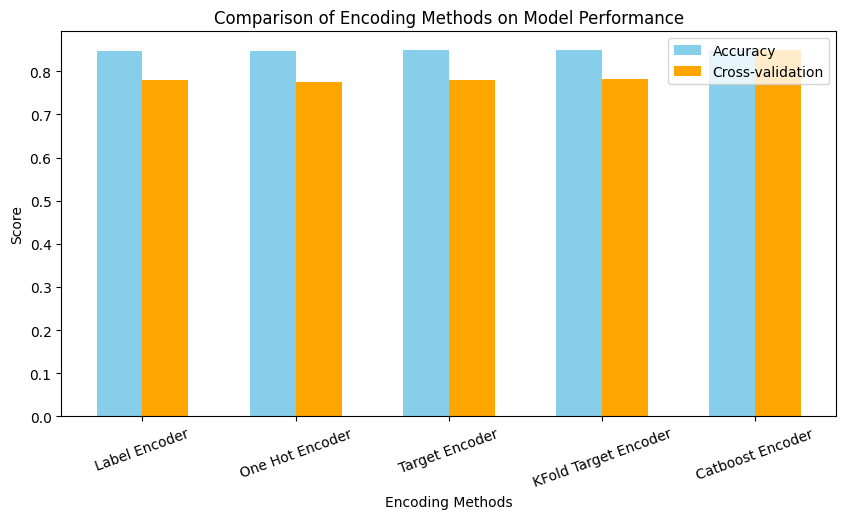

In [ ]:
# encoding_methods = ['Label Encoder', 'One Hot Encoder', 'Target Encoder', 'KFold Target Encoder', 'Catboost Encoder']
# accuracy_scores = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, catboost_rf_accuracy]
# cv_scores = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_accuracy]


# x = np.arange(len(encoding_methods))
# width = 0.3

# fig, ax = plt.subplots(figsize=(10, 5))
# ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
# ax.bar(x + width/2, cv_scores, width, label='Cross-validation', color='orange')

# ax.set_xlabel('Encoding Methods')
# ax.set_ylabel('Score')
# ax.set_title('Comparison of Encoding Methods on Model Performance')
# ax.set_xticks(x)
# ax.set_xticklabels(encoding_methods, rotation=20)
# ax.legend()

# plt.show()


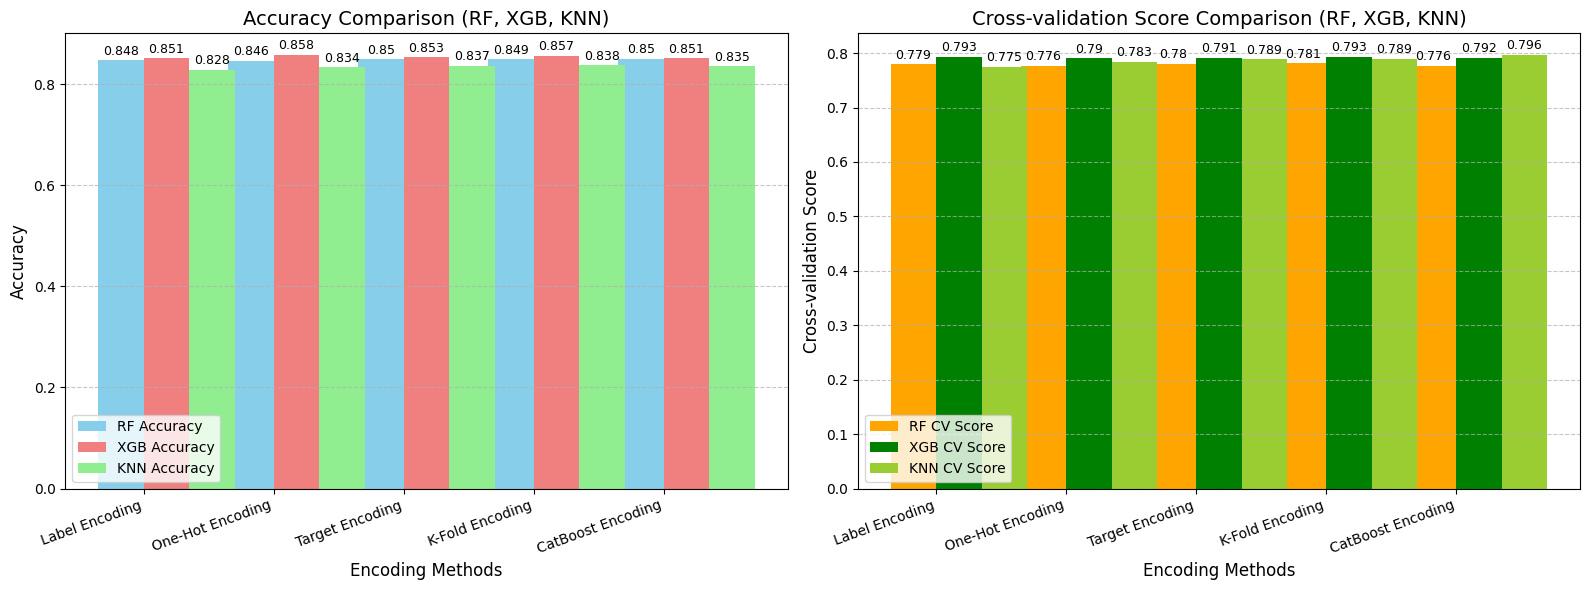

In [ ]:
encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'CatBoost Encoding']
accuracy_rf = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, catboost_rf_accuracy]
cv_rf = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_cv]

accuracy_xgb = [le_xgb_accuracy, ohe_xgb_accuracy, target_xgb_accuracy, kfold_xgb_accuracy, catboost_xgb_accuracy]
cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, catboost_xgb_cv]

accuracy_knn = [le_knn_accuracy, ohe_knn_accuracy, target_knn_accuracy, kfold_knn_accuracy, catboost_knn_accuracy]
cv_knn = [le_knn_cv, ohe_knn_cv, target_knn_cv, kfold_knn_cv, catboost_knn_cv]

x = np.arange(len(encoding_methods))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

bars_rf_acc = axes[0].bar(x - width/2, accuracy_rf, width, label='RF Accuracy', color='skyblue')
bars_xgb_acc = axes[0].bar(x + width/2, accuracy_xgb, width, label='XGB Accuracy', color='lightcoral')
bars_knn_acc = axes[0].bar(x + width*1.5, accuracy_knn, width, label='KNN Accuracy', color='lightgreen')

for bar in bars_rf_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_xgb_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_knn_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

axes[0].set_xlabel('Encoding Methods', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy Comparison (RF, XGB, KNN)', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

bars_rf_cv = axes[1].bar(x - width/2, cv_rf, width, label='RF CV Score', color='orange')
bars_xgb_cv = axes[1].bar(x + width/2, cv_xgb, width, label='XGB CV Score', color='green')
bars_knn_cv = axes[1].bar(x + width*1.5, cv_knn, width, label='KNN CV Score', color='yellowgreen')

for bar in bars_rf_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_xgb_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_knn_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

axes[1].set_xlabel('Encoding Methods', fontsize=12)
axes[1].set_ylabel('Cross-validation Score', fontsize=12)
axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN)', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


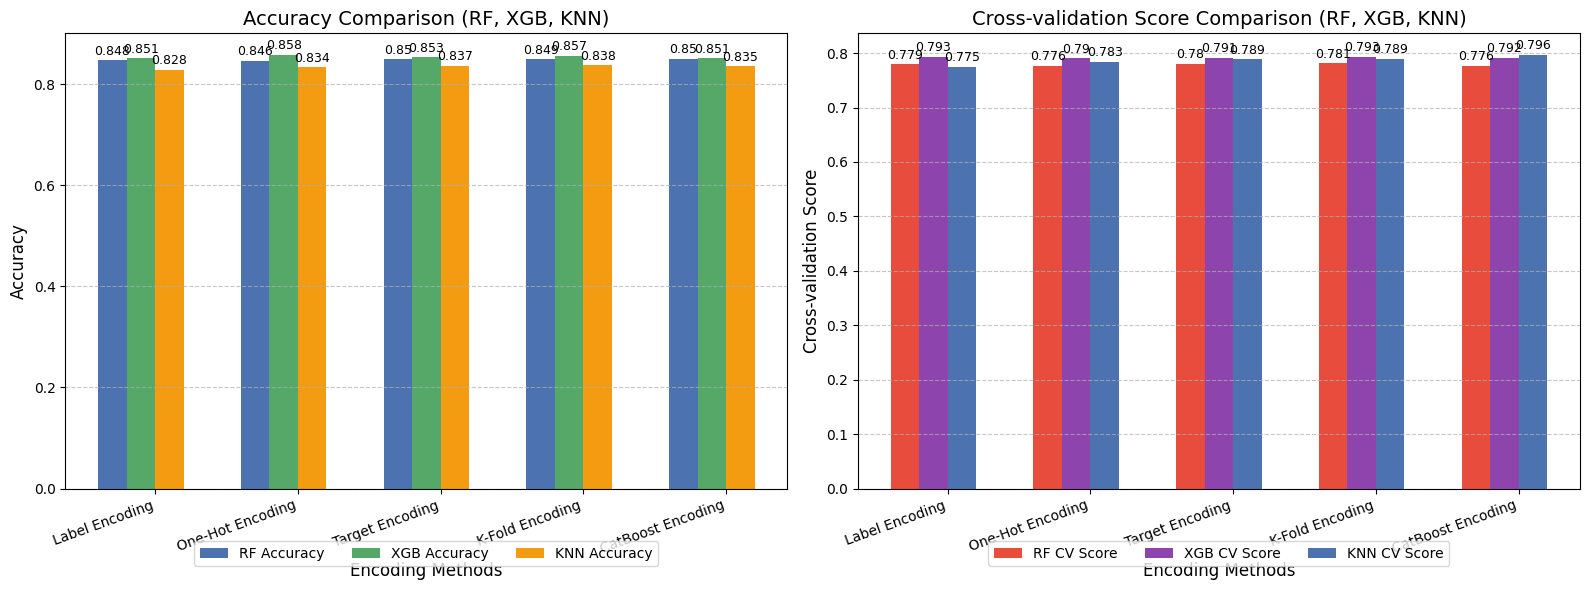

In [ ]:
colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

x = np.arange(len(encoding_methods))
width = 0.2  # Adjust width for better spacing

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar charts for accuracy
bars_rf_acc = axes[0].bar(x - width*1.5, accuracy_rf, width, label='RF Accuracy', color=colors[0])
bars_xgb_acc = axes[0].bar(x - width/2, accuracy_xgb, width, label='XGB Accuracy', color=colors[1])
bars_knn_acc = axes[0].bar(x + width/2, accuracy_knn, width, label='KNN Accuracy', color=colors[2])

# Add labels on top of the bars
for bar in bars_rf_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_xgb_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_knn_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# Set labels and title for accuracy chart
axes[0].set_xlabel('Encoding Methods', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy Comparison (RF, XGB, KNN)', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[0].legend(fontsize=10, loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar charts for cross-validation scores
bars_rf_cv = axes[1].bar(x - width*1.5, cv_rf, width, label='RF CV Score', color=colors[3])
bars_xgb_cv = axes[1].bar(x - width/2, cv_xgb, width, label='XGB CV Score', color=colors[4])
bars_knn_cv = axes[1].bar(x + width/2, cv_knn, width, label='KNN CV Score', color=colors[0])

# Add labels on top of the bars for CV scores
for bar in bars_rf_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_xgb_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_knn_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# Set labels and title for CV chart
axes[1].set_xlabel('Encoding Methods', fontsize=12)
axes[1].set_ylabel('Cross-validation Score', fontsize=12)
axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN)', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')

axes[0].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
axes[1].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid overlap
plt.tight_layout()

# Show the updated chart
plt.show()


# MIX

In [ ]:
df_read['Road_surface_conditions'].value_counts()

Road_surface_conditions
Dry                     9326
Wet or damp             2898
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

In [294]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

df_mix = df_read.copy()

if df_mix['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_mix['Accident_severity'] = le_target.fit_transform(df_mix['Accident_severity'])

df_mix['Hour'] = pd.to_datetime(df_mix['Time'], format='%H:%M:%S').dt.hour
df_mix.drop(columns=['Time'], inplace=True)

label_encoding_cols = ['Casualty_severity', 'Age_band_of_driver','Driving_experience', 'Light_conditions',  'Weather_conditions', 'Road_surface_conditions',]
one_hot_encoding_cols = ['Sex_of_driver', 'Type_of_vehicle', 
                        'Owner_of_vehicle', 'Vehicle_driver_relation', 'Road_surface_type']
kfold_encoding_cols = [ 'Type_of_collision', 'Types_of_Junction', 'Lanes_or_Medians',
                       'Day', 'Cause_of_accident', 'Hour', 'Area_accident_occured' , 'Road_allignment', 'Vehicle_movement']

for col in label_encoding_cols:
    le = LabelEncoder()
    df_mix[col] = le.fit_transform(df_mix[col])

df_mix = pd.get_dummies(df_mix, columns=one_hot_encoding_cols, dtype=int)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for col in kfold_encoding_cols:
    df_mix[col + '_kfold'] = 0
    for train_idx, val_idx in kf.split(df_mix):
        train_fold = df_mix.iloc[train_idx]
        val_fold = df_mix.iloc[val_idx]
        train_mean = train_fold.groupby(col)['Accident_severity'].mean()
        global_mean = df_mix['Accident_severity'].mean()
        df_mix.loc[val_idx, col + '_kfold'] = val_fold[col].map(train_mean).fillna(global_mean)

df_mix.drop(columns=kfold_encoding_cols, inplace=True)

df_mix.head()


/tmp/ipykernel_10539/3852181048.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.81866667 1.84192778 1.81866667 ... 1.84192778 1.84192778 1.84192778]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mix.loc[val_idx, col + '_kfold'] = val_fold[col].map(train_mean).fillna(global_mean)
/tmp/ipykernel_10539/3852181048.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.80944572 1.83546035 1.83546035 ... 1.80239521 1.80944572 1.80944572]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mix.loc[val_idx, col + '_kfold'] = val_fold[col].map(train_mean).fillna(global_mean)
/tmp/ipykernel_10539/3852181048.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.82898172 1.83028919 1.8302

Age_band_of_driver  Driving_experience  Road_surface_conditions  \
0                   0                   0                        0   
1                   1                   3                        0   
2                   0                   0                        0   
3                   0                   2                        0   
4                   0                   1                        0   

   Light_conditions  Weather_conditions  Number_of_vehicles_involved  \
0                 2                   2                            2   
1                 2                   2                            2   
2                 2                   2                            2   
3                 0                   2                            2   
4                 0                   2                            2   

   Number_of_casualties  Casualty_severity  Accident_severity  \
0                     2                  3                  2   
1                     2                  3                  2   
2                     2                  2                  1   
3                     2                  2                  2   
4                     2                  3                  2   

   Sex_of_driver_Female  ...  Road_surface_type_Other  \
0                     0  ...                        0   
1                     0  ...                        0   
2                     0  ...                        0   
3                     0  ...                        0   
4                     0  ...                        0   

   Type_of_collision_kfold  Types_of_Junction_kfold  Lanes_or_Medians_kfold  \
0                 1.818667                 1.809446                1.828982   
1                 1.833895                 1.807895                1.823960   
2                 1.822481                 1.816392                1.830664   
3                 1.841928                 1.835460                1.830289   
4                 1.833895                 1.826399                1.818807   

   Day_kfold  Cause_of_accident_kfold  Hour_kfold  \
0   1.868401                 1.799342    1.858859   
1   1.857143                 1.788868    1.863450   
2   1.860759                 1.831005    1.852729   
3   1.816132                 1.835800    1.837838   
4   1.817708                 1.788868    1.819820   

   Area_accident_occured_kfold  Road_allignment_kfold  Vehicle_movement_kfold  
0                     1.806728               1.834159                1.836234  
1                     1.835946               1.828703                1.829303  
2                     1.830827               1.834911                1.835802  
3                     1.843273               1.843829                1.836234  
4                     1.827869               1.828703                1.829303  

[5 rows x 40 columns]

In [295]:
X_mix = df_mix.drop(columns=['Accident_severity'])
y_mix = df_mix['Accident_severity']

X_train_mix, X_test_mix, y_train_mix, y_test_mix = train_test_split(X_mix, y_mix, test_size=0.2, random_state=42, stratify=y_mix)

In [ ]:


X = df_mix.drop(columns=['Accident_severity'])  

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Support Vector Machine": SVC(class_weight='balanced', random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model_kfold(model, X, y, kf):
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted')
    recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted')
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')
    
    return accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean(), f1_scores.mean()

results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model_kfold(model, X, y, kf)
    results.append([name, accuracy, precision, recall, f1])

# Tampilkan hasil evaluasi
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df)


In [ ]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train, "Target Encoding")
score_freq = evaluate_encoding(X_train, "Mix Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
    'MixEncoding': mutual_info_classif(X_train, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarni

Mix Encoding: 0.8473

Mutual Information Scores:


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Parameters


MixEncoding: 0.0014


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

mix_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
mix_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mix_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
mix_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mix_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
mix_knn_cv = knn_cv_scores.mean()

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)

mix_et_f1_score = f1_score(y_test, et_pred, average='weighted')
et_cv_scores = cross_val_score(et_model, X, y, cv=5, scoring='f1_weighted')
mix_et_cv = et_cv_scores.mean()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mix_lr_f1_score = f1_score(y_test, lr_pred, average='weighted')
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='f1_weighted')
mix_lr_cv = lr_cv_scores.mean()

print("Random Forest F1 Score:", mix_rf_f1_score, "Cross-Validation F1 Score:", mix_rf_cv)
print("XGBoost F1 Score:", mix_xgb_f1_score, "Cross-Validation F1 Score:", mix_xgb_cv)
print("KNN F1 Score:", mix_knn_f1_score, "Cross-Validation F1 Score:", mix_knn_cv)
print("Extra Trees F1 Score:", mix_et_f1_score, "Cross-Validation F1 Score:", mix_et_cv)
print("Logistic Regression F1 Score:", mix_lr_f1_score, "Cross-Validation F1 Score:", mix_lr_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:41:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Random Forest F1 Score: 0.7778996364403513 Cross-Validation F1 Score: 0.7757672251490394
XGBoost F1 Score: 0.801537263145062 Cross-Validation F1 Score: 0.786404660969647
KNN F1 Score: 0.7841786864288806 Cross-Validation F1 Score: 0.7791545766757386
Extra Trees F1 Score: 0.7812150563435621 Cross-Validation F1 Score: 0.7789754751555072
Logistic Regression F1 Score: 0.7772454825875926 Cross-Validation F1 Score: 0.7752608859289839


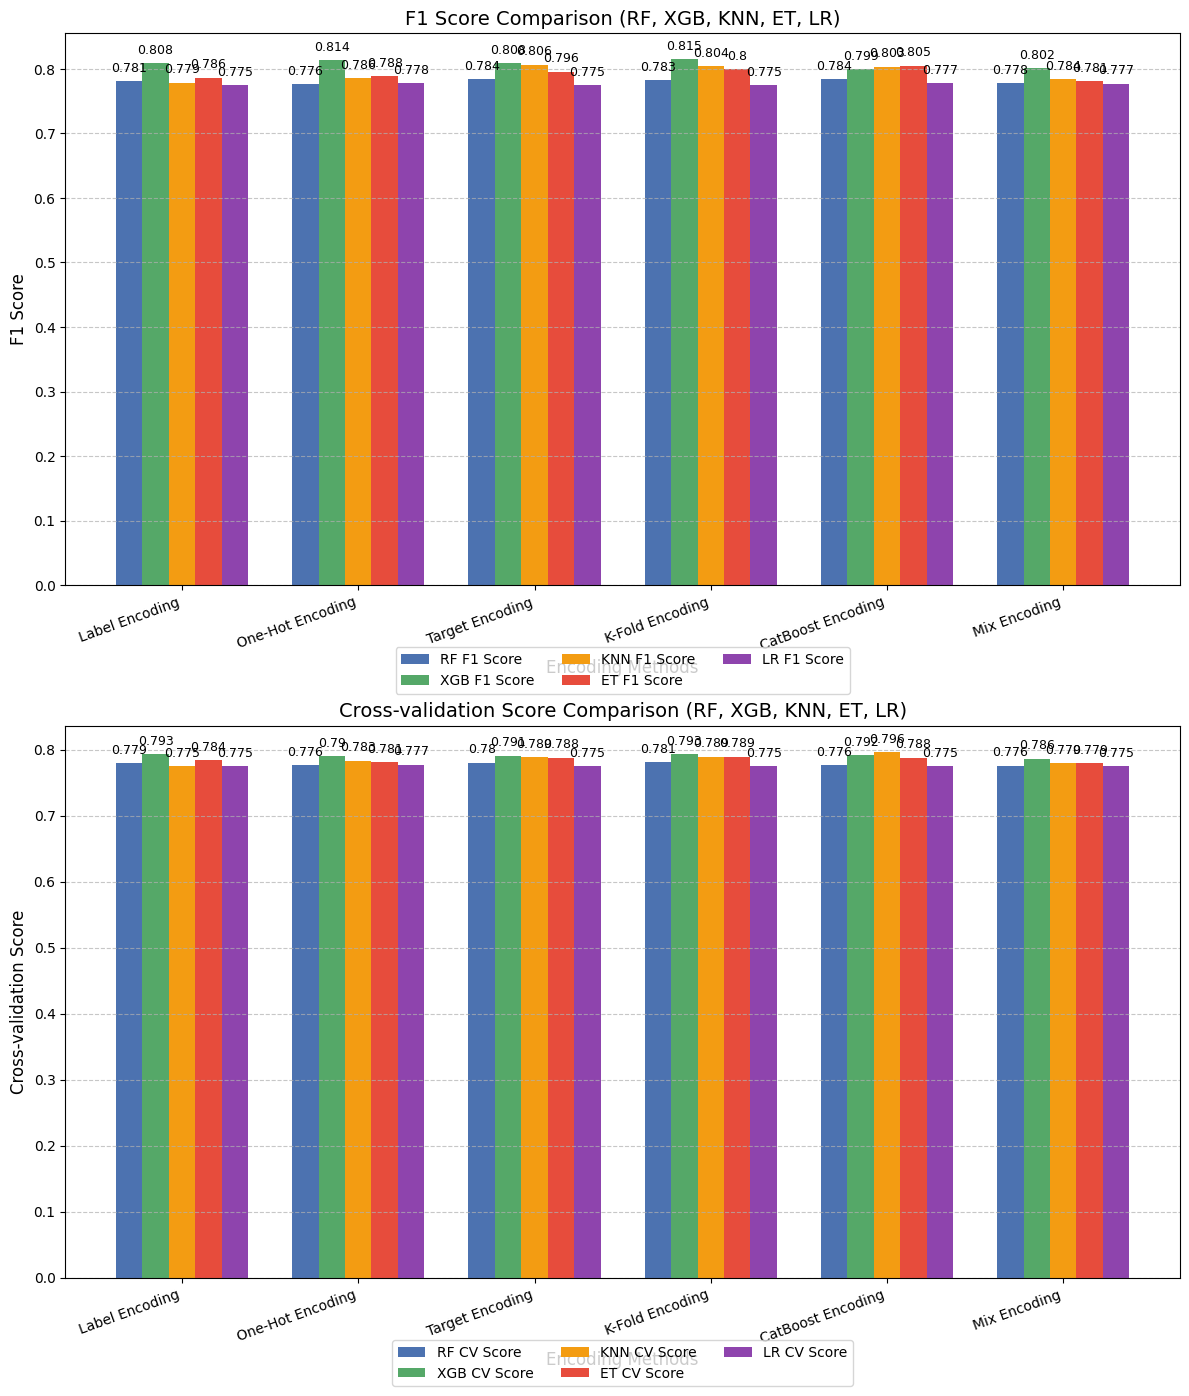

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad', '#1f77b4', '#ff7f0e']

encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'CatBoost Encoding', 'Mix Encoding']

f1_rf = [le_rf_f1_score, ohe_rf_f1_score, target_rf_f1_score, kfold_rf_f1_score, catboost_rf_f1_score, mix_rf_f1_score]
cv_rf = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_cv, mix_rf_cv]

f1_xgb = [le_xgb_f1_score, ohe_xgb_f1_score, target_xgb_f1_score, kfold_xgb_f1_score, catboost_xgb_f1_score, mix_xgb_f1_score]
cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, catboost_xgb_cv, mix_xgb_cv]

f1_knn = [le_knn_f1_score, ohe_knn_f1_score, target_knn_f1_score, kfold_knn_f1_score, catboost_knn_f1_score, mix_knn_f1_score]
cv_knn = [le_knn_cv, ohe_knn_cv, target_knn_cv, kfold_knn_cv, catboost_knn_cv, mix_knn_cv]

f1_et = [le_extra_trees_f1_score, ohe_extra_trees_f1_score, target_extra_trees_f1_score, kfold_extra_trees_f1_score, catboost_et_f1_score, mix_et_f1_score]
cv_et = [le_extra_trees_cv, ohe_extra_trees_cv, target_extra_trees_cv, kfold_extra_trees_cv, catboost_et_cv, mix_et_cv]

f1_lr = [le_logreg_f1_score, ohe_logreg_f1_score, target_logreg_f1_score, kfold_logreg_f1_score, catboost_lr_f1_score, mix_lr_f1_score]
cv_lr = [le_logreg_cv, ohe_logreg_cv, target_logreg_cv, kfold_logreg_cv, catboost_lr_cv, mix_lr_cv]

colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

x = np.arange(len(encoding_methods))
width = 0.15 


fig, axes = plt.subplots(2, 1, figsize=(12, 14))

def create_bars(ax, x_positions, data, width, label, color):
    bars = ax.bar(x_positions, data, width, label=label, color=color)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)
    return bars

x_rf_f1 = x - 2 * width
x_xgb_f1 = x - width
x_knn_f1 = x
x_et_f1 = x + width
x_lr_f1 = x + 2 * width

create_bars(axes[0], x_rf_f1, f1_rf, width, 'RF F1 Score', colors[0])
create_bars(axes[0], x_xgb_f1, f1_xgb, width, 'XGB F1 Score', colors[1])
create_bars(axes[0], x_knn_f1, f1_knn, width, 'KNN F1 Score', colors[2])
create_bars(axes[0], x_et_f1, f1_et, width, 'ET F1 Score', colors[3])
create_bars(axes[0], x_lr_f1, f1_lr, width, 'LR F1 Score', colors[4])

axes[0].set_xlabel('Encoding Methods', fontsize=12)
axes[0].set_ylabel('F1 Score', fontsize=12)
axes[0].set_title('F1 Score Comparison (RF, XGB, KNN, ET, LR)', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[0].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

x_rf_cv = x - 2 * width
x_xgb_cv = x - width
x_knn_cv = x
x_et_cv = x + width
x_lr_cv = x + 2 * width

create_bars(axes[1], x_rf_cv, cv_rf, width, 'RF CV Score', colors[0])
create_bars(axes[1], x_xgb_cv, cv_xgb, width, 'XGB CV Score', colors[1])
create_bars(axes[1], x_knn_cv, cv_knn, width, 'KNN CV Score', colors[2])
create_bars(axes[1], x_et_cv, cv_et, width, 'ET CV Score', colors[3])
create_bars(axes[1], x_lr_cv, cv_lr, width, 'LR CV Score', colors[4])

axes[1].set_xlabel('Encoding Methods', fontsize=12)
axes[1].set_ylabel('Cross-validation Score', fontsize=12)
axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN, ET, LR)', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[1].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

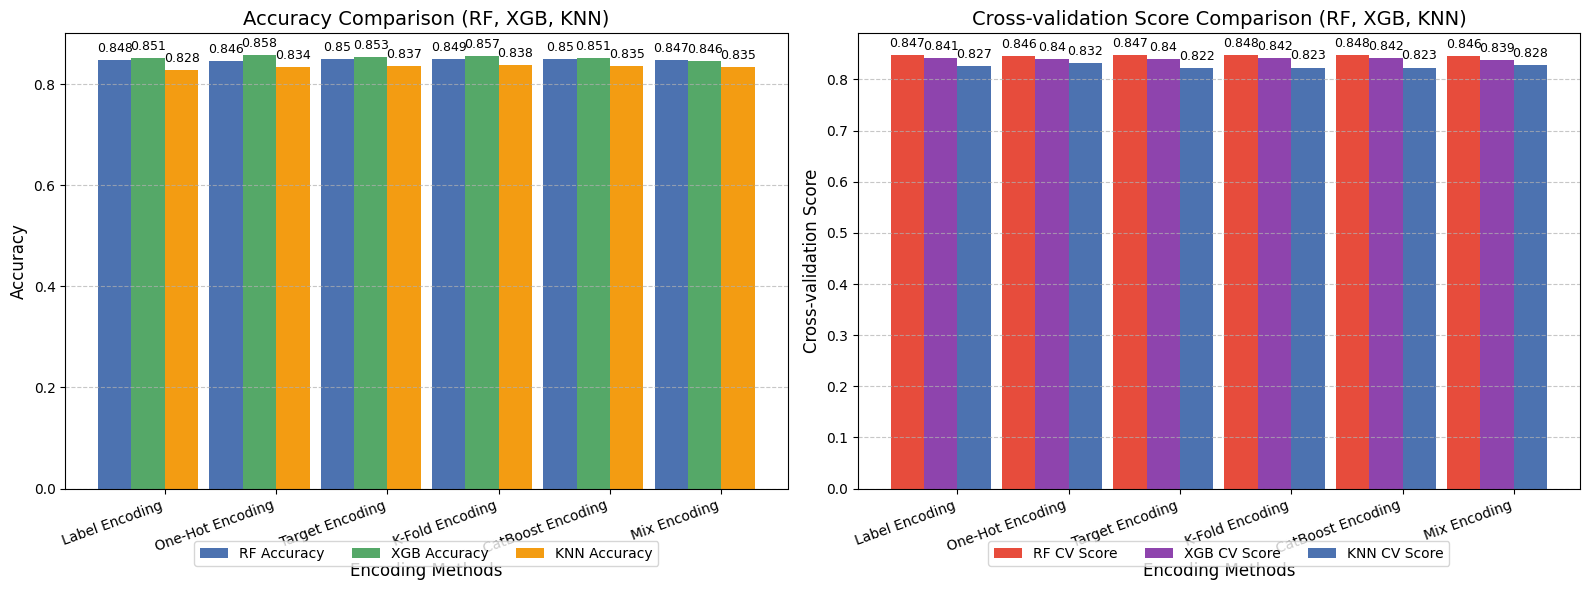

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'CatBoost Encoding', 'Mix Encoding']
accuracy_rf = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, catboost_rf_accuracy, mix_rf_accuracy]
cv_rf = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_cv, mix_rf_cv]

accuracy_xgb = [le_xgb_accuracy, ohe_xgb_accuracy, target_xgb_accuracy, kfold_xgb_accuracy, catboost_xgb_accuracy, mix_xgb_accuracy]
cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, catboost_xgb_cv, mix_xgb_cv]

accuracy_knn = [le_knn_accuracy, ohe_knn_accuracy, target_knn_accuracy, kfold_knn_accuracy, catboost_knn_accuracy, mix_knn_accuracy]
cv_knn = [le_knn_cv, ohe_knn_cv, target_knn_cv, kfold_knn_cv, catboost_knn_cv, mix_knn_cv]

x = np.arange(len(encoding_methods))
width = 0.3  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

bars_rf_acc = axes[0].bar(x - width*1.5, accuracy_rf, width, label='RF Accuracy', color=colors[0])
bars_xgb_acc = axes[0].bar(x - width/2, accuracy_xgb, width, label='XGB Accuracy', color=colors[1])
bars_knn_acc = axes[0].bar(x + width/2, accuracy_knn, width, label='KNN Accuracy', color=colors[2])

for bar in bars_rf_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_xgb_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_knn_acc:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

axes[0].set_xlabel('Encoding Methods', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy Comparison (RF, XGB, KNN)', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[0].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

bars_rf_cv = axes[1].bar(x - width*1.5, cv_rf, width, label='RF CV Score', color=colors[3])
bars_xgb_cv = axes[1].bar(x - width/2, cv_xgb, width, label='XGB CV Score', color=colors[4])
bars_knn_cv = axes[1].bar(x + width/2, cv_knn, width, label='KNN CV Score', color=colors[0])

for bar in bars_rf_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_xgb_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

for bar in bars_knn_cv:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

axes[1].set_xlabel('Encoding Methods', fontsize=12)
axes[1].set_ylabel('Cross-validation Score', fontsize=12)
axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN)', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
axes[1].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# Outlier

In [ ]:
def std(data: list, ddof: int = 1) -> float:
    if ddof > 1 or ddof < 0:
        raise ValueError('ddof must be greater than 0')
    n = len(data)
    mean = sum(data) / n
    total_variance = sum((x - mean) ** 2 for x in data)
    variance = total_variance / (n - ddof)
    stdev = variance ** 0.5
    return stdev

def z_scores_1(num, data):
    mean = sum(data) / len(data)
    std_dev = std(data)
    return (num - mean) / std_dev

def detect_outliers(data, threshold=3):
    outliers = []
    mean = sum(data) / len(data)
    stdev_value = std(data)
    
    for i, num in enumerate(data):
        z_score = (num - mean) / stdev_value
        if abs(z_score) > threshold:  
            outliers.append(i) 
    
    return outliers

outliers_vehicles = detect_outliers(df_read['Number_of_casualties'])
print(f"Outliers pada 'Number_of_vehicles_involved': {outliers_vehicles}")

outliers_casualties = detect_outliers(df_read['Number_of_vehicles_involved'])
print(f"Outliers pada 'Number_of_casualties': {outliers_casualties}")


Outliers pada 'Number_of_vehicles_involved': [319, 320, 321, 322, 323, 324, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 467, 468, 697, 698, 699, 700, 701, 733, 734, 735, 736, 737, 920, 921, 922, 923, 924, 1140, 1141, 1142, 1143, 1144, 1145, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1575, 1576, 1577, 1578, 1579, 1580, 2490, 2491, 2492, 2493, 2494, 2495, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 4086, 4087, 4088, 4089, 4090, 5058, 5059, 5060, 5061, 5062, 5095, 5096, 5097, 5098, 5099, 5100, 5428, 5429, 5430, 5431, 5432, 5433, 5697, 5698, 5699, 5700, 5701, 5702, 5712, 5713, 5714, 5715, 5716, 5955, 5956, 5957, 5958, 5959, 5960, 6020, 6021, 6022, 6023, 6024, 6025, 6221, 6222, 6223, 6224, 6225, 6232, 6233, 6234, 6235, 6236, 6237, 6238, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6408, 6409, 6410, 6411, 6412, 6413, 6414, 6911, 6912, 6913, 6914, 6915, 6916, 7024, 7025, 7026, 7027, 7028, 7215, 7216, 7217, 7218, 7219, 7431, 7432, 7433, 7434

In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    return outliers

outliers_vehicles_iqr = detect_outliers_iqr(df_mix['Number_of_vehicles_involved'])
print(f"Outliers pada 'Number_of_vehicles_involved' dengan IQR: {outliers_vehicles_iqr}")

outliers_casualties_iqr = detect_outliers_iqr(df_mix['Number_of_casualties'])
print(f"Outliers pada 'Number_of_casualties' dengan IQR: {outliers_casualties_iqr}")


Outliers pada 'Number_of_vehicles_involved' dengan IQR: [5, 6, 21, 27, 30, 31, 45, 72, 73, 74, 75, 76, 77, 82, 83, 95, 96, 97, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 124, 125, 126, 127, 130, 131, 132, 133, 134, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 180, 186, 187, 188, 189, 195, 196, 197, 198, 199, 200, 219, 224, 225, 226, 227, 228, 229, 230, 240, 241, 242, 254, 262, 269, 270, 271, 279, 280, 286, 287, 288, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 307, 308, 309, 310, 311, 312, 313, 314, 325, 326, 327, 328, 333, 340, 343, 344, 347, 348, 355, 356, 360, 361, 362, 363, 364, 368, 376, 377, 378, 379, 380, 381, 386, 387, 388, 389, 390, 391, 398, 401, 409, 412, 415, 418, 419, 420, 423, 424, 425, 426, 427, 428, 432, 433, 434, 435, 442, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 467, 468, 471, 472, 483, 484, 485, 486, 490, 495, 496, 497, 503, 504, 505, 506, 509, 510, 511, 512, 513, 514, 515, 516, 532, 535

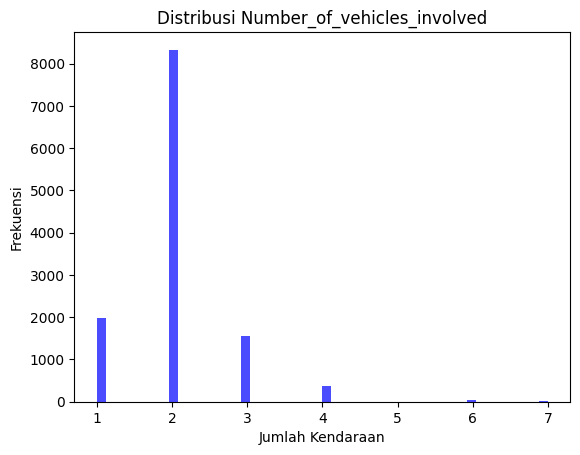

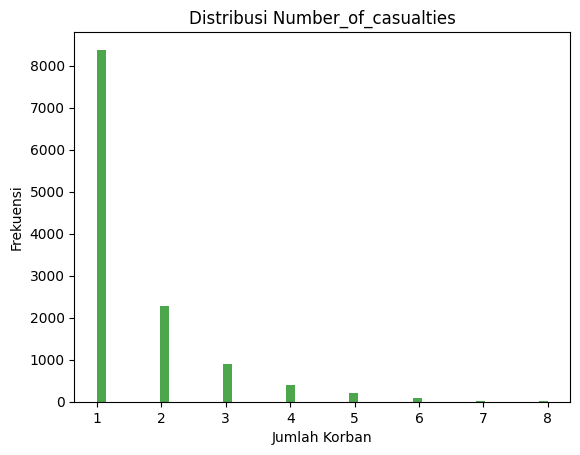

In [ ]:
import matplotlib.pyplot as plt

# Visualisasikan distribusi data untuk kolom Number_of_vehicles_involved
plt.hist(df_mix['Number_of_vehicles_involved'], bins=50, color='blue', alpha=0.7)
plt.title('Distribusi Number_of_vehicles_involved')
plt.xlabel('Jumlah Kendaraan')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasikan distribusi data untuk kolom Number_of_casualties
plt.hist(df_mix['Number_of_casualties'], bins=50, color='green', alpha=0.7)
plt.title('Distribusi Number_of_casualties')
plt.xlabel('Jumlah Korban')
plt.ylabel('Frekuensi')
plt.show()


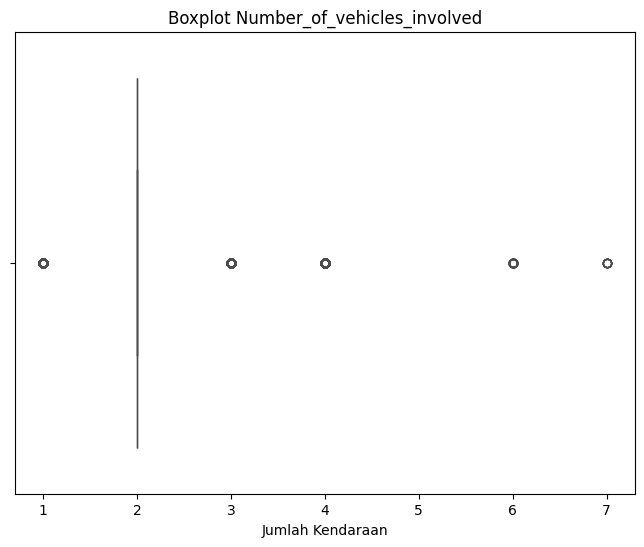

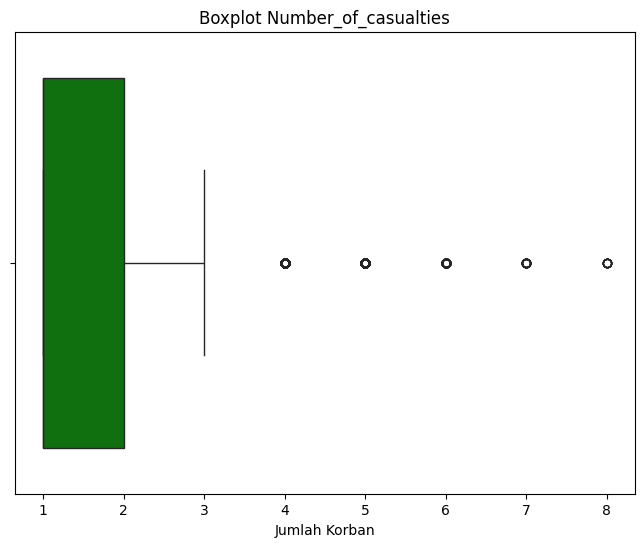

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mix['Number_of_vehicles_involved'], color='blue')
plt.title('Boxplot Number_of_vehicles_involved')
plt.xlabel('Jumlah Kendaraan')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mix['Number_of_casualties'], color='green')
plt.title('Boxplot Number_of_casualties')
plt.xlabel('Jumlah Korban')
plt.show()


In [ ]:
# df_mix.to_csv('../datasets/dataafterencod.csv', index=False)

# Feature Selection

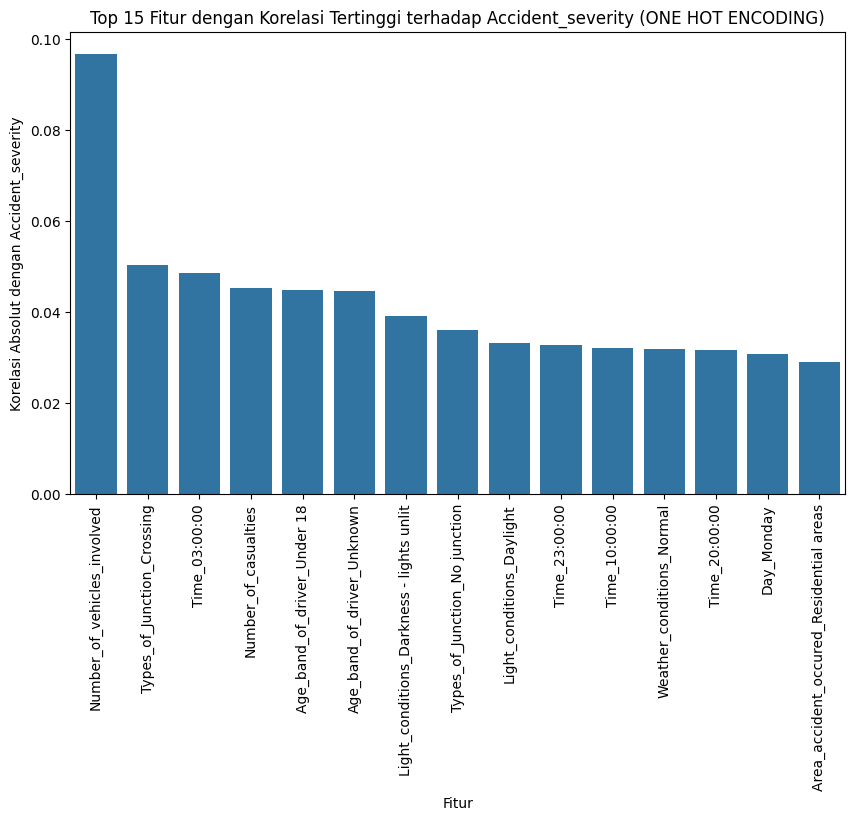

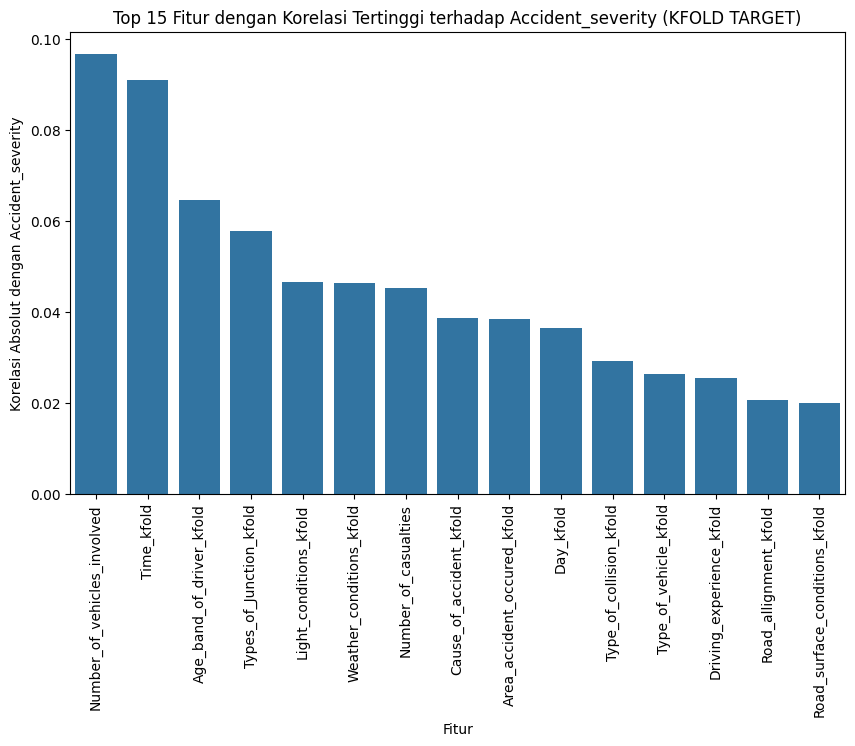

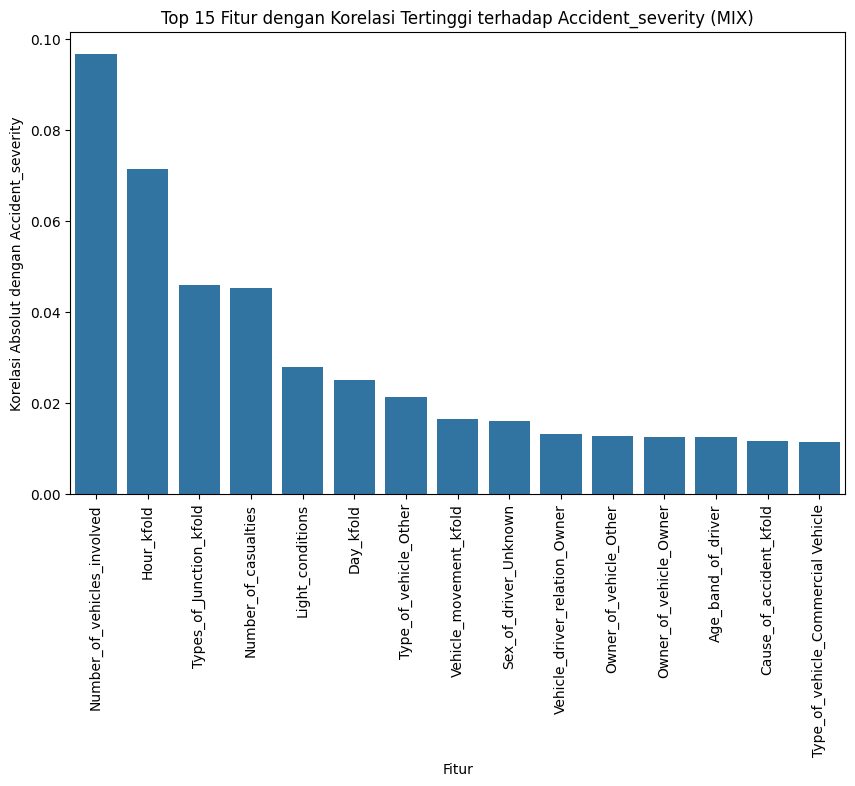

['Driving_experience',
 'Road_surface_conditions',
 'Casualty_severity',
 'Sex_of_driver_Female',
 'Sex_of_driver_Male',
 'Type_of_vehicle_Non-Motorized',
 'Type_of_vehicle_Private Vehicle',
 'Type_of_vehicle_Public Transport',
 'Owner_of_vehicle_Governmental',
 'Owner_of_vehicle_Organization',
 'Vehicle_driver_relation_Employee',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Unknown',
 'Road_surface_type_Asphalt roads',
 'Road_surface_type_Earth roads',
 'Road_surface_type_Gravel roads',
 'Road_surface_type_Other',
 'Type_of_collision_kfold',
 'Lanes_or_Medians_kfold',
 'Area_accident_occured_kfold',
 'Road_allignment_kfold']

In [ ]:
# ohe
corr_matrix = df_ohe.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (ONE HOT ENCODING)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

# kfold
corr_matrix = df_kfold.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (KFOLD TARGET)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

# mix
corr_matrix = df_mix.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (MIX)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features



# lassso

Fitur yang dipilih oleh Lasso:
['Age_band_of_driver', 'Driving_experience', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Male', 'Sex_of_driver_Unknown', 'Type_of_vehicle_Commercial Vehicle', 'Type_of_vehicle_Non-Motorized', 'Type_of_vehicle_Other', 'Type_of_vehicle_Private Vehicle', 'Type_of_vehicle_Special Vehicle', 'Owner_of_vehicle_Governmental', 'Owner_of_vehicle_Organization', 'Owner_of_vehicle_Other', 'Owner_of_vehicle_Owner', 'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner', 'Road_surface_type_Asphalt roads with some distress', 'Road_surface_type_Earth roads', 'Road_surface_type_Gravel roads', 'Road_surface_type_Other', 'Types_of_Junction_kfold', 'Lanes_or_Medians_kfold', 'Hour_kfold', 'Road_allignment_kfold', 'Vehicle_movement_kfold']


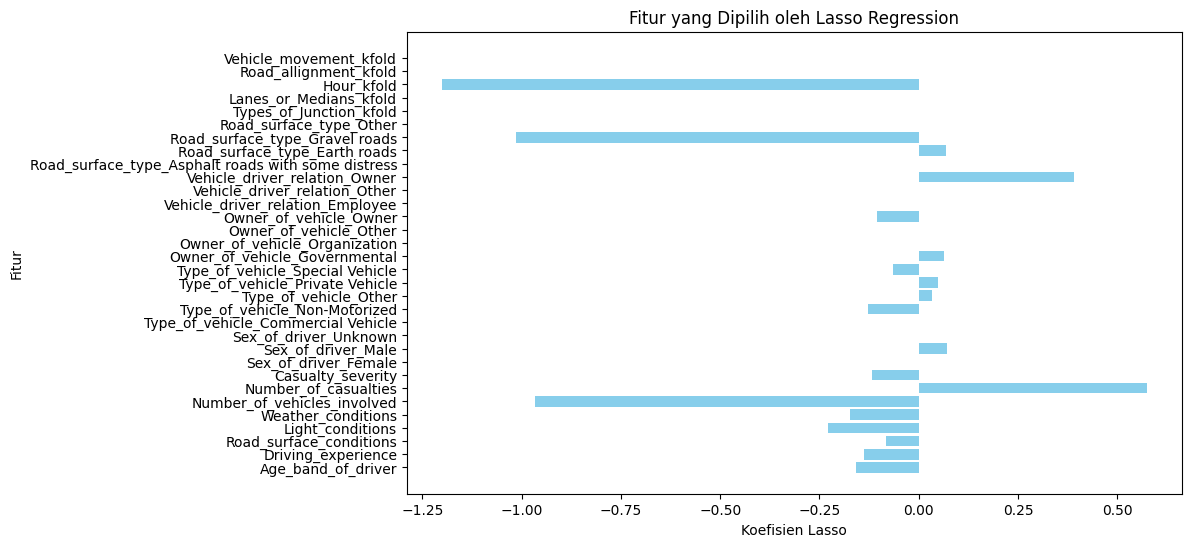

In [ ]:
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_mix, y_train_mix)

model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_mix.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

coefficients = lasso.coef_[0]

selected_coefficients = coefficients[[X_train_mix.columns.get_loc(f) for f in selected_lasso_features]]

plt.figure(figsize=(10, 6))
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()



Fitur yang dipilih oleh Lasso:
['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_00:00:00', 'Time_02:00:00', 'Time_03:00:00', 'Time_04:00:00', 'Time_05:00:00', 'Time_06:00:00', 'Time_07:00:00', 'Time_08:00:00', 'Time_09:00:00', 'Time_10:00:00', 'Time_11:00:00', 'Time_12:00:00', 'Time_13:00:00', 'Time_14:00:00', 'Time_15:00:00', 'Time_16:00:00', 'Time_17:00:00', 'Time_18:00:00', 'Time_19:00:00', 'Time_20:00:00', 'Time_21:00:00', 'Time_22:00:00', 'Time_23:00:00', 'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown', 'Sex_of_driver_Female', 'Sex_of_driver_Male', 'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner', 'Vehicle_driver_relation_Unknown', 'Driving_experience_1-2yr', 'Driving_experience_2-5yr', 'Driving_experience_5-10yr', 'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr', 'Driving_experien

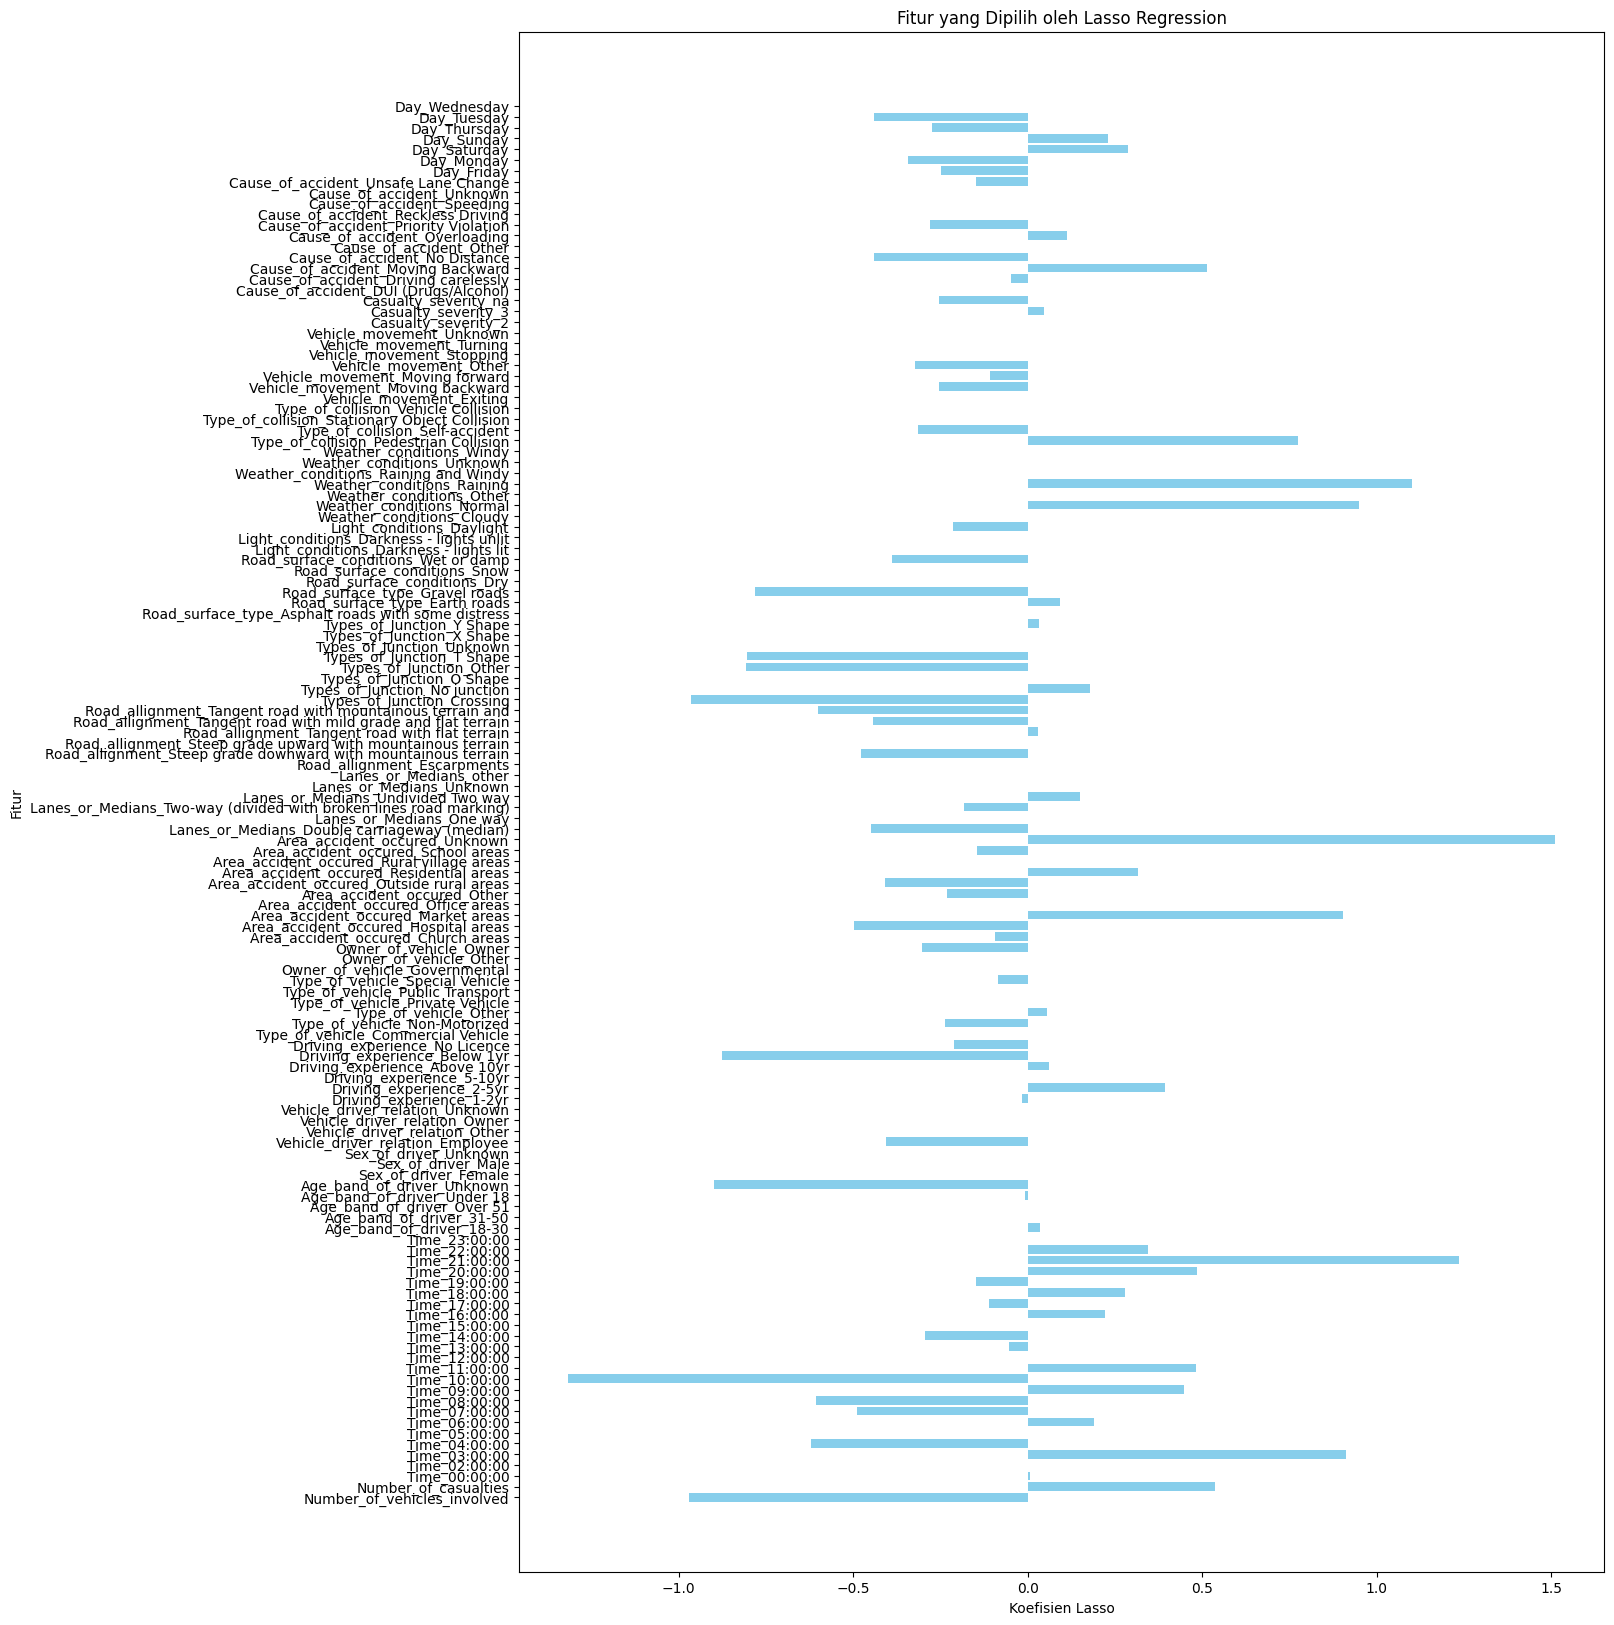

In [306]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Melatih model Lasso
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_ohe, y_train_ohe)

# Seleksi fitur dengan Lasso
model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_ohe.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

# Ambil koefisien dari fitur yang dipilih
coefficients = lasso.coef_[0]
selected_coefficients = coefficients[[X_train_ohe.columns.get_loc(f) for f in selected_lasso_features]]

# Meningkatkan ukuran gambar
plt.figure(figsize=(14, 20))  # Mengatur ukuran gambar lebih besar
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()


Fitur yang dipilih oleh Lasso:
['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_kfold', 'Age_band_of_driver_kfold', 'Sex_of_driver_kfold', 'Vehicle_driver_relation_kfold', 'Driving_experience_kfold', 'Owner_of_vehicle_kfold', 'Lanes_or_Medians_kfold', 'Road_allignment_kfold', 'Types_of_Junction_kfold', 'Road_surface_type_kfold', 'Road_surface_conditions_kfold', 'Weather_conditions_kfold', 'Vehicle_movement_kfold', 'Casualty_severity_kfold', 'Day_kfold']


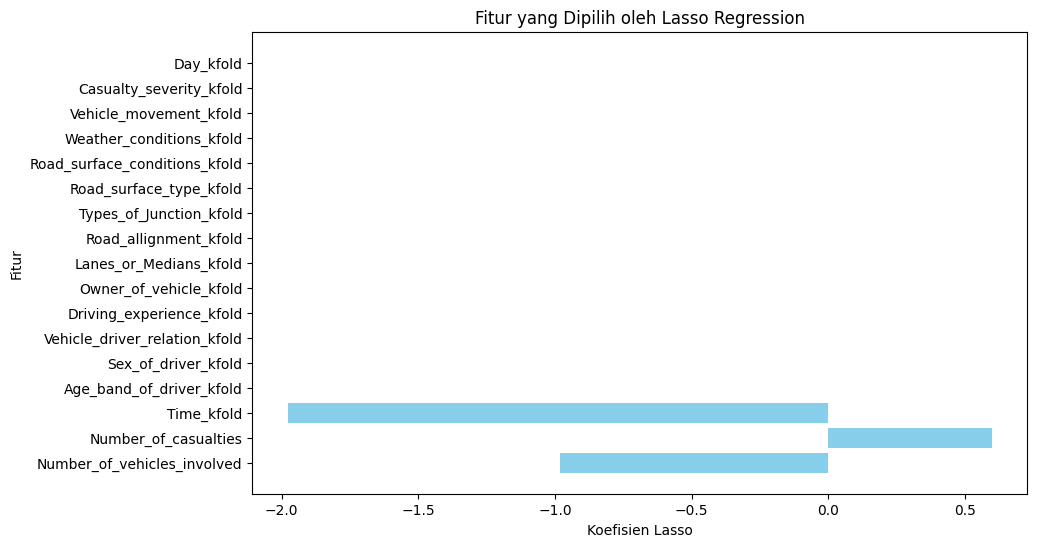

In [ ]:
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_kfold, y_train_kfold)

model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_kfold.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

coefficients = lasso.coef_[0]

selected_coefficients = coefficients[[X_train_kfold.columns.get_loc(f) for f in selected_lasso_features]]

plt.figure(figsize=(10, 6))
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

target_column = 'Accident_severity'
corr_matrix = df_mix.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_mix = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_mix.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_mix, y_train_mix)
selected_features_rfe_mix = X_train_mix.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_mix = pca.fit_transform(X_train_mix)
X_test_pca_mix = pca.transform(X_test_mix)

len(selected_features_corr_mix), len(selected_features_rfe_mix), len(selected_features_lasso_mix), X_train_pca_mix.shape[1]


(2, 10, 24, 10)

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

target_column = 'Accident_severity'
corr_matrix = df_mix.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_mix = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_mix.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_mix, y_train_mix)
selected_features_rfe_mix = X_train_mix.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_mix = pca.fit_transform(X_train_mix)
X_test_pca_mix = pca.transform(X_test_mix)

len(selected_features_corr_mix), len(selected_features_rfe_mix), len(selected_features_lasso_mix), X_train_pca_mix.shape[1]


(2, 10, 24, 10)

Fitur yang dipilih berdasarkan korelasi: 2
Fitur yang dipilih dengan RFE: 10
Fitur yang dipilih dengan Lasso: 24
Jumlah komponen PCA: 10


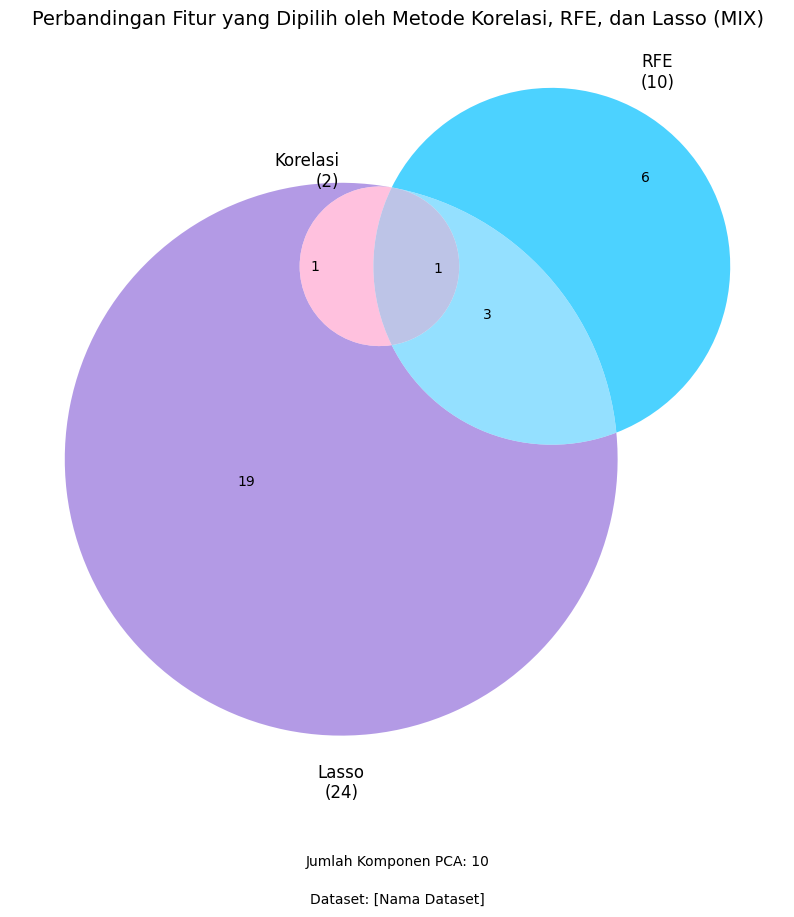

In [274]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

print(f"Fitur yang dipilih berdasarkan korelasi: {len(selected_features_corr_mix)}")
print(f"Fitur yang dipilih dengan RFE: {len(selected_features_rfe_mix)}")
print(f"Fitur yang dipilih dengan Lasso: {len(selected_features_lasso_mix)}")
print(f"Jumlah komponen PCA: {X_train_pca_mix.shape[1]}")

venn_labels = {
    '100': len(set(selected_features_corr_mix) - set(selected_features_rfe_mix) - set(selected_features_lasso_mix)),
    '010': len(set(selected_features_rfe_mix) - set(selected_features_corr_mix) - set(selected_features_lasso_mix)),
    '001': len(set(selected_features_lasso_mix) - set(selected_features_corr_mix) - set(selected_features_rfe_mix)),
    '110': len(set(selected_features_corr_mix) & set(selected_features_rfe_mix) - set(selected_features_lasso_mix)),
    '101': len(set(selected_features_corr_mix) & set(selected_features_lasso_mix) - set(selected_features_rfe_mix)),
    '011': len(set(selected_features_rfe_mix) & set(selected_features_lasso_mix) - set(selected_features_corr_mix)),
    '111': len(set(selected_features_corr_mix) & set(selected_features_rfe_mix) & set(selected_features_lasso_mix))
}

plt.figure(figsize=(10, 10))
v = venn3(subsets=venn_labels, set_labels=('Korelasi', 'RFE', 'Lasso'), alpha=0.7,
          set_colors=('coral', 'deepskyblue', 'mediumpurple'))  

if v.set_labels:
    v.set_labels[0].set_text(f"Korelasi\n({len(selected_features_corr_mix)})")
    v.set_labels[1].set_text(f"RFE\n({len(selected_features_rfe_mix)})")
    v.set_labels[2].set_text(f"Lasso\n({len(selected_features_lasso_mix)})")

plt.title('Perbandingan Fitur yang Dipilih oleh Metode Korelasi, RFE, dan Lasso (MIX)', fontsize=14)
plt.annotate(f"Jumlah Komponen PCA: {X_train_pca_mix.shape[1]}", xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.annotate("Dataset: [Nama Dataset]", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [275]:


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    return f1, cv_scores

rf_model_all_mix = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_f1_all_mix, rf_cv_all_mix = evaluate_model(rf_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

xgb_model_all_mix = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_f1_all_mix, xgb_cv_all_mix = evaluate_model(xgb_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

lr_model_all_mix = LogisticRegression(max_iter=1000, random_state=42)
lr_f1_all_mix, lr_cv_all_mix = evaluate_model(lr_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

knn_model_all_mix = KNeighborsClassifier(n_neighbors=5)
knn_f1_all_mix, knn_cv_all_mix = evaluate_model(knn_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

et_model_all_mix = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_f1_all_mix, et_cv_all_mix = evaluate_model(et_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

rf_rfe_mix = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_mix = RFE(rf_rfe_mix, n_features_to_select=10)
rfe_mix.fit(X_train_mix, y_train_mix)
selected_features_rfe_mix = X_train_mix.columns[rfe_mix.support_].tolist()
X_train_rfe_mix = X_train_mix[selected_features_rfe_mix]
X_test_rfe_mix = X_test_mix[selected_features_rfe_mix]

rf_f1_rfe_mix, rf_cv_rfe_mix = evaluate_model(rf_rfe_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
xgb_f1_rfe_mix, xgb_cv_rfe_mix = evaluate_model(xgb_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
lr_f1_rfe_mix, lr_cv_rfe_mix = evaluate_model(lr_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
knn_f1_rfe_mix, knn_cv_rfe_mix = evaluate_model(knn_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
et_f1_rfe_mix, et_cv_rfe_mix = evaluate_model(et_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)

lasso_mix = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model_lasso_mix = SelectFromModel(lasso_mix, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model_lasso_mix.get_support()].tolist()
X_train_lasso_mix = X_train_mix[selected_features_lasso_mix]
X_test_lasso_mix = X_test_mix[selected_features_lasso_mix]

rf_f1_lasso_mix, rf_cv_lasso_mix = evaluate_model(rf_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
xgb_f1_lasso_mix, xgb_cv_lasso_mix = evaluate_model(xgb_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
lr_f1_lasso_mix, lr_cv_lasso_mix = evaluate_model(lr_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
knn_f1_lasso_mix, knn_cv_lasso_mix = evaluate_model(knn_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
et_f1_lasso_mix, et_cv_lasso_mix = evaluate_model(et_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)

pca_mix = PCA(n_components=10)
X_train_pca_mix = pca_mix.fit_transform(X_train_mix)
X_test_pca_mix = pca_mix.transform(X_test_mix)

rf_f1_pca_mix, rf_cv_pca_mix = evaluate_model(rf_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
xgb_f1_pca_mix, xgb_cv_pca_mix = evaluate_model(xgb_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
lr_f1_pca_mix, lr_cv_pca_mix = evaluate_model(lr_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
knn_f1_pca_mix, knn_cv_pca_mix = evaluate_model(knn_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
et_f1_pca_mix, et_cv_pca_mix = evaluate_model(et_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)

print("\nHasil Evaluasi Model dengan Semua Fitur:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_all_mix:.4f}, Cross-Validation F1 Score: {rf_cv_all_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_all_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_all_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_all_mix:.4f}, Cross-Validation F1 Score: {lr_cv_all_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_all_mix:.4f}, Cross-Validation F1 Score: {knn_cv_all_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_all_mix:.4f}, Cross-Validation F1 Score: {et_cv_all_mix:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan RFE:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {rf_cv_rfe_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_rfe_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {lr_cv_rfe_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {knn_cv_rfe_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {et_cv_rfe_mix:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan Lasso:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {rf_cv_lasso_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_lasso_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {lr_cv_lasso_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {knn_cv_lasso_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {et_cv_lasso_mix:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan PCA:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_pca_mix:.4f}, Cross-Validation F1 Score: {rf_cv_pca_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_pca_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_pca_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_pca_mix:.4f}, Cross-Validation F1 Score: {lr_cv_pca_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_pca_mix:.4f}, Cross-Validation F1 Score: {knn_cv_pca_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_pca_mix:.4f}, Cross-Validation F1 Score: {et_cv_pca_mix:.4f}")
print("------------------------------------------------\n")


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:11:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:12:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e


Hasil Evaluasi Model dengan Semua Fitur:
------------------------------------------------
Random Forest - F1 Score: 0.7753, Cross-Validation F1 Score: 0.7759
XGBoost - F1 Score: 0.7994, Cross-Validation F1 Score: 0.7962
Logistic Regression - F1 Score: 0.7753, Cross-Validation F1 Score: 0.7752
KNN - F1 Score: 0.7794, Cross-Validation F1 Score: 0.7809
Extra Trees - F1 Score: 0.7803, Cross-Validation F1 Score: 0.7790
------------------------------------------------


Hasil Evaluasi Model dengan RFE:
------------------------------------------------
Random Forest - F1 Score: 0.7776, Cross-Validation F1 Score: 0.7755
XGBoost - F1 Score: 0.7775, Cross-Validation F1 Score: 0.7783
Logistic Regression - F1 Score: 0.7753, Cross-Validation F1 Score: 0.7752
KNN - F1 Score: 0.7732, Cross-Validation F1 Score: 0.7725
Extra Trees - F1 Score: 0.7841, Cross-Validation F1 Score: 0.7743
------------------------------------------------


Hasil Evaluasi Model dengan Lasso:
----------------------------------

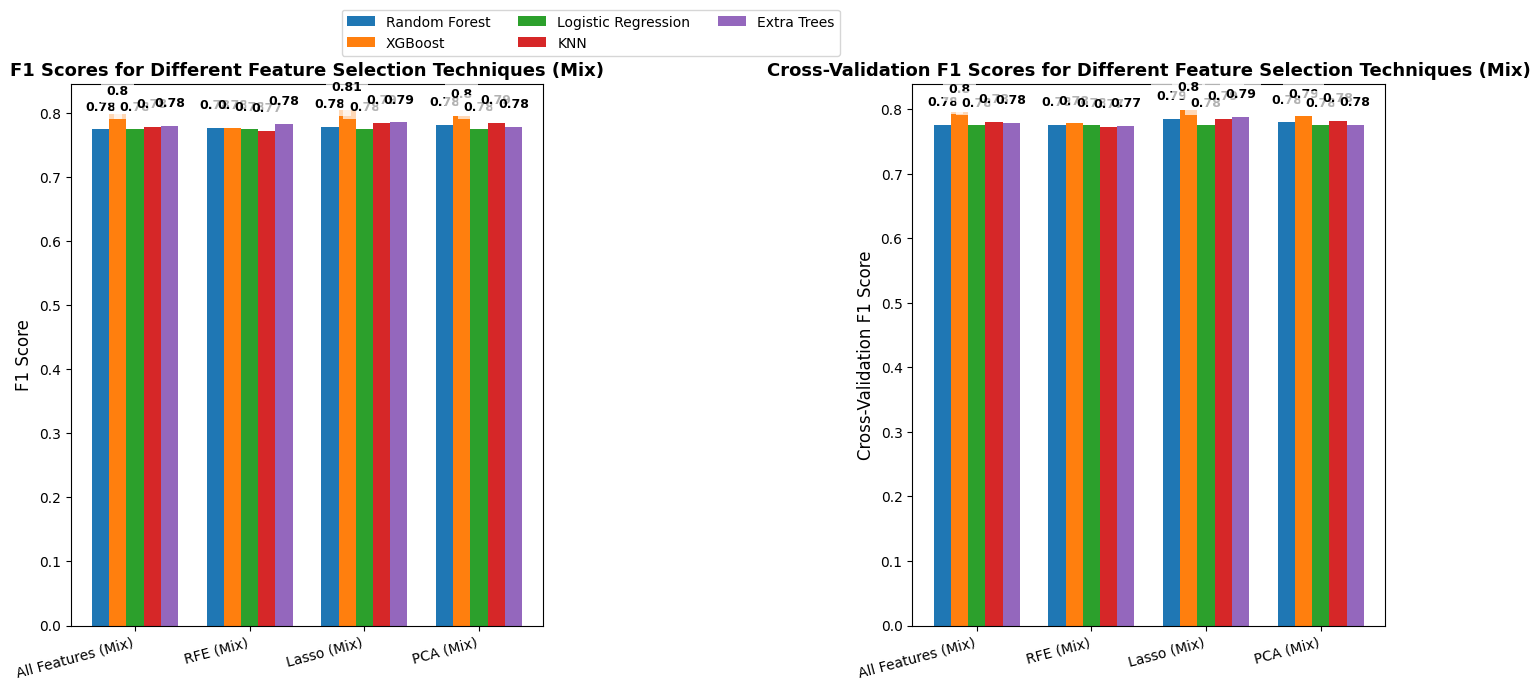

In [284]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'Extra Trees']
features = ['All Features (Mix)', 'RFE (Mix)', 'Lasso (Mix)', 'PCA (Mix)']

f1_scores_mix = {
    'Random Forest': [rf_f1_all_mix, rf_f1_rfe_mix, rf_f1_lasso_mix, rf_f1_pca_mix],
    'XGBoost': [xgb_f1_all_mix, xgb_f1_rfe_mix, xgb_f1_lasso_mix, xgb_f1_pca_mix],
    'Logistic Regression': [lr_f1_all_mix, lr_f1_rfe_mix, lr_f1_lasso_mix, lr_f1_pca_mix],
    'KNN': [knn_f1_all_mix, knn_f1_rfe_mix, knn_f1_lasso_mix, knn_f1_pca_mix],
    'Extra Trees': [et_f1_all_mix, et_f1_rfe_mix, et_f1_lasso_mix, et_f1_pca_mix],
}

cv_scores_mix = {
    'Random Forest': [rf_cv_all_mix, rf_cv_rfe_mix, rf_cv_lasso_mix, rf_cv_pca_mix],
    'XGBoost': [xgb_cv_all_mix, xgb_cv_rfe_mix, xgb_cv_lasso_mix, xgb_cv_pca_mix],
    'Logistic Regression': [lr_cv_all_mix, lr_cv_rfe_mix, lr_cv_lasso_mix, lr_cv_pca_mix],
    'KNN': [knn_cv_all_mix, knn_cv_rfe_mix, knn_cv_lasso_mix, knn_cv_pca_mix],
    'Extra Trees': [et_cv_all_mix, et_cv_rfe_mix, et_cv_lasso_mix, et_cv_pca_mix],
}

x = np.arange(len(features)) 
bar_width = 0.15

fig, ax = plt.subplots(1, 2, figsize=(14, 7))  

# Plot F1 Score
for idx, model in enumerate(models):
    bars = ax[0].bar(x + idx * bar_width, f1_scores_mix[model], width=bar_width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.025, round(yval, 2), 
                   ha='center', va='bottom', fontsize=9, fontweight='bold',
                   bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Plot Cross-Validation Score
for idx, model in enumerate(models):
    bars = ax[1].bar(x + idx * bar_width, cv_scores_mix[model], width=bar_width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.025, round(yval, 2), 
                   ha='center', va='bottom', fontsize=9, fontweight='bold',
                   bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Atur sumbu X agar label berada di tengah grup
ax[0].set_xticks(x + (bar_width * (len(models) - 1) / 2))
ax[0].set_xticklabels(features, rotation=15, ha='right')
ax[0].set_title('F1 Scores for Different Feature Selection Techniques (Mix)', fontsize=13, fontweight='bold')
ax[0].set_ylabel('F1 Score', fontsize=12)

ax[1].set_xticks(x + (bar_width * (len(models) - 1) / 2))
ax[1].set_xticklabels(features, rotation=15, ha='right')
ax[1].set_title('Cross-Validation F1 Scores for Different Feature Selection Techniques (Mix)', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Cross-Validation F1 Score', fontsize=12)

# Gabungkan legenda di satu subplot agar lebih rapi
ax[0].legend(loc='upper center', bbox_to_anchor=(1.1, 1.15), ncol=3, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

target_column = 'Accident_severity'
corr_matrix = df_ohe.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_ohe = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_ohe.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_ohe, y_train_ohe)
selected_features_rfe_ohe = X_train_ohe.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_ohe)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_ohe = pca.fit_transform(X_train_ohe)
X_test_pca_ohe = pca.transform(X_test_ohe)

len(selected_features_corr_ohe), len(selected_features_rfe_ohe), len(selected_features_lasso_ohe), X_train_pca_ohe.shape[1]


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age_band_of_driver
- Area_accident_occured_kfold
- Casualty_severity
- Cause_of_accident_kfold
- Day_kfold
- ...
Feature names seen at fit time, yet now missing:
- Age_band_of_driver_18-30
- Age_band_of_driver_31-50
- Age_band_of_driver_Over 51
- Age_band_of_driver_Under 18
- Age_band_of_driver_Unknown
- ...


In [279]:

pca = PCA(n_components=10)
X_train_pca_ohe = pca.fit_transform(X_train_ohe)
X_test_pca_ohe = pca.transform(X_test_ohe)

len(selected_features_corr_ohe), len(selected_features_rfe_ohe), len(selected_features_lasso_ohe), X_train_pca_ohe.shape[1]


(2, 10, 44, 10)

Fitur yang dipilih berdasarkan korelasi: 2
Fitur yang dipilih dengan RFE: 10
Fitur yang dipilih dengan Lasso: 44
Jumlah komponen PCA: 10


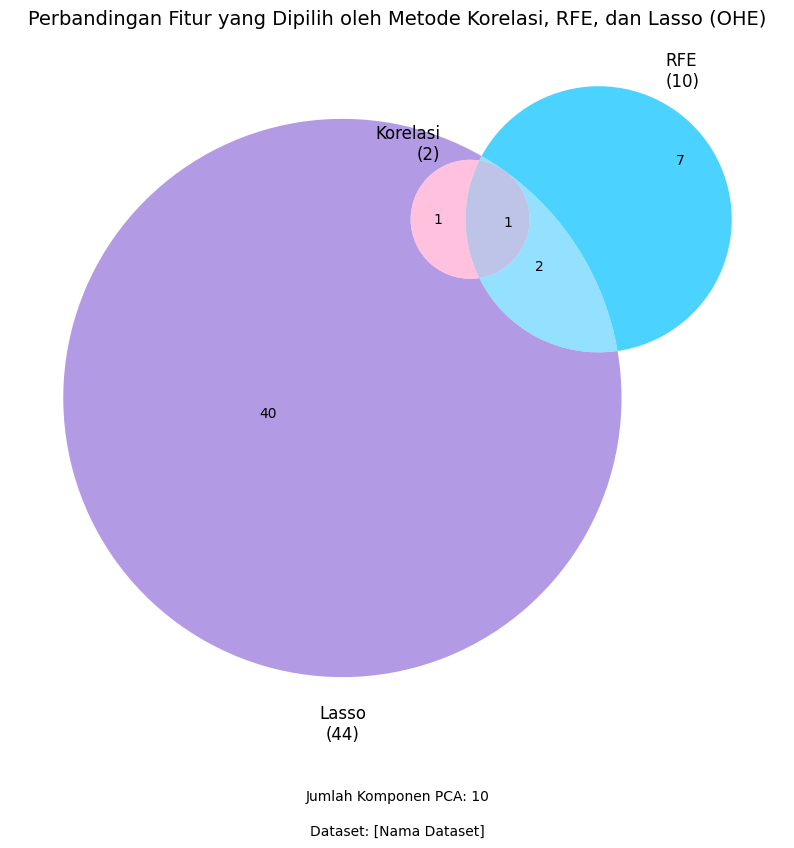

In [280]:

print(f"Fitur yang dipilih berdasarkan korelasi: {len(selected_features_corr_ohe)}")
print(f"Fitur yang dipilih dengan RFE: {len(selected_features_rfe_ohe)}")
print(f"Fitur yang dipilih dengan Lasso: {len(selected_features_lasso_ohe)}")
print(f"Jumlah komponen PCA: {X_train_pca_ohe.shape[1]}")

venn_labels = {
    '100': len(set(selected_features_corr_ohe) - set(selected_features_rfe_ohe) - set(selected_features_lasso_ohe)),
    '010': len(set(selected_features_rfe_ohe) - set(selected_features_corr_ohe) - set(selected_features_lasso_ohe)),
    '001': len(set(selected_features_lasso_ohe) - set(selected_features_corr_ohe) - set(selected_features_rfe_ohe)),
    '110': len(set(selected_features_corr_ohe) & set(selected_features_rfe_ohe) - set(selected_features_lasso_ohe)),
    '101': len(set(selected_features_corr_ohe) & set(selected_features_lasso_ohe) - set(selected_features_rfe_ohe)),
    '011': len(set(selected_features_rfe_ohe) & set(selected_features_lasso_ohe) - set(selected_features_corr_ohe)),
    '111': len(set(selected_features_corr_ohe) & set(selected_features_rfe_ohe) & set(selected_features_lasso_ohe))
}

plt.figure(figsize=(10, 10))
v = venn3(subsets=venn_labels, set_labels=('Korelasi', 'RFE', 'Lasso'), alpha=0.7,
          set_colors=('coral', 'deepskyblue', 'mediumpurple'))  

if v.set_labels:
    v.set_labels[0].set_text(f"Korelasi\n({len(selected_features_corr_ohe)})")
    v.set_labels[1].set_text(f"RFE\n({len(selected_features_rfe_ohe)})")
    v.set_labels[2].set_text(f"Lasso\n({len(selected_features_lasso_ohe)})")

plt.title('Perbandingan Fitur yang Dipilih oleh Metode Korelasi, RFE, dan Lasso (OHE)', fontsize=14)
plt.annotate(f"Jumlah Komponen PCA: {X_train_pca_ohe.shape[1]}", xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.annotate("Dataset: [Nama Dataset]", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    return f1, cv_scores

rf_model_all_ohe = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_f1_all_ohe, rf_cv_all_ohe = evaluate_model(rf_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

xgb_model_all_ohe = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_f1_all_ohe, xgb_cv_all_ohe = evaluate_model(xgb_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

lr_model_all_ohe = LogisticRegression(max_iter=1000, random_state=42)
lr_f1_all_ohe, lr_cv_all_ohe = evaluate_model(lr_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

knn_model_all_ohe = KNeighborsClassifier(n_neighbors=5)
knn_f1_all_ohe, knn_cv_all_ohe = evaluate_model(knn_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

et_model_all_ohe = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_f1_all_ohe, et_cv_all_ohe = evaluate_model(et_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

rf_rfe_ohe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_ohe = RFE(rf_rfe_ohe, n_features_to_select=10)
rfe_ohe.fit(X_train_ohe, y_train_mix)
selected_features_rfe_ohe = X_train_ohe.columns[rfe_ohe.support_].tolist()
X_train_rfe_ohe = X_train_ohe[selected_features_rfe_ohe]
X_test_rfe_ohe = X_test_ohe[selected_features_rfe_ohe]

rf_f1_rfe_ohe, rf_cv_rfe_ohe = evaluate_model(rf_rfe_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
xgb_f1_rfe_ohe, xgb_cv_rfe_ohe = evaluate_model(xgb_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
lr_f1_rfe_ohe, lr_cv_rfe_ohe = evaluate_model(lr_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
knn_f1_rfe_ohe, knn_cv_rfe_ohe = evaluate_model(knn_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
et_f1_rfe_ohe, et_cv_rfe_ohe = evaluate_model(et_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)

lasso_ohe = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_mix)
model_lasso_ohe = SelectFromModel(lasso_ohe, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model_lasso_ohe.get_support()].tolist()
X_train_lasso_ohe = X_train_ohe[selected_features_lasso_ohe]
X_test_lasso_ohe = X_test_ohe[selected_features_lasso_ohe]

rf_f1_lasso_ohe, rf_cv_lasso_ohe = evaluate_model(rf_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
xgb_f1_lasso_ohe, xgb_cv_lasso_ohe = evaluate_model(xgb_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
lr_f1_lasso_ohe, lr_cv_lasso_ohe = evaluate_model(lr_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
knn_f1_lasso_ohe, knn_cv_lasso_ohe = evaluate_model(knn_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
et_f1_lasso_ohe, et_cv_lasso_ohe = evaluate_model(et_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)

pca_ohe = PCA(n_components=10)
X_train_pca_ohe = pca_ohe.fit_transform(X_train_ohe)
X_test_pca_ohe = pca_ohe.transform(X_test_ohe)


rf_f1_pca_ohe, rf_cv_pca_ohe = evaluate_model(rf_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
xgb_f1_pca_ohe, xgb_cv_pca_ohe = evaluate_model(xgb_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
lr_f1_pca_ohe, lr_cv_pca_ohe = evaluate_model(lr_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
knn_f1_pca_ohe, knn_cv_pca_ohe = evaluate_model(knn_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
et_f1_pca_ohe, et_cv_pca_ohe = evaluate_model(et_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)

print("\nHasil Evaluasi Model dengan Semua Fitur (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_all_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_all_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_all_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_all_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_all_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_all_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_all_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_all_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_all_ohe:.4f}, Cross-Validation F1 Score: {et_cv_all_ohe:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan RFE (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_rfe_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_rfe_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_rfe_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_rfe_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {et_cv_rfe_ohe:.4f}")
print("------------------------------------------------\n")
print("\nHasil Evaluasi Model dengan Lasso (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_lasso_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_lasso_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_lasso_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_lasso_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {et_cv_lasso_ohe:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan PCA (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_pca_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_pca_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_pca_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_pca_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {et_cv_pca_ohe:.4f}")
print("------------------------------------------------\n")


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:34:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

KeyboardInterrupt: 

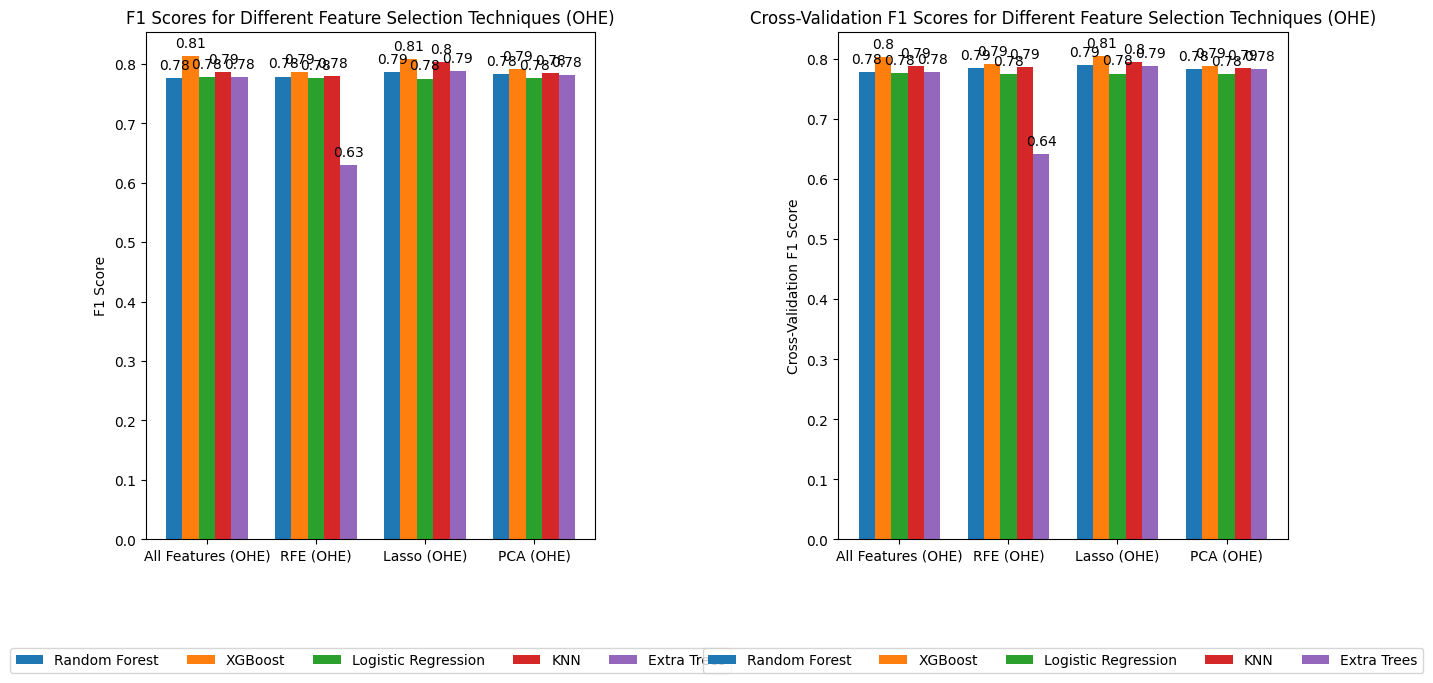

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'Extra Trees']
features = ['All Features (OHE)', 'RFE (OHE)', 'Lasso (OHE)', 'PCA (OHE)']

# F1 Scores (OHE)
f1_scores_ohe = {
    'Random Forest': [rf_f1_all_ohe, rf_f1_rfe_ohe, rf_f1_lasso_ohe, rf_f1_pca_ohe],
    'XGBoost': [xgb_f1_all_ohe, xgb_f1_rfe_ohe, xgb_f1_lasso_ohe, xgb_f1_pca_ohe],
    'Logistic Regression': [lr_f1_all_ohe, lr_f1_rfe_ohe, lr_f1_lasso_ohe, lr_f1_pca_ohe],
    'KNN': [knn_f1_all_ohe, knn_f1_rfe_ohe, knn_f1_lasso_ohe, knn_f1_pca_ohe],
    'Extra Trees': [et_f1_all_ohe, et_f1_rfe_ohe, et_f1_lasso_ohe, et_f1_pca_ohe],
}

cv_scores_ohe = {
    'Random Forest': [rf_cv_all_ohe, rf_cv_rfe_ohe, rf_cv_lasso_ohe, rf_cv_pca_ohe],
    'XGBoost': [xgb_cv_all_ohe, xgb_cv_rfe_ohe, xgb_cv_lasso_ohe, xgb_cv_pca_ohe],
    'Logistic Regression': [lr_cv_all_ohe, lr_cv_rfe_ohe, lr_cv_lasso_ohe, lr_cv_pca_ohe],
    'KNN': [knn_cv_all_ohe, knn_cv_rfe_ohe, knn_cv_lasso_ohe, knn_cv_pca_ohe],
    'Extra Trees': [et_cv_all_ohe, et_cv_rfe_ohe, et_cv_lasso_ohe, et_cv_pca_ohe],
}


x = np.arange(len(features)) 

fig, ax = plt.subplots(1, 2, figsize=(14, 7)) 

bar_width = 0.15

for idx, model in enumerate(models):
    bars = ax[0].bar(x + idx * bar_width, f1_scores_ohe[model], width=bar_width, label=model)
    
    for bar in bars:
        yval = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

for idx, model in enumerate(models):
    bars = ax[1].bar(x + idx * bar_width, cv_scores_ohe[model], width=bar_width, label=model)
    
    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax[0].set_xticks(x + 0.3)
ax[0].set_xticklabels(features)
ax[0].set_title('F1 Scores for Different Feature Selection Techniques (OHE)')
ax[0].set_ylabel('F1 Score')

ax[1].set_xticks(x + 0.3)
ax[1].set_xticklabels(features)
ax[1].set_title('Cross-Validation F1 Scores for Different Feature Selection Techniques (OHE)')
ax[1].set_ylabel('Cross-Validation F1 Score')

ax[0].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)
ax[1].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

plt.tight_layout()
plt.show()


In [281]:
target_column = 'Accident_severity'
corr_matrix = df_kfold.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_kfold = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_kfold.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_kfold, y_train_kfold)
selected_features_rfe_kfold = X_train_kfold.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_kfold, y_train_kfold)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_kfold = X_train_kfold.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_kfold = pca.fit_transform(X_train_kfold)
X_test_pca_kfold = pca.transform(X_test_kfold)

len(selected_features_corr_kfold), len(selected_features_rfe_kfold), len(selected_features_lasso_kfold), X_train_pca_kfold.shape[1]

# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE, SelectFromModel
# from sklearn.linear_model import LassoCV
# from sklearn.decomposition import PCA
# from sklearn.model_selection import cross_val_score

# target_column = 'Accident_severity'

# corr_matrix = df_kfold.corr()
# target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
# selected_features_corr_kfold = target_corr[target_corr > 0.05].index.tolist()
# selected_features_corr_kfold.remove(target_column)

# def select_best_rfe(X_train, y_train):
#     rf = RandomForestClassifier(n_estimators=100, random_state=42)
#     scores = []
#     num_features = list(range(5, X_train.shape[1], 5))  

#     best_n = 5
#     best_score = 0

#     for n in num_features:
#         rfe = RFE(rf, n_features_to_select=n)
#         X_rfe = rfe.fit_transform(X_train, y_train)
#         score = np.mean(cross_val_score(rf, X_rfe, y_train, cv=5))
        
#         if score > best_score:
#             best_score = score
#             best_n = n

#     print(f"Jumlah fitur optimal untuk RFE: {best_n}")
#     return best_n

# best_n_features = select_best_rfe(X_train_kfold, y_train_kfold)


# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rfe = RFE(rf, n_features_to_select=best_n_features)
# rfe.fit(X_train_kfold, y_train_kfold)
# selected_features_rfe_kfold = X_train_kfold.columns[rfe.support_].tolist()

# # Lasso untuk seleksi fitur
# lasso = LassoCV(cv=5, random_state=42).fit(X_train_kfold, y_train_kfold)
# model = SelectFromModel(lasso, prefit=True)
# selected_features_lasso_kfold = X_train_kfold.columns[model.get_support()].tolist()

# # PCA Dinamis (Menentukan jumlah komponen berdasarkan 95% varians)
# pca = PCA()
# X_train_pca_kfold = pca.fit_transform(X_train_kfold)
# explained_variance = pca.explained_variance_ratio_.cumsum()

# # Cari jumlah komponen optimal
# n_components_optimal = (explained_variance < 0.95).sum() + 1

# # Terapkan PCA dengan jumlah komponen optimal
# pca = PCA(n_components=n_components_optimal)
# X_train_pca_kfold = pca.fit_transform(X_train_kfold)
# X_test_pca_mix = pca.transform(X_test_kfold)

# print(f"Jumlah komponen PCA yang dipilih: {n_components_optimal}")

# # Output jumlah fitur yang dipilih dari masing-masing metode
# print(f"Jumlah fitur dari korelasi: {len(selected_features_corr_kfold)}")
# print(f"Jumlah fitur dari RFE: {len(selected_features_rfe_kfold)}")
# print(f"Jumlah fitur dari Lasso: {len(selected_features_lasso_kfold)}")
# print(f"Jumlah komponen PCA: {X_train_pca_kfold.shape[1]}")


(4, 10, 19, 10)

Fitur yang dipilih berdasarkan korelasi: 4
Fitur yang dipilih dengan RFE: 10
Fitur yang dipilih dengan Lasso: 19
Jumlah komponen PCA: 10


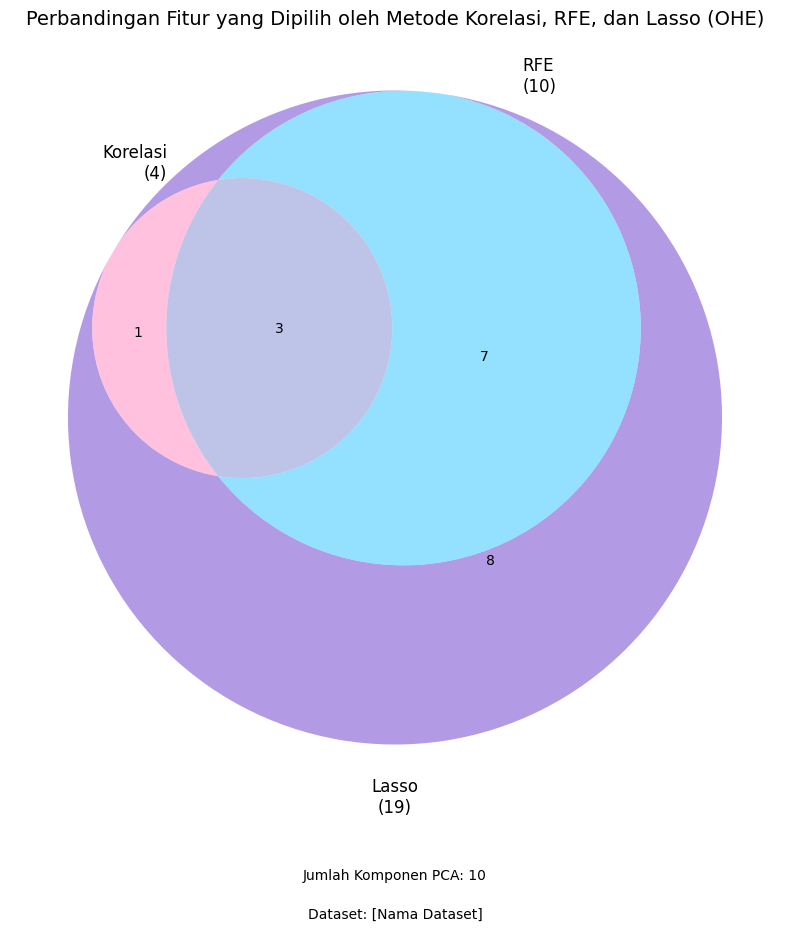

In [282]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

print(f"Fitur yang dipilih berdasarkan korelasi: {len(selected_features_corr_kfold)}")
print(f"Fitur yang dipilih dengan RFE: {len(selected_features_rfe_kfold)}")
print(f"Fitur yang dipilih dengan Lasso: {len(selected_features_lasso_kfold)}")
print(f"Jumlah komponen PCA: {X_train_pca_kfold.shape[1]}")

venn_labels = {
    '100': len(set(selected_features_corr_kfold) - set(selected_features_rfe_kfold) - set(selected_features_lasso_kfold)),
    '010': len(set(selected_features_rfe_kfold) - set(selected_features_corr_kfold) - set(selected_features_lasso_kfold)),
    '001': len(set(selected_features_lasso_kfold) - set(selected_features_corr_kfold) - set(selected_features_rfe_kfold)),
    '110': len(set(selected_features_corr_kfold) & set(selected_features_rfe_kfold) - set(selected_features_lasso_kfold)),
    '101': len(set(selected_features_corr_kfold) & set(selected_features_lasso_kfold) - set(selected_features_rfe_kfold)),
    '011': len(set(selected_features_rfe_kfold) & set(selected_features_lasso_kfold) - set(selected_features_corr_kfold)),
    '111': len(set(selected_features_corr_kfold) & set(selected_features_rfe_kfold) & set(selected_features_lasso_kfold))
}

plt.figure(figsize=(10, 10))
v = venn3(subsets=venn_labels, set_labels=('Korelasi', 'RFE', 'Lasso'), alpha=0.7,
          set_colors=('coral', 'deepskyblue', 'mediumpurple'))  

if v.set_labels:
    v.set_labels[0].set_text(f"Korelasi\n({len(selected_features_corr_kfold)})")
    v.set_labels[1].set_text(f"RFE\n({len(selected_features_rfe_kfold)})")
    v.set_labels[2].set_text(f"Lasso\n({len(selected_features_lasso_kfold)})")

plt.title('Perbandingan Fitur yang Dipilih oleh Metode Korelasi, RFE, dan Lasso (OHE)', fontsize=14)
plt.annotate(f"Jumlah Komponen PCA: {X_train_pca_kfold.shape[1]}", xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.annotate("Dataset: [Nama Dataset]", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [ ]:

def evaluate_model_kfold(model, X_train_kfold, y_train, X_test, y_test, cv=5):
    model.fit(X_train_kfold, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    cv_scores = cross_val_score(model, X_train_kfold, y_train, cv=cv, scoring='f1_weighted')
    return f1, np.mean(cv_scores)

rf_model_all_kfold = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_f1_all_kfold, rf_cv_all_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_kfold, y_train_mix, X_test, y_test_mix)

xgb_model_all_kfold = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_f1_all_kfold, xgb_cv_all_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_kfold, y_train_mix, X_test, y_test_mix)

lr_model_all_kfold = LogisticRegression(max_iter=1000, random_state=42)
lr_f1_all_kfold, lr_cv_all_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_kfold, y_train_mix, X_test, y_test_mix)

knn_model_all_kfold = KNeighborsClassifier(n_neighbors=5)
knn_f1_all_kfold, knn_cv_all_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_kfold, y_train_mix, X_test, y_test_mix)

et_model_all_kfold = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_f1_all_kfold, et_cv_all_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_kfold, y_train_mix, X_test, y_test_mix)

rf_rfe_kfold = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_kfold = RFE(rf_rfe_kfold, n_features_to_select=10)
rfe_kfold.fit(X_train_kfold, y_train_mix)
selected_features_rfe_kfold = X_train_kfold.columns[rfe_kfold.support_].tolist()
X_train_rfe_kfold = X_train_kfold[selected_features_rfe_kfold]
X_test_rfe_kfold = X_test[selected_features_rfe_kfold]

rf_f1_rfe_kfold, rf_cv_rfe_kfold = evaluate_model_kfold(rf_rfe_kfold, X_train_rfe_kfold, y_train_mix, X_test_rfe_kfold, y_test_mix)
xgb_f1_rfe_kfold, xgb_cv_rfe_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_rfe_kfold, y_train_mix, X_test_rfe_kfold, y_test_mix)
lr_f1_rfe_kfold, lr_cv_rfe_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_rfe_kfold, y_train_mix, X_test_rfe_kfold, y_test_mix)
knn_f1_rfe_kfold, knn_cv_rfe_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_rfe_kfold, y_train_mix, X_test_rfe_kfold, y_test_mix)
et_f1_rfe_kfold, et_cv_rfe_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_rfe_kfold, y_train_mix, X_test_rfe_kfold, y_test_mix)

lasso_kfold = LassoCV(cv=5, random_state=42).fit(X_train_kfold, y_train_mix)
model_lasso_kfold = SelectFromModel(lasso_kfold, prefit=True)
selected_features_lasso_kfold = X_train_kfold.columns[model_lasso_kfold.get_support()].tolist()
X_train_lasso_kfold = X_train_kfold[selected_features_lasso_kfold]
X_test_lasso_kfold = X_test[selected_features_lasso_kfold]

rf_f1_lasso_kfold, rf_cv_lasso_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_lasso_kfold, y_train_mix, X_test_lasso_kfold, y_test_mix)
xgb_f1_lasso_kfold, xgb_cv_lasso_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_lasso_kfold, y_train_mix, X_test_lasso_kfold, y_test_mix)
lr_f1_lasso_kfold, lr_cv_lasso_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_lasso_kfold, y_train_mix, X_test_lasso_kfold, y_test_mix)
knn_f1_lasso_kfold, knn_cv_lasso_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_lasso_kfold, y_train_mix, X_test_lasso_kfold, y_test_mix)
et_f1_lasso_kfold, et_cv_lasso_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_lasso_kfold, y_train_mix, X_test_lasso_kfold, y_test_mix)

pca_kfold = PCA(n_components=10)
X_train_pca_kfold = pca_kfold.fit_transform(X_train_kfold)
X_test_pca_kfold = pca_kfold.transform(X_test)

rf_f1_pca_kfold, rf_cv_pca_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_pca_kfold, y_train_mix, X_test_pca_kfold, y_test_mix)
xgb_f1_pca_kfold, xgb_cv_pca_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_pca_kfold, y_train_mix, X_test_pca_kfold, y_test_mix)
lr_f1_pca_kfold, lr_cv_pca_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_pca_kfold, y_train_mix, X_test_pca_kfold, y_test_mix)
knn_f1_pca_kfold, knn_cv_pca_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_pca_kfold, y_train_mix, X_test_pca_kfold, y_test_mix)
et_f1_pca_kfold, et_cv_pca_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_pca_kfold, y_train_mix, X_test_pca_kfold, y_test_mix)

print("\nHasil Evaluasi Model dengan Semua Fitur (K-Fold):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_all_kfold:.4f}, Cross-Validation F1 Score: {rf_cv_all_kfold:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_all_kfold:.4f}, Cross-Validation F1 Score: {xgb_cv_all_kfold:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_all_kfold:.4f}, Cross-Validation F1 Score: {lr_cv_all_kfold:.4f}")
print(f"KNN - F1 Score: {knn_f1_all_kfold:.4f}, Cross-Validation F1 Score: {knn_cv_all_kfold:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_all_kfold:.4f}, Cross-Validation F1 Score: {et_cv_all_kfold:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan RFE (K-Fold):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_rfe_kfold:.4f}, Cross-Validation F1 Score: {rf_cv_rfe_kfold:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_rfe_kfold:.4f}, Cross-Validation F1 Score: {xgb_cv_rfe_kfold:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_rfe_kfold:.4f}, Cross-Validation F1 Score: {lr_cv_rfe_kfold:.4f}")
print(f"KNN - F1 Score: {knn_f1_rfe_kfold:.4f}, Cross-Validation F1 Score: {knn_cv_rfe_kfold:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_rfe_kfold:.4f}, Cross-Validation F1 Score: {et_cv_rfe_kfold:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan Lasso (K-Fold):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_lasso_kfold:.4f}, Cross-Validation F1 Score: {rf_cv_lasso_kfold:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_lasso_kfold:.4f}, Cross-Validation F1 Score: {xgb_cv_lasso_kfold:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_lasso_kfold:.4f}, Cross-Validation F1 Score: {lr_cv_lasso_kfold:.4f}")
print(f"KNN - F1 Score: {knn_f1_lasso_kfold:.4f}, Cross-Validation F1 Score: {knn_cv_lasso_kfold:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_lasso_kfold:.4f}, Cross-Validation F1 Score: {et_cv_lasso_kfold:.4f}")
print("------------------------------------------------\n")

print("\nHasil Evaluasi Model dengan PCA (K-Fold):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_pca_kfold:.4f}, Cross-Validation F1 Score: {rf_cv_pca_kfold:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_pca_kfold:.4f}, Cross-Validation F1 Score: {xgb_cv_pca_kfold:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_pca_kfold:.4f}, Cross-Validation F1 Score: {lr_cv_pca_kfold:.4f}")
print(f"KNN - F1 Score: {knn_f1_pca_kfold:.4f}, Cross-Validation F1 Score: {knn_cv_pca_kfold:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_pca_kfold:.4f}, Cross-Validation F1 Score: {et_cv_pca_kfold:.4f}")


KeyboardInterrupt: 

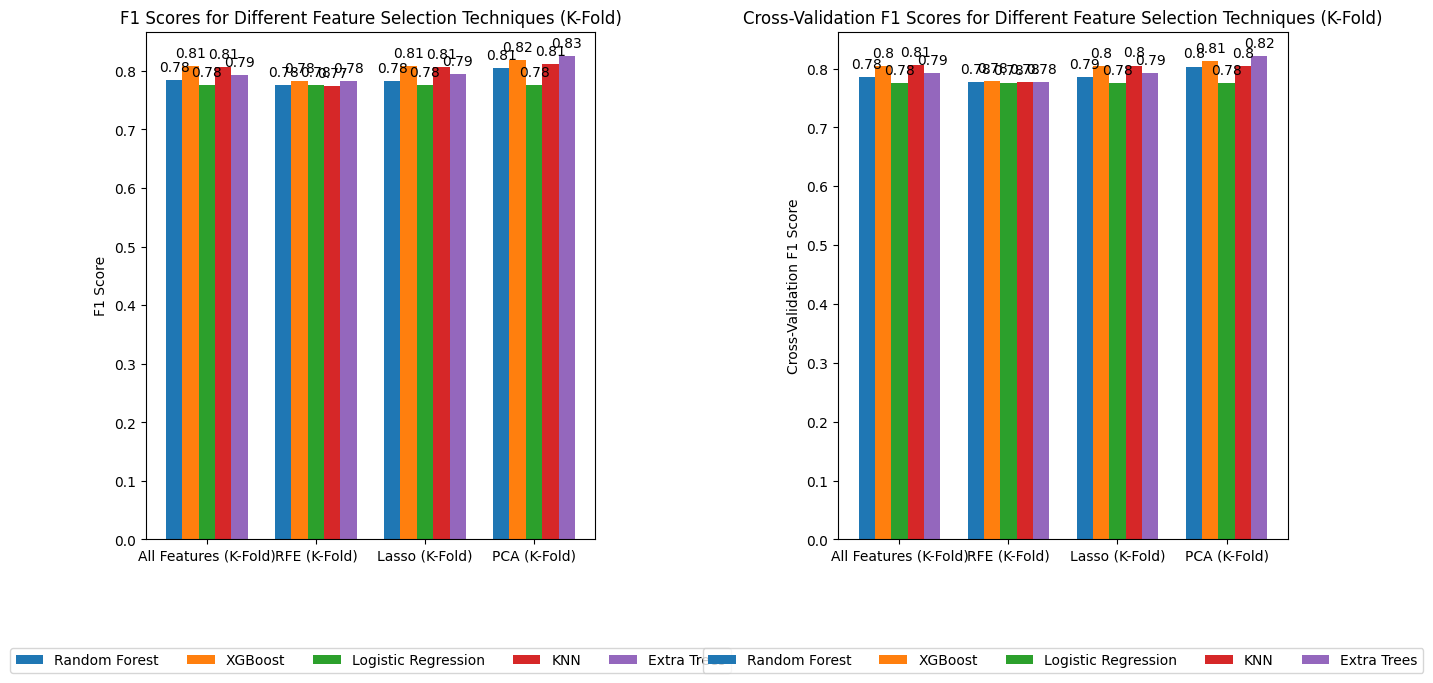

In [ ]:

models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'Extra Trees']
features = ['All Features (K-Fold)', 'RFE (K-Fold)', 'Lasso (K-Fold)', 'PCA (K-Fold)']

f1_scores_kfold = {
    'Random Forest': [rf_f1_all_kfold, rf_f1_rfe_kfold, rf_f1_lasso_kfold, rf_f1_pca_kfold],
    'XGBoost': [xgb_f1_all_kfold, xgb_f1_rfe_kfold, xgb_f1_lasso_kfold, xgb_f1_pca_kfold],
    'Logistic Regression': [lr_f1_all_kfold, lr_f1_rfe_kfold, lr_f1_lasso_kfold, lr_f1_pca_kfold],
    'KNN': [knn_f1_all_kfold, knn_f1_rfe_kfold, knn_f1_lasso_kfold, knn_f1_pca_kfold],
    'Extra Trees': [et_f1_all_kfold, et_f1_rfe_kfold, et_f1_lasso_kfold, et_f1_pca_kfold],
}
cv_scores_kfold = {
    'Random Forest': [rf_cv_all_kfold, rf_cv_rfe_kfold, rf_cv_lasso_kfold, rf_cv_pca_kfold],
    'XGBoost': [xgb_cv_all_kfold, xgb_cv_rfe_kfold, xgb_cv_lasso_kfold, xgb_cv_pca_kfold],
    'Logistic Regression': [lr_cv_all_kfold, lr_cv_rfe_kfold, lr_cv_lasso_kfold, lr_cv_pca_kfold],
    'KNN': [knn_cv_all_kfold, knn_cv_rfe_kfold, knn_cv_lasso_kfold, knn_cv_pca_kfold],
    'Extra Trees': [et_cv_all_kfold, et_cv_rfe_kfold, et_cv_lasso_kfold, et_cv_pca_kfold],
}


x = np.arange(len(features))
fig, ax = plt.subplots(1, 2, figsize=(14, 7)) 


bar_width = 0.15

for idx, model in enumerate(models):
    bars = ax[0].bar(x + idx * bar_width, f1_scores_kfold[model], width=bar_width, label=model)
    
    for bar in bars:
        yval = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

for idx, model in enumerate(models):
    bars = ax[1].bar(x + idx * bar_width, cv_scores_kfold[model], width=bar_width, label=model)

    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax[0].set_xticks(x + 0.3)
ax[0].set_xticklabels(features)
ax[0].set_title('F1 Scores for Different Feature Selection Techniques (K-Fold)')
ax[0].set_ylabel('F1 Score')

ax[1].set_xticks(x + 0.3)
ax[1].set_xticklabels(features)
ax[1].set_title('Cross-Validation F1 Scores for Different Feature Selection Techniques (K-Fold)')
ax[1].set_ylabel('Cross-Validation F1 Score')

ax[0].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)
ax[1].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

plt.tight_layout()
plt.show()


# Imbalance data

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Inisialisasi DataFrame dengan dtype yang jelas
evaluation_results = pd.DataFrame(columns=["Model Name", "Technique", "F1 Score Weighted", "F1 Score Micro"],
                                  dtype=object)

def evaluate_model_kfold(model, X_train, y_train, X_test, y_test, model_name, technique, cv=5, plot_cm=True):
    global evaluation_results
    sample_weights = None

    # Hitung class weight jika diperlukan
    if isinstance(model, XGBClassifier):
        classes = np.unique(y_train)
        class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
        class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
        sample_weights = np.array([class_weight_dict[label] for label in y_train])

    elif hasattr(model, "class_weight"):
        model.set_params(class_weight="balanced")

    # Set max_iter untuk Logistic Regression
    if isinstance(model, LogisticRegression):
        model.set_params(max_iter=2000)  

    # Train model
    if sample_weights is not None and isinstance(model, XGBClassifier):
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung F1-score
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_micro = f1_score(y_test, y_pred, average='micro')

    # Hitung cross-validation score dengan f1_micro
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_micro')

    # Simpan model
    save_dir = f"../model/f1_score_micro/{technique}"
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"{model_name}_{technique}.pkl")

    with open(save_path, "wb") as f:
        pickle.dump(model, f)

    print(f"Model saved at: {save_path}")
    print(f"F1-score Weighted: {f1_weighted:.4f}, F1-score Micro: {f1_micro:.4f}")

    # Plot Confusion Matrix jika diaktifkan
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f'Confusion Matrix: {type(model).__name__} ({technique})')
        plt.show()

    # Tambahkan hasil evaluasi ke DataFrame dengan cara aman
    new_row = pd.DataFrame.from_records([{
        "Model Name": model_name,
        "Technique": technique,
        "F1 Score Weighted": f1_weighted,
        "F1 Score Micro": f1_micro
    }])

    # Gabungkan dengan DataFrame yang sudah ada
    if evaluation_results.empty:
        evaluation_results = new_row
    else:
        evaluation_results = pd.concat([evaluation_results, new_row], ignore_index=True)

    # Kembalikan hanya F1-score micro
    return f1_micro, np.mean(cv_scores)

# Contoh cara melihat hasil evaluasi setelah beberapa model diuji
print(evaluation_results)


Empty DataFrame
Columns: [Model Name, Technique, F1 Score Weighted, F1 Score Micro]
Index: []



Evaluasi Weighted Class + Lasso + MIX
Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/RF_Weighted_Lasso_MIX.pkl
F1-score Weighted: 0.7794, F1-score Micro: 0.8386


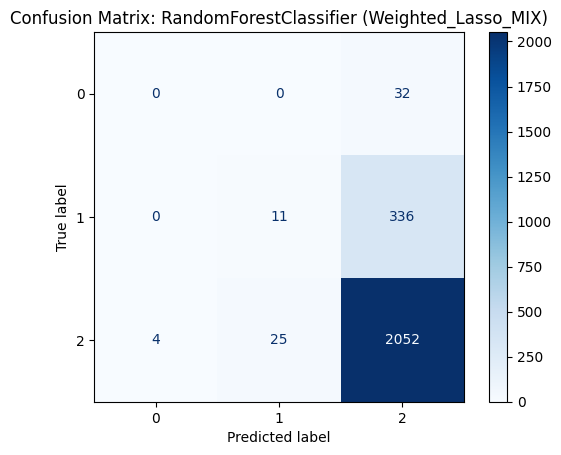

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:33:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:34:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:34:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/XGB_Weighted_Lasso_MIX.pkl
F1-score Weighted: 0.7483, F1-score Micro: 0.7228


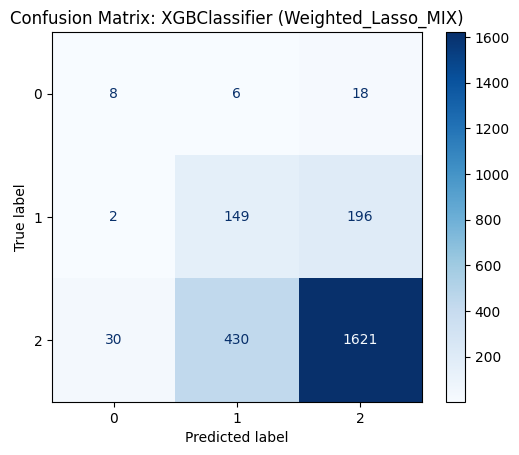

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/LR_Weighted_Lasso_MIX.pkl
F1-score Weighted: 0.5716, F1-score Micro: 0.4776


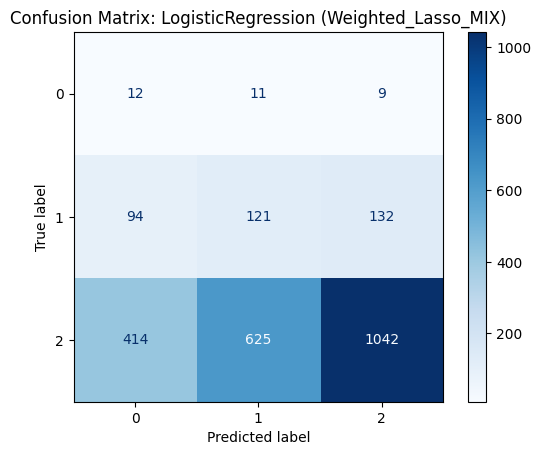

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/KNN_Weighted_Lasso_MIX.pkl
F1-score Weighted: 0.7851, F1-score Micro: 0.8333


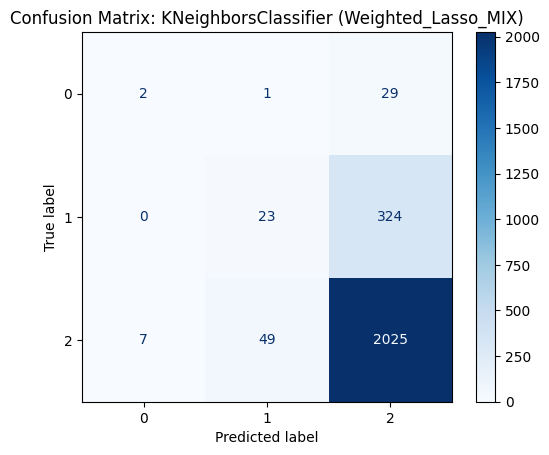

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/ET_Weighted_Lasso_MIX.pkl
F1-score Weighted: 0.7859, F1-score Micro: 0.8289


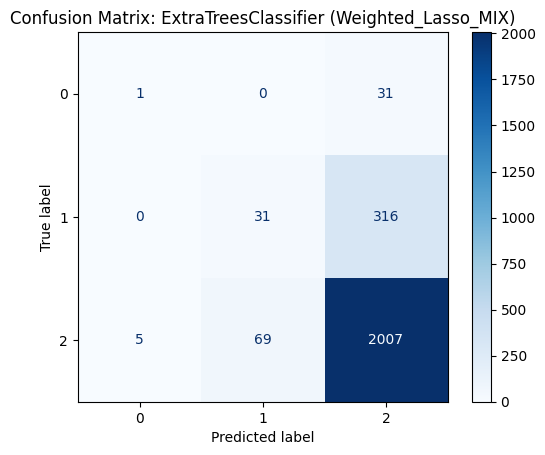


Menggunakan SMOTE-Tomek...

Evaluasi SMOTE-Tomek + Lasso + MIX...
Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/RF_SMOTE_Lasso_MIX.pkl
F1-score Weighted: 0.7819, F1-score Micro: 0.8134


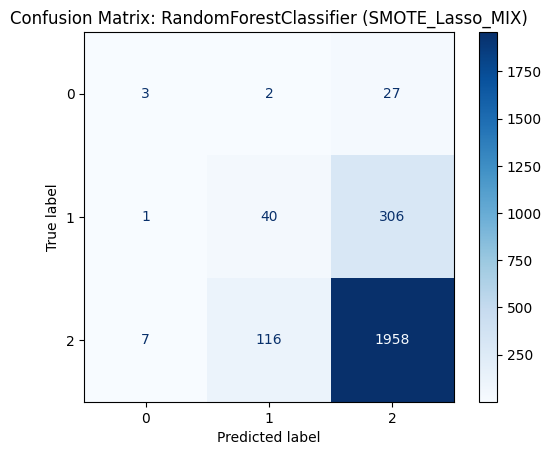

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:38:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:39:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:40:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:42:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/XGB_SMOTE_Lasso_MIX.pkl
F1-score Weighted: 0.7854, F1-score Micro: 0.8358


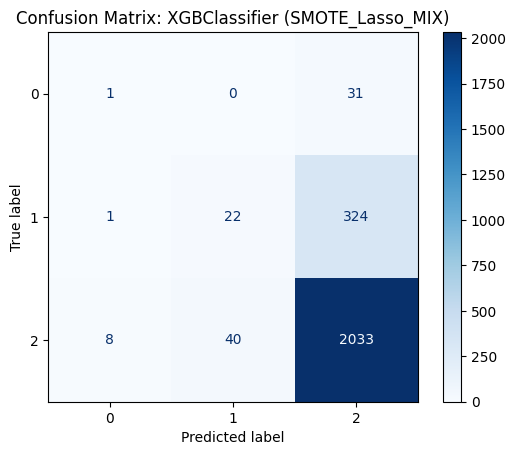

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/LR_SMOTE_Lasso_MIX.pkl
F1-score Weighted: 0.7186, F1-score Micro: 0.6959


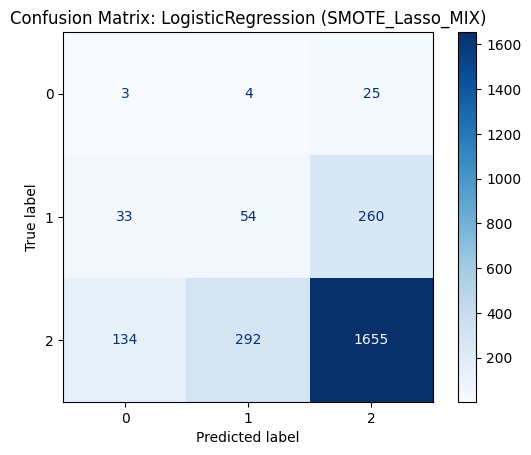

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/KNN_SMOTE_Lasso_MIX.pkl
F1-score Weighted: 0.6708, F1-score Micro: 0.6171


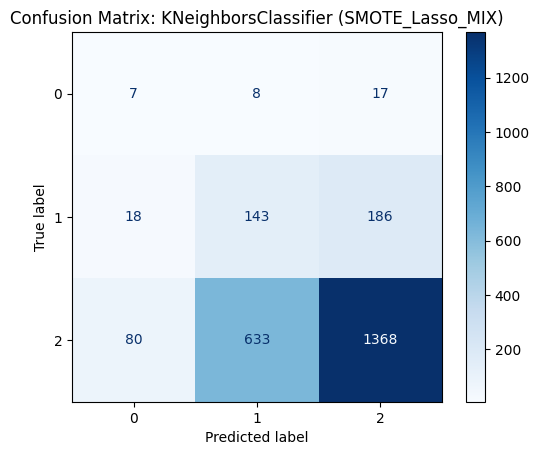

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/ET_SMOTE_Lasso_MIX.pkl
F1-score Weighted: 0.7689, F1-score Micro: 0.7923


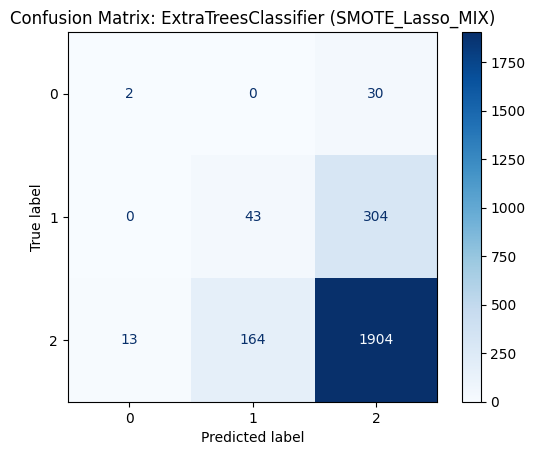


===== Perbandingan Hasil Evaluasi =====

Weighted Class + Lasso + MIX:
RF:  F1 = 0.8386, CV = 0.8443
XGB: F1 = 0.7228, CV = 0.8468
LR:  F1 = 0.4776, CV = 0.4670
KNN: F1 = 0.8333, CV = 0.8320
ET:  F1 = 0.8289, CV = 0.8325

SMOTE-Tomek + Lasso + MIX:
RF:  F1 = 0.8134, CV = 0.9229
XGB: F1 = 0.8358, CV = 0.9207
LR:  F1 = 0.6959, CV = 0.6584
KNN: F1 = 0.6171, CV = 0.8310
ET:  F1 = 0.7923, CV = 0.9163


In [ ]:

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_mix), y=y_train_mix)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

neg_count = np.sum(y_train_mix == 0)
pos_count = np.sum(y_train_mix == 1)
scale_pos_weight = neg_count / pos_count

rf_model_all_mix.set_params(class_weight=class_weight_dict)
lr_model_all_mix.set_params(class_weight=class_weight_dict)
et_model_all_mix.set_params(class_weight=class_weight_dict)

lasso_mix = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model_lasso_mix = SelectFromModel(lasso_mix, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model_lasso_mix.get_support()].tolist()
X_train_lasso_mix = X_train_mix[selected_features_lasso_mix]
X_test_lasso_mix = X_test_mix[selected_features_lasso_mix]

xgb_model_all_mix = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

print("\nEvaluasi Weighted Class + Lasso + MIX")
rf_f1_weighted, rf_cv_weighted = evaluate_model_kfold(rf_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "RF", "Weighted_Lasso_MIX")
xgb_f1_weighted, xgb_cv_weighted = evaluate_model_kfold(xgb_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "XGB", "Weighted_Lasso_MIX")
lr_f1_weighted, lr_cv_weighted = evaluate_model_kfold(lr_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "LR", "Weighted_Lasso_MIX")
knn_f1_weighted, knn_cv_weighted = evaluate_model_kfold(knn_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "KNN", "Weighted_Lasso_MIX")
et_f1_weighted, et_cv_weighted = evaluate_model_kfold(et_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "ET", "Weighted_Lasso_MIX")

print("\nMenggunakan SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_mix, y_train_mix)

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_mix.columns)
y_train_smote = pd.Series(y_train_smote)

X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

lasso_smote_mix = LassoCV(cv=5, random_state=42).fit(X_train_smote, y_train_smote)
model_lasso_smote_mix = SelectFromModel(lasso_smote_mix, prefit=True)
selected_features_smote_mix = X_train_smote.columns[model_lasso_smote_mix.get_support()].tolist()
X_train_smote_lasso_mix = X_train_smote[selected_features_smote_mix]
X_test_smote_lasso_mix = X_test_mix[selected_features_smote_mix]

print("\nEvaluasi SMOTE-Tomek + Lasso + MIX...")
rf_f1_smote, rf_cv_smote = evaluate_model_kfold(rf_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "RF", "SMOTE_Lasso_MIX")
xgb_f1_smote, xgb_cv_smote = evaluate_model_kfold(xgb_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "XGB", "SMOTE_Lasso_MIX")
lr_f1_smote, lr_cv_smote = evaluate_model_kfold(lr_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "LR", "SMOTE_Lasso_MIX")
knn_f1_smote, knn_cv_smote = evaluate_model_kfold(knn_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "KNN", "SMOTE_Lasso_MIX")
et_f1_smote, et_cv_smote = evaluate_model_kfold(et_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "ET", "SMOTE_Lasso_MIX")

print("\n===== Perbandingan Hasil Evaluasi =====")
print("\nWeighted Class + Lasso + MIX:")
print(f"RF:  F1 = {rf_f1_weighted:.4f}, CV = {rf_cv_weighted:.4f}")
print(f"XGB: F1 = {xgb_f1_weighted:.4f}, CV = {xgb_cv_weighted:.4f}")
print(f"LR:  F1 = {lr_f1_weighted:.4f}, CV = {lr_cv_weighted:.4f}")
print(f"KNN: F1 = {knn_f1_weighted:.4f}, CV = {knn_cv_weighted:.4f}")
print(f"ET:  F1 = {et_f1_weighted:.4f}, CV = {et_cv_weighted:.4f}")

print("\nSMOTE-Tomek + Lasso + MIX:")
print(f"RF:  F1 = {rf_f1_smote:.4f}, CV = {rf_cv_smote:.4f}")
print(f"XGB: F1 = {xgb_f1_smote:.4f}, CV = {xgb_cv_smote:.4f}")
print(f"LR:  F1 = {lr_f1_smote:.4f}, CV = {lr_cv_smote:.4f}")
print(f"KNN: F1 = {knn_f1_smote:.4f}, CV = {knn_cv_smote:.4f}")
print(f"ET:  F1 = {et_f1_smote:.4f}, CV = {et_cv_smote:.4f}")



Evaluasi Weighted Class + Lasso + OHE...
Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/RandomForest_WeightedClass_Lasso_OHE.pkl
F1-score Weighted: 0.7858, F1-score Micro: 0.8431


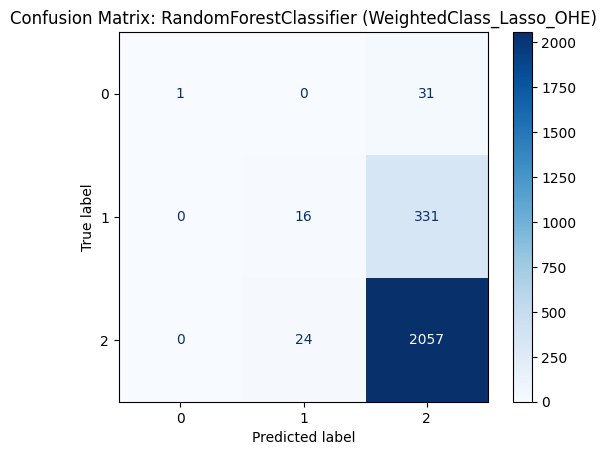

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:46:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:47:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:47:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" 

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/XGBoost_WeightedClass_Lasso_OHE.pkl
F1-score Weighted: 0.7471, F1-score Micro: 0.7175


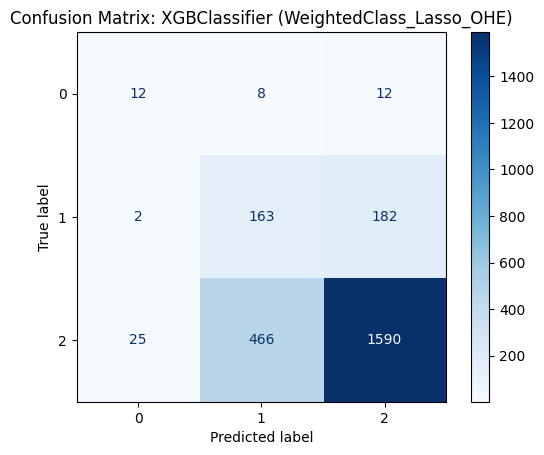

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/LogisticRegression_WeightedClass_Lasso_OHE.pkl
F1-score Weighted: 0.5805, F1-score Micro: 0.4907


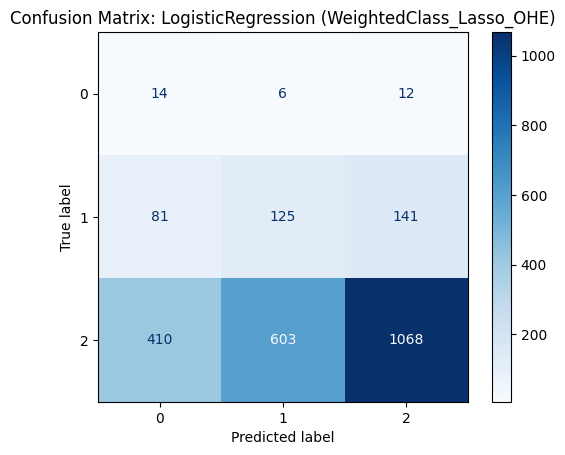

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/KNN_WeightedClass_Lasso_OHE.pkl
F1-score Weighted: 0.8026, F1-score Micro: 0.8455


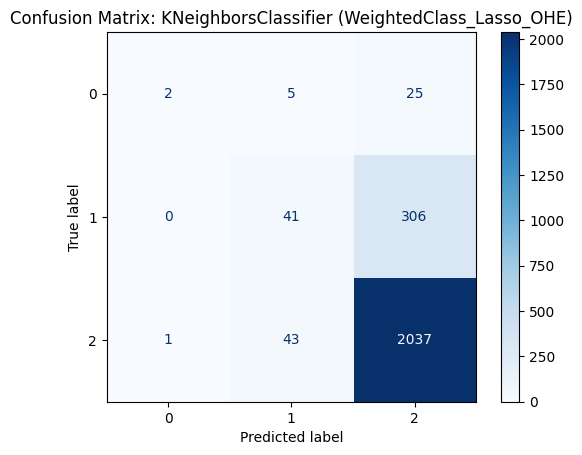

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/ExtraTrees_WeightedClass_Lasso_OHE.pkl
F1-score Weighted: 0.7873, F1-score Micro: 0.8382


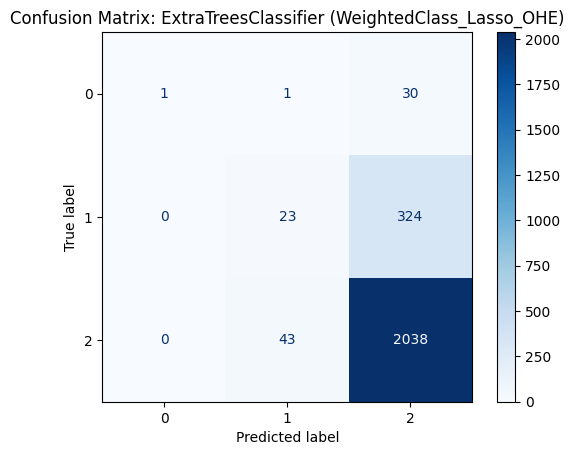


Menggunakan SMOTE-Tomek...

Evaluasi SMOTE-Tomek + Lasso + OHE...
Model saved at: ../model/f1_score_micro/SMOTE_Tomek_Lasso_OHE/RandomForest_SMOTE_Tomek_Lasso_OHE.pkl
F1-score Weighted: 0.7767, F1-score Micro: 0.8455


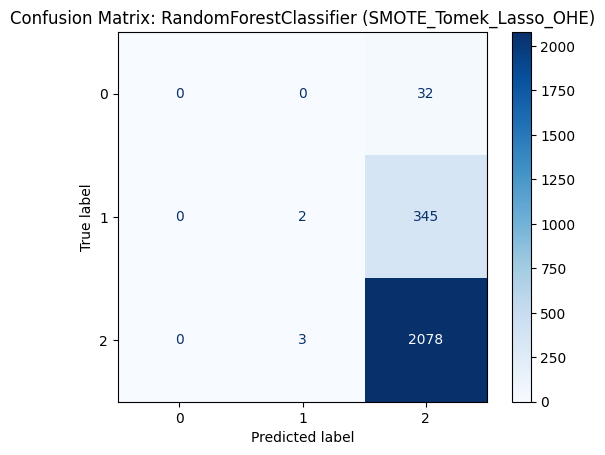

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:50:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:50:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" 

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_Lasso_OHE/XGBoost_SMOTE_Tomek_Lasso_OHE.pkl
F1-score Weighted: 0.7920, F1-score Micro: 0.8484


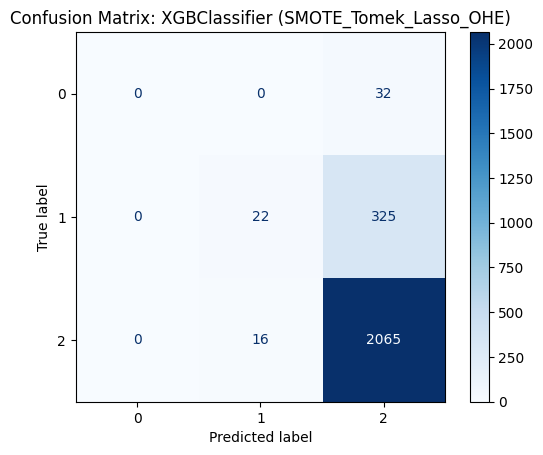

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_Lasso_OHE/LogisticRegression_SMOTE_Tomek_Lasso_OHE.pkl
F1-score Weighted: 0.6086, F1-score Micro: 0.5276


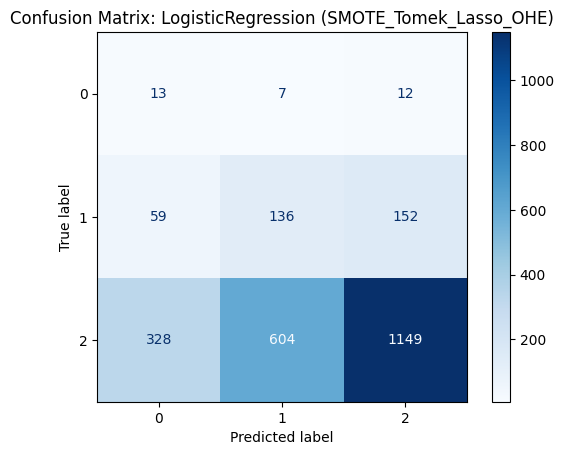

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_Lasso_OHE/KNN_SMOTE_Tomek_Lasso_OHE.pkl
F1-score Weighted: 0.4835, F1-score Micro: 0.4118


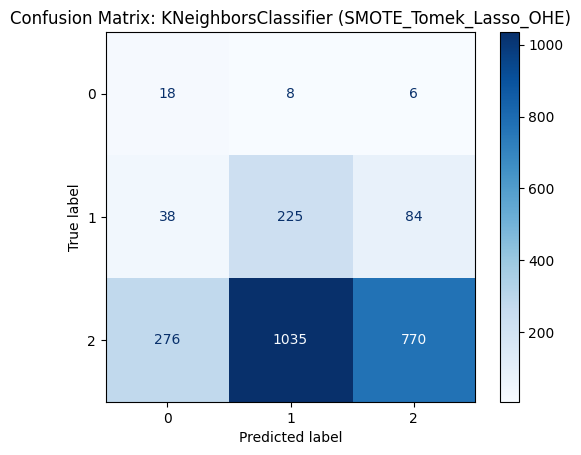

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_Lasso_OHE/ExtraTrees_SMOTE_Tomek_Lasso_OHE.pkl
F1-score Weighted: 0.7805, F1-score Micro: 0.8472


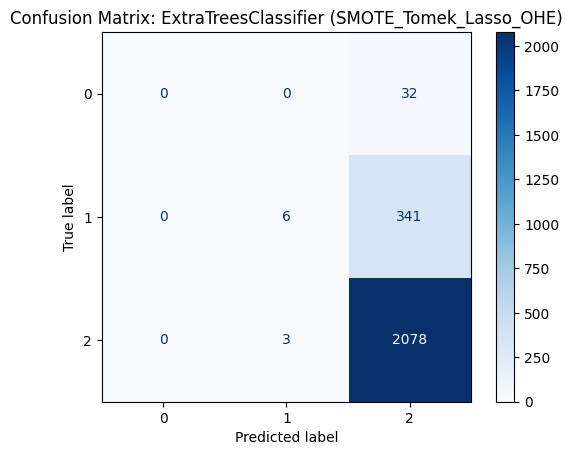


===== Perbandingan Hasil Evaluasi =====

Weighted Class + Lasso + OHE:
RF:  F1 = 0.8431, CV = 0.8455
XGB: F1 = 0.7175, CV = 0.8490
LR:  F1 = 0.4907, CV = 0.5018
KNN: F1 = 0.8455, CV = 0.8388
ET:  F1 = 0.8382, CV = 0.8404

SMOTE-Tomek + Lasso + OHE:
RF:  F1 = 0.8455, CV = 0.9403
XGB: F1 = 0.8484, CV = 0.9323
LR:  F1 = 0.5276, CV = 0.6440
KNN: F1 = 0.4118, CV = 0.7606
ET:  F1 = 0.8472, CV = 0.9470


In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_mix), y=y_train_mix)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

neg_count = np.sum(y_train_mix == 0)
pos_count = np.sum(y_train_mix == 1)
scale_pos_weight = neg_count / pos_count

rf_model_all_ohe.set_params(class_weight=class_weight_dict)
lr_model_all_ohe.set_params(class_weight=class_weight_dict)
et_model_all_ohe.set_params(class_weight=class_weight_dict)
xgb_model_all_ohe.set_params(scale_pos_weight=scale_pos_weight)

lasso_ohe = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_mix)
model_lasso_ohe = SelectFromModel(lasso_ohe, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model_lasso_ohe.get_support()].tolist()
X_train_lasso_ohe = X_train_ohe[selected_features_lasso_ohe]
X_test_lasso_ohe = X_test_ohe[selected_features_lasso_ohe]

print("\nEvaluasi Weighted Class + Lasso + OHE...")
rf_f1_ohe, rf_cv_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "RandomForest", "WeightedClass_Lasso_OHE")
xgb_f1_ohe, xgb_cv_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "XGBoost", "WeightedClass_Lasso_OHE")
lr_f1_ohe, lr_cv_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "LogisticRegression", "WeightedClass_Lasso_OHE")
knn_f1_ohe, knn_cv_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "KNN", "WeightedClass_Lasso_OHE")
et_f1_ohe, et_cv_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "ExtraTrees", "WeightedClass_Lasso_OHE")

print("\nMenggunakan SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_ohe, y_train_mix)

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_ohe.columns)
y_train_smote = pd.Series(y_train_smote)

X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

lasso_smote_ohe = LassoCV(cv=5, random_state=42).fit(X_train_smote, y_train_smote)
model_lasso_smote_ohe = SelectFromModel(lasso_smote_ohe, prefit=True)
selected_features_smote_ohe = X_train_smote.columns[model_lasso_smote_ohe.get_support()].tolist()
X_train_smote_lasso_ohe = X_train_smote[selected_features_smote_ohe]
X_test_smote_lasso_ohe = X_test_ohe[selected_features_smote_ohe]

print("\nEvaluasi SMOTE-Tomek + Lasso + OHE...")
rf_f1_smote_ohe, rf_cv_smote_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "RandomForest", "SMOTE_Tomek_Lasso_OHE")
xgb_f1_smote_ohe, xgb_cv_smote_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "XGBoost", "SMOTE_Tomek_Lasso_OHE")
lr_f1_smote_ohe, lr_cv_smote_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "LogisticRegression", "SMOTE_Tomek_Lasso_OHE")
knn_f1_smote_ohe, knn_cv_smote_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "KNN", "SMOTE_Tomek_Lasso_OHE")
et_f1_smote_ohe, et_cv_smote_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "ExtraTrees", "SMOTE_Tomek_Lasso_OHE")

print("\n===== Perbandingan Hasil Evaluasi =====")
print("\nWeighted Class + Lasso + OHE:")
print(f"RF:  F1 = {rf_f1_ohe:.4f}, CV = {rf_cv_ohe:.4f}")
print(f"XGB: F1 = {xgb_f1_ohe:.4f}, CV = {xgb_cv_ohe:.4f}")
print(f"LR:  F1 = {lr_f1_ohe:.4f}, CV = {lr_cv_ohe:.4f}")
print(f"KNN: F1 = {knn_f1_ohe:.4f}, CV = {knn_cv_ohe:.4f}")
print(f"ET:  F1 = {et_f1_ohe:.4f}, CV = {et_cv_ohe:.4f}")

print("\nSMOTE-Tomek + Lasso + OHE:")
print(f"RF:  F1 = {rf_f1_smote_ohe:.4f}, CV = {rf_cv_smote_ohe:.4f}")
print(f"XGB: F1 = {xgb_f1_smote_ohe:.4f}, CV = {xgb_cv_smote_ohe:.4f}")
print(f"LR:  F1 = {lr_f1_smote_ohe:.4f}, CV = {lr_cv_smote_ohe:.4f}")
print(f"KNN: F1 = {knn_f1_smote_ohe:.4f}, CV = {knn_cv_smote_ohe:.4f}")
print(f"ET:  F1 = {et_f1_smote_ohe:.4f}, CV = {et_cv_smote_ohe:.4f}")



Evaluasi Weighted Class + PCA + K-Fold...


Model saved at: ../model/f1_score_micro/WeightedClass_PCA_KFold/RandomForest_WeightedClass_PCA_KFold.pkl
F1-score Weighted: 0.8121, F1-score Micro: 0.8573


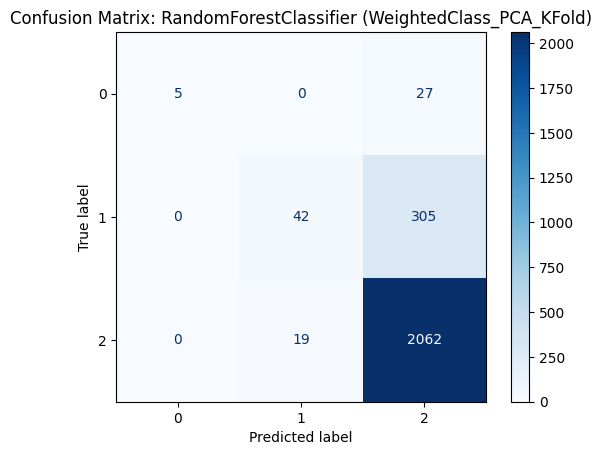

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:56:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:57:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:57:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" 

Model saved at: ../model/f1_score_micro/WeightedClass_PCA_KFold/XGBoost_WeightedClass_PCA_KFold.pkl
F1-score Weighted: 0.7892, F1-score Micro: 0.7858


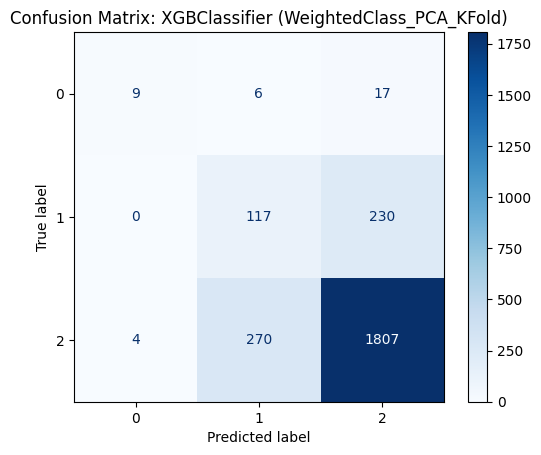

Model saved at: ../model/f1_score_micro/WeightedClass_PCA_KFold/LogisticRegression_WeightedClass_PCA_KFold.pkl
F1-score Weighted: 0.6252, F1-score Micro: 0.5402


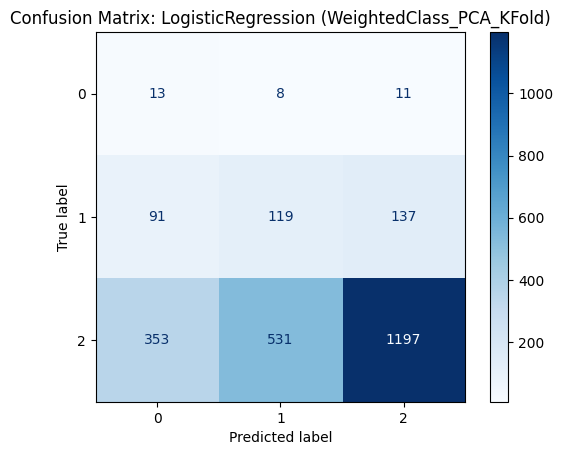

Model saved at: ../model/f1_score_micro/WeightedClass_PCA_KFold/KNN_WeightedClass_PCA_KFold.pkl
F1-score Weighted: 0.8073, F1-score Micro: 0.8370


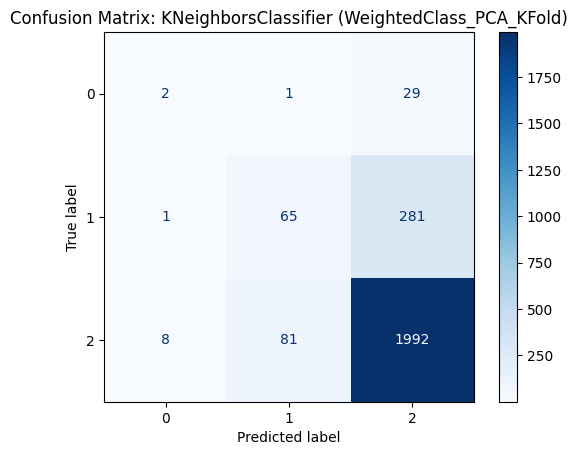

Model saved at: ../model/f1_score_micro/WeightedClass_PCA_KFold/ExtraTrees_WeightedClass_PCA_KFold.pkl
F1-score Weighted: 0.8284, F1-score Micro: 0.8561


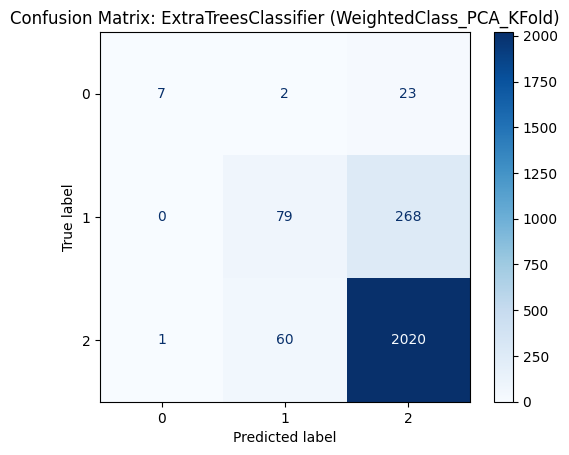


Menggunakan SMOTE-Tomek...

Evaluasi SMOTE-Tomek + PCA + K-Fold...
Model saved at: ../model/f1_score_micro/SMOTE_Tomek_PCA_KFold/RandomForest_SMOTE_Tomek_PCA_KFold.pkl
F1-score Weighted: 0.8035, F1-score Micro: 0.8077


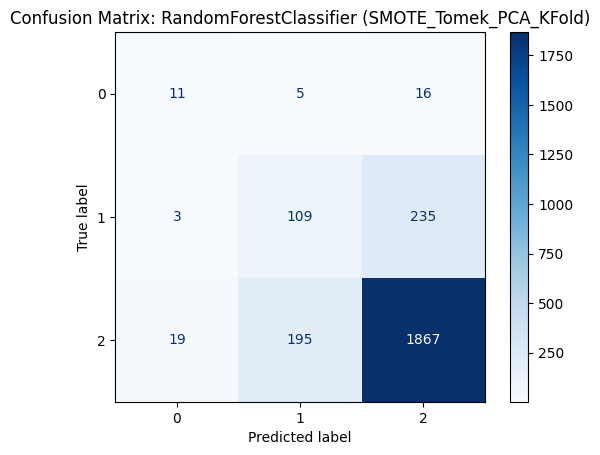

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:31:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:32:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:33:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" 

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_PCA_KFold/XGBoost_SMOTE_Tomek_PCA_KFold.pkl
F1-score Weighted: 0.7797, F1-score Micro: 0.7752


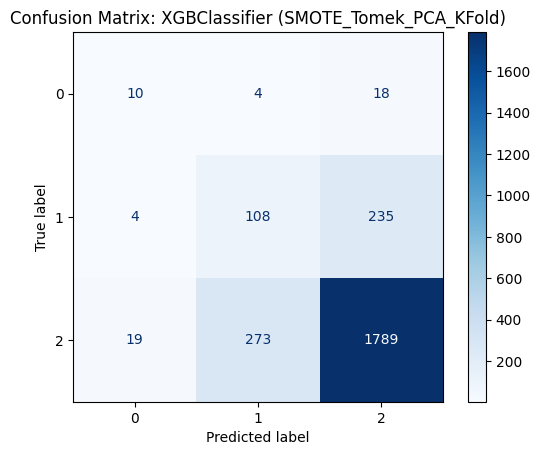

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_PCA_KFold/LogisticRegression_SMOTE_Tomek_PCA_KFold.pkl
F1-score Weighted: 0.6167, F1-score Micro: 0.5276


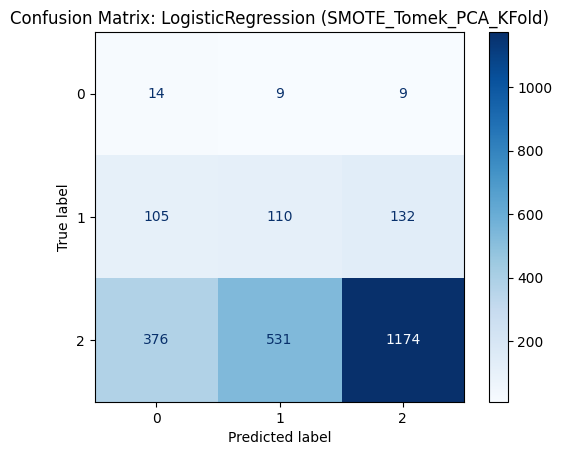

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_PCA_KFold/KNN_SMOTE_Tomek_PCA_KFold.pkl
F1-score Weighted: 0.7172, F1-score Micro: 0.6724


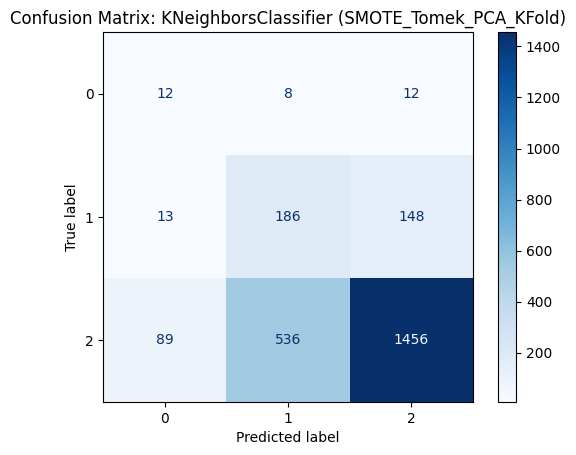

Model saved at: ../model/f1_score_micro/SMOTE_Tomek_PCA_KFold/ExtraTrees_SMOTE_Tomek_PCA_KFold.pkl
F1-score Weighted: 0.8073, F1-score Micro: 0.8146


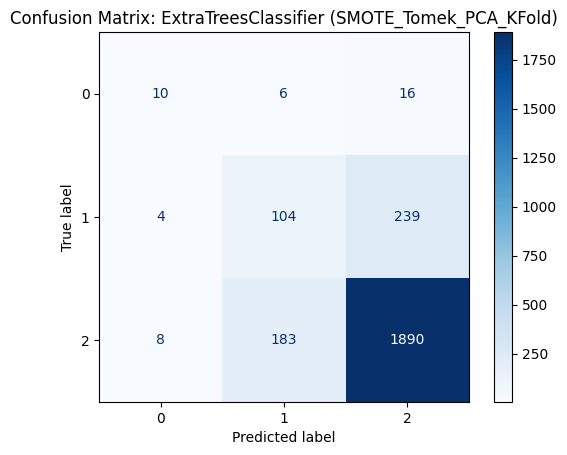


===== Perbandingan Hasil Evaluasi =====

Weighted Class + PCA + K-Fold:
RF:  F1 = 0.8573, CV = 0.8545
XGB: F1 = 0.7858, CV = 0.8508
LR:  F1 = 0.5402, CV = 0.5425
KNN: F1 = 0.8370, CV = 0.8347
ET:  F1 = 0.8561, CV = 0.8571

SMOTE-Tomek + PCA + K-Fold:
RF:  F1 = 0.8077, CV = 0.9023
XGB: F1 = 0.7752, CV = 0.8819
LR:  F1 = 0.5276, CV = 0.4870
KNN: F1 = 0.6724, CV = 0.8386
ET:  F1 = 0.8146, CV = 0.9095


In [ ]:


class_weights = compute_class_weight('balanced', classes=np.unique(y_train_kfold), y=y_train_kfold)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

neg_count = np.sum(y_train_kfold == 0)
pos_count = np.sum(y_train_kfold == 1)
scale_pos_weight = neg_count / pos_count

rf_model_all_kfold.set_params(class_weight=class_weight_dict)
lr_model_all_kfold.set_params(class_weight=class_weight_dict)
et_model_all_kfold.set_params(class_weight=class_weight_dict)
xgb_model_all_kfold.set_params(scale_pos_weight=scale_pos_weight)

pca_weighted = PCA(n_components=10)
X_train_pca_weighted = pca_weighted.fit_transform(X_train_kfold)
X_test_pca_weighted = pca_weighted.transform(X_test_kfold)
print("\nEvaluasi Weighted Class + PCA + K-Fold...")
rf_f1_weighted_kfold, rf_cv_weighted_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "RandomForest", "WeightedClass_PCA_KFold")
xgb_f1_weighted_kfold, xgb_cv_weighted_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "XGBoost", "WeightedClass_PCA_KFold")
lr_f1_weighted_kfold, lr_cv_weighted_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "LogisticRegression", "WeightedClass_PCA_KFold")
knn_f1_weighted_kfold, knn_cv_weighted_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "KNN", "WeightedClass_PCA_KFold")
et_f1_weighted_kfold, et_cv_weighted_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "ExtraTrees", "WeightedClass_PCA_KFold")

print("\nMenggunakan SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_kfold, y_train_kfold)

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_kfold.columns)
y_train_smote = pd.Series(y_train_smote)

X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

pca_smote = PCA(n_components=10)
X_train_smote_pca = pca_smote.fit_transform(X_train_smote)
X_test_smote_pca = pca_smote.transform(X_test_kfold)

print("\nEvaluasi SMOTE-Tomek + PCA + K-Fold...")
rf_f1_smote_kfold, rf_cv_smote_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "RandomForest", "SMOTE_Tomek_PCA_KFold")
xgb_f1_smote_kfold, xgb_cv_smote_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "XGBoost", "SMOTE_Tomek_PCA_KFold")
lr_f1_smote_kfold, lr_cv_smote_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "LogisticRegression", "SMOTE_Tomek_PCA_KFold")
knn_f1_smote_kfold, knn_cv_smote_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "KNN", "SMOTE_Tomek_PCA_KFold")
et_f1_smote_kfold, et_cv_smote_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "ExtraTrees", "SMOTE_Tomek_PCA_KFold")

print("\n===== Perbandingan Hasil Evaluasi =====")
print("\nWeighted Class + PCA + K-Fold:")
print(f"RF:  F1 = {rf_f1_weighted_kfold:.4f}, CV = {rf_cv_weighted_kfold:.4f}")
print(f"XGB: F1 = {xgb_f1_weighted_kfold:.4f}, CV = {xgb_cv_weighted_kfold:.4f}")
print(f"LR:  F1 = {lr_f1_weighted_kfold:.4f}, CV = {lr_cv_weighted_kfold:.4f}")
print(f"KNN: F1 = {knn_f1_weighted_kfold:.4f}, CV = {knn_cv_weighted_kfold:.4f}")
print(f"ET:  F1 = {et_f1_weighted_kfold:.4f}, CV = {et_cv_weighted_kfold:.4f}")

print("\nSMOTE-Tomek + PCA + K-Fold:")
print(f"RF:  F1 = {rf_f1_smote_kfold:.4f}, CV = {rf_cv_smote_kfold:.4f}")
print(f"XGB: F1 = {xgb_f1_smote_kfold:.4f}, CV = {xgb_cv_smote_kfold:.4f}")
print(f"LR:  F1 = {lr_f1_smote_kfold:.4f}, CV = {lr_cv_smote_kfold:.4f}")
print(f"KNN: F1 = {knn_f1_smote_kfold:.4f}, CV = {knn_cv_smote_kfold:.4f}")
print(f"ET:  F1 = {et_f1_smote_kfold:.4f}, CV = {et_cv_smote_kfold:.4f}")

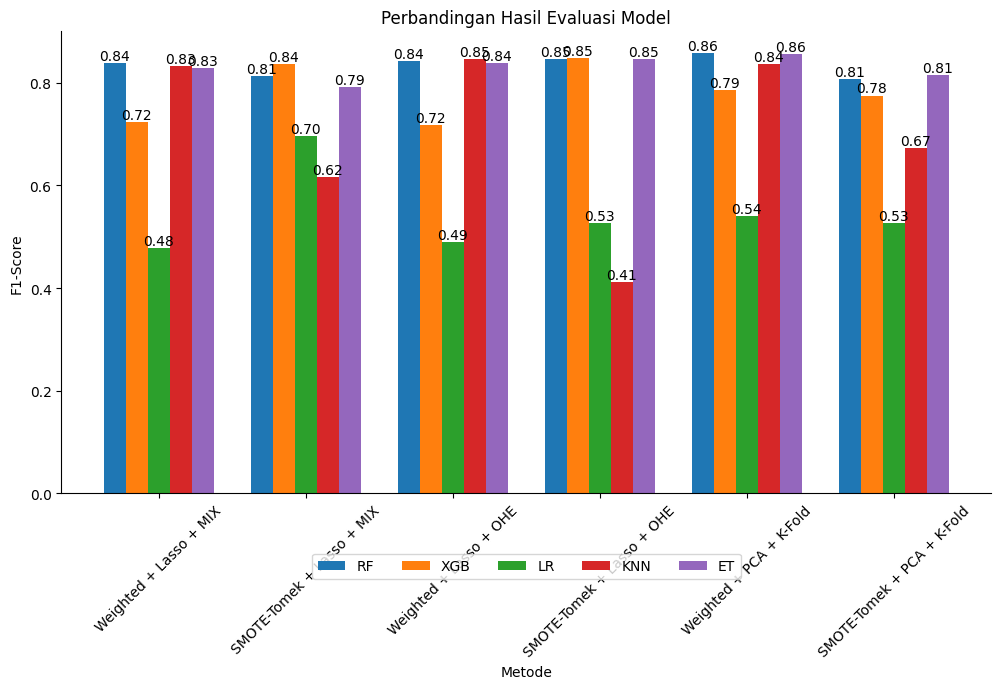

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
models = ['RF', 'XGB', 'LR', 'KNN', 'ET']
x = ['Weighted + Lasso + MIX', 'SMOTE-Tomek + Lasso + MIX', 
     'Weighted + Lasso + OHE', 'SMOTE-Tomek + Lasso + OHE',
     'Weighted + PCA + K-Fold', 'SMOTE-Tomek + PCA + K-Fold']

f1_scores = [
    [rf_f1_weighted, xgb_f1_weighted, lr_f1_weighted, knn_f1_weighted, et_f1_weighted],
    [rf_f1_smote, xgb_f1_smote, lr_f1_smote, knn_f1_smote, et_f1_smote],
    [rf_f1_ohe, xgb_f1_ohe, lr_f1_ohe, knn_f1_ohe, et_f1_ohe],
    [rf_f1_smote_ohe, xgb_f1_smote_ohe, lr_f1_smote_ohe, knn_f1_smote_ohe, et_f1_smote_ohe],
    [rf_f1_weighted_kfold, xgb_f1_weighted_kfold, lr_f1_weighted_kfold, knn_f1_weighted_kfold, et_f1_weighted_kfold],
    [rf_f1_smote_kfold, xgb_f1_smote_kfold, lr_f1_smote_kfold, knn_f1_smote_kfold, et_f1_smote_kfold]
]

fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(x))  
width = 0.15  

for i, (model, scores) in enumerate(zip(models, zip(*f1_scores))):
    bars = ax.bar(x_pos + i * width, scores, width, label=model)
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Metode')
ax.set_ylabel('F1-Score')
ax.set_title('Perbandingan Hasil Evaluasi Model')
ax.set_xticks(x_pos + width * (len(models) / 2 - 0.5))
ax.set_xticklabels(x)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=len(models))

plt.xticks(rotation=45)
sns.despine()
plt.show()

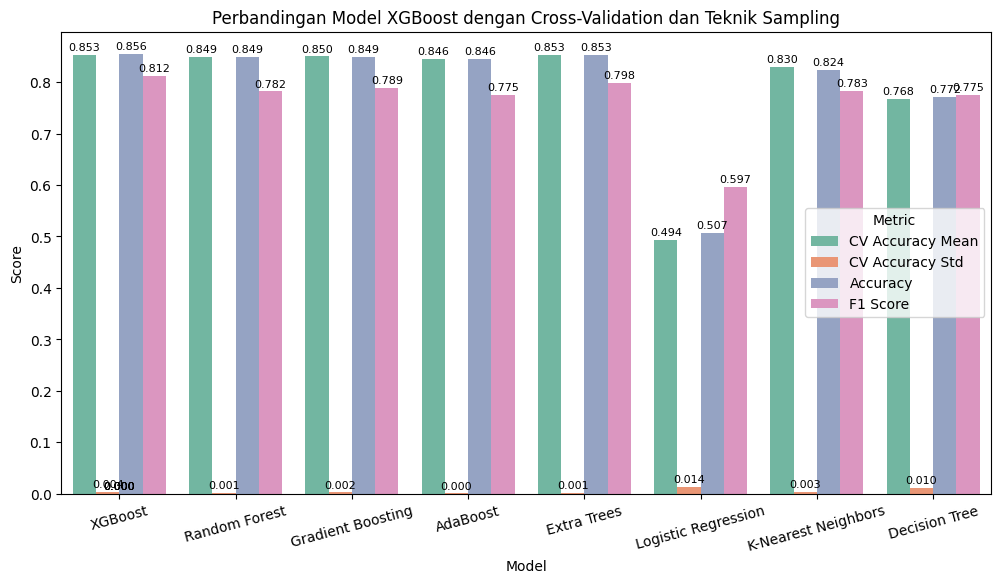

In [ ]:
# plt.figure(figsize=(12, 6))
# df_melted = df_results.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")
# plt.xticks(rotation=15)
# plt.title("Perbandingan Model XGBoost dengan Cross-Validation dan Teknik Sampling")
# plt.ylabel("Score")

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.3f}', 
#                 (p.get_x() + p.get_width() / 2., p.get_height() + 0.005),  
#                 ha='center', va='bottom', fontsize=8, color='black')

# plt.show()


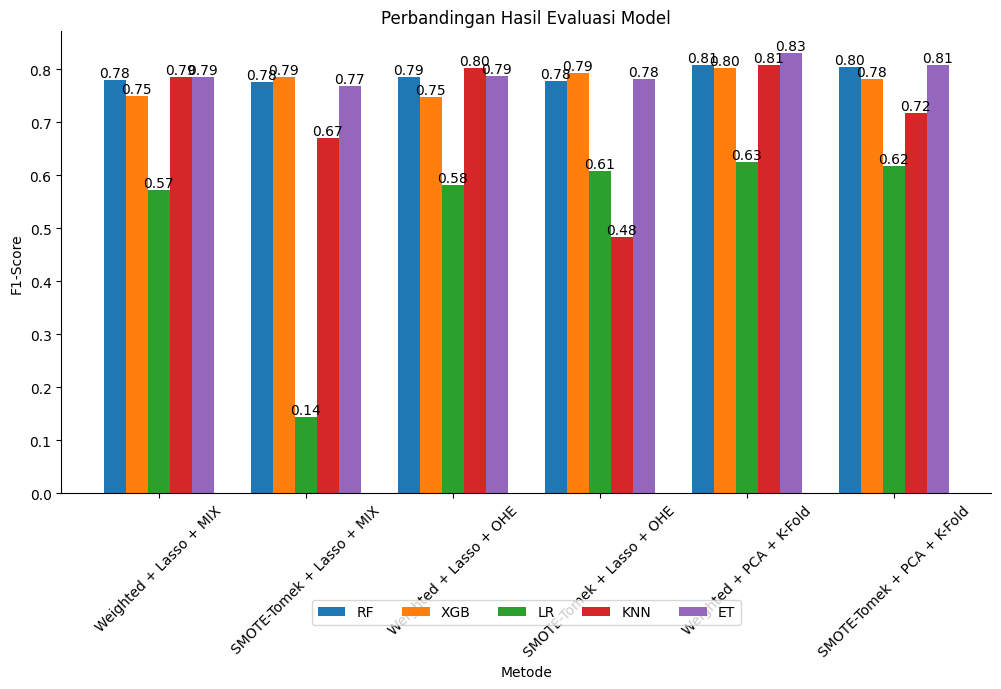

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import os

# Model dan Metode
models = ['RF', 'XGB', 'LR', 'KNN', 'ET']
x = ['Weighted + Lasso + MIX', 'SMOTE-Tomek + Lasso + MIX', 
     'Weighted + Lasso + OHE', 'SMOTE-Tomek + Lasso + OHE',
     'Weighted + PCA + K-Fold', 'SMOTE-Tomek + PCA + K-Fold']

# Data (F1-score)
f1_scores = [
    [rf_f1_weighted, xgb_f1_weighted, lr_f1_weighted, knn_f1_weighted, et_f1_weighted],
    [rf_f1_smote, xgb_f1_smote, lr_f1_smote, knn_f1_smote, et_f1_smote],
    [rf_f1_ohe, xgb_f1_ohe, lr_f1_ohe, knn_f1_ohe, et_f1_ohe],
    [rf_f1_smote_ohe, xgb_f1_smote_ohe, lr_f1_smote_ohe, knn_f1_smote_ohe, et_f1_smote_ohe],
    [rf_f1_weighted_kfold, xgb_f1_weighted_kfold, lr_f1_weighted_kfold, knn_f1_weighted_kfold, et_f1_weighted_kfold],
    [rf_f1_smote_kfold, xgb_f1_smote_kfold, lr_f1_smote_kfold, knn_f1_smote_kfold, et_f1_smote_kfold]
]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(x))  # Label lokasi
width = 0.15  # Lebar bar

for i, (model, scores) in enumerate(zip(models, zip(*f1_scores))):
    bars = ax.bar(x_pos + i * width, scores, width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Metode')
ax.set_ylabel('F1-Score')
ax.set_title('Perbandingan Hasil Evaluasi Model')
ax.set_xticks(x_pos + width * (len(models) / 2 - 0.5))
ax.set_xticklabels(x)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(models))

plt.xticks(rotation=45)
sns.despine()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

def evaluate_model_kfold(model, X_train, y_train, X_test, y_test, model_name, technique, cv=5, plot_cm=True):
    sample_weights = None

    if isinstance(model, XGBClassifier):
        classes = np.unique(y_train)
        class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
        class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
        sample_weights = np.array([class_weight_dict[label] for label in y_train])
    
    elif hasattr(model, "class_weight"):
        model.set_params(class_weight="balanced")
    
    # **Tambahkan ini untuk khusus LogReg**
    if isinstance(model, LogisticRegression):
        model.set_params(max_iter=2000)  # Ubah max_iter sesuai kebutuhan
    
    if sample_weights is not None and isinstance(model, XGBClassifier):
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='micro')
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_micro')
    
    save_dir = f"../model/f1_score_micro/{technique}"
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"{model_name}_{technique}.pkl")
    
    with open(save_path, "wb") as f:
        pickle.dump(model, f)
    
    print(f"Model saved at: {save_path}")
    
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f'Confusion Matrix: {type(model).__name__} ({technique})')
        plt.show()
    
    return f1, np.mean(cv_scores)



Evaluasi Weighted Class + Lasso + MIX...
Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/RF_Weighted_Lasso_MIX.pkl


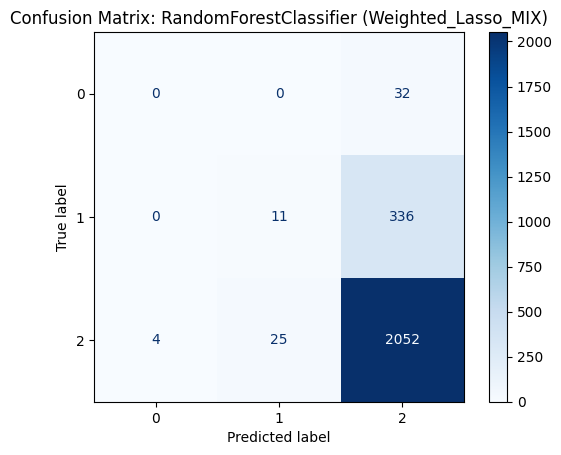

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:56:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:57:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:57:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/XGB_Weighted_Lasso_MIX.pkl


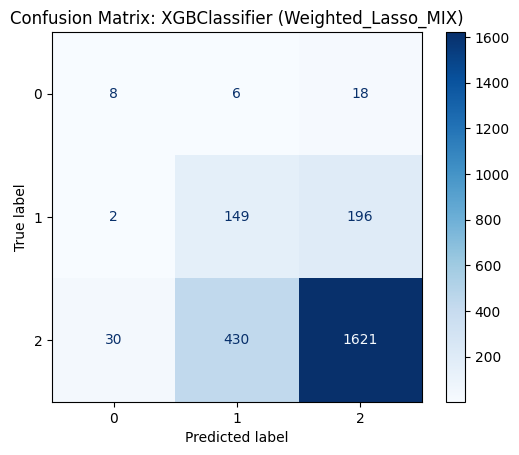

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/LR_Weighted_Lasso_MIX.pkl


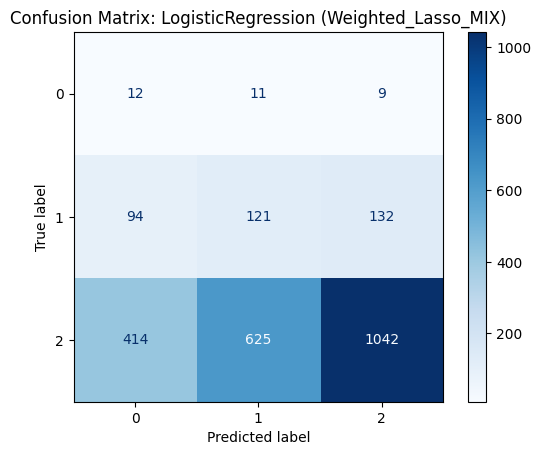

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/KNN_Weighted_Lasso_MIX.pkl


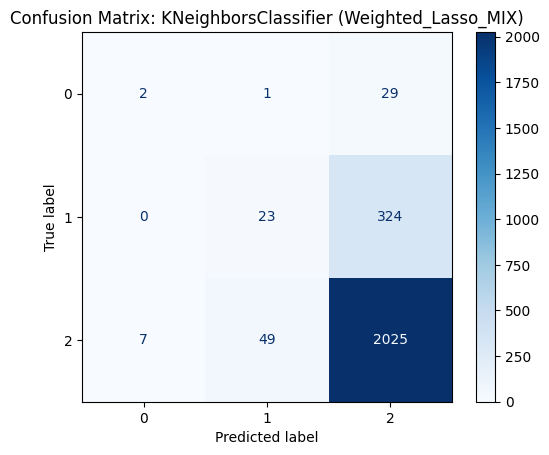

Model saved at: ../model/f1_score_micro/Weighted_Lasso_MIX/ET_Weighted_Lasso_MIX.pkl


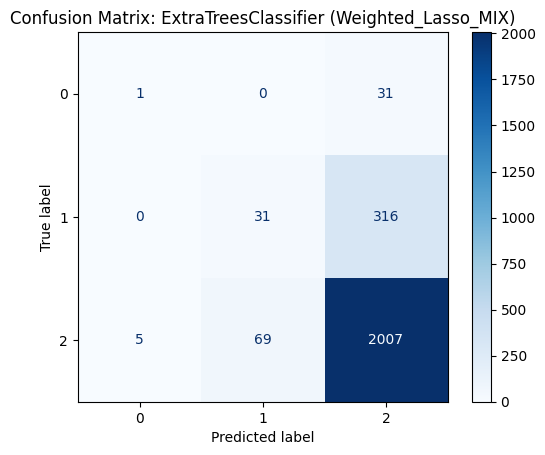


Menggunakan SMOTE-Tomek...

Evaluasi SMOTE-Tomek + Lasso + MIX...
Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/RF_SMOTE_Lasso_MIX.pkl


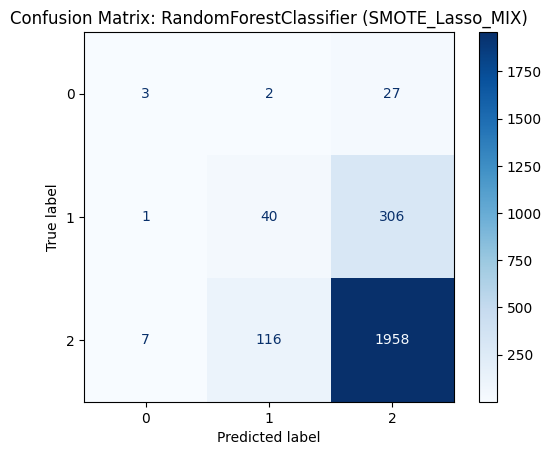

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:00:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:02:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:02:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/XGB_SMOTE_Lasso_MIX.pkl


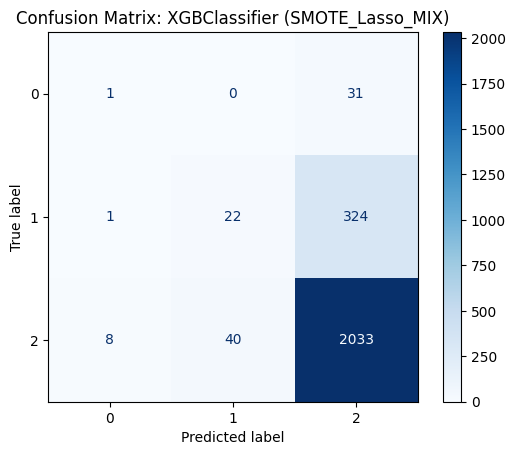

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/LR_SMOTE_Lasso_MIX.pkl


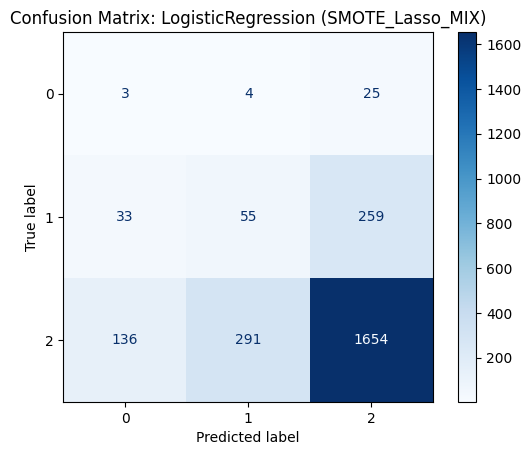

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/KNN_SMOTE_Lasso_MIX.pkl


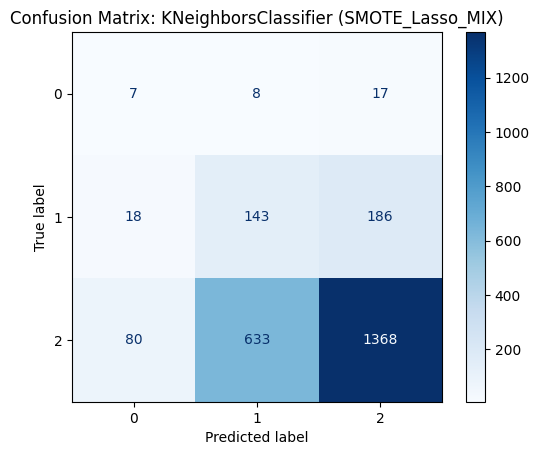

Model saved at: ../model/f1_score_micro/SMOTE_Lasso_MIX/ET_SMOTE_Lasso_MIX.pkl


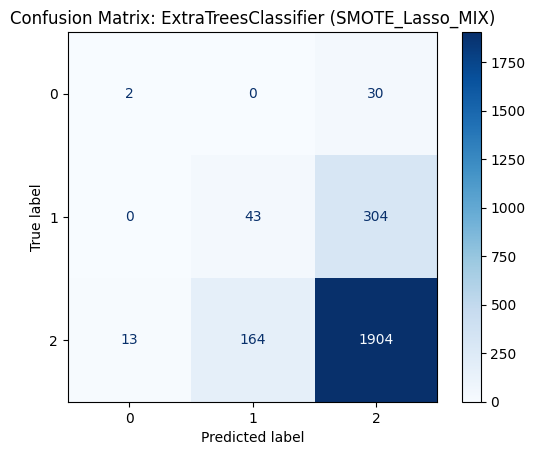


Weighted Class + Lasso + MIX:
RF:  F1 = 0.8386, CV = 0.8443
XGB: F1 = 0.7228, CV = 0.8468
LR:  F1 = 0.4776, CV = 0.4670
KNN: F1 = 0.8333, CV = 0.8320
ET:  F1 = 0.8289, CV = 0.8325

SMOTE-Tomek + Lasso + MIX:
RF:  F1 = 0.8134, CV = 0.9229
XGB: F1 = 0.8358, CV = 0.9207
LR:  F1 = 0.6959, CV = 0.6582
KNN: F1 = 0.6171, CV = 0.8310
ET:  F1 = 0.7923, CV = 0.9163


In [ ]:

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_mix), y=y_train_mix)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

neg_count = np.sum(y_train_mix == 0)
pos_count = np.sum(y_train_mix == 1)
scale_pos_weight = neg_count / pos_count

rf_model_all_mix.set_params(class_weight=class_weight_dict)
lr_model_all_mix.set_params(class_weight=class_weight_dict)
et_model_all_mix.set_params(class_weight=class_weight_dict)

lasso_mix = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model_lasso_mix = SelectFromModel(lasso_mix, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model_lasso_mix.get_support()].tolist()
X_train_lasso_mix = X_train_mix[selected_features_lasso_mix]
X_test_lasso_mix = X_test_mix[selected_features_lasso_mix]

xgb_model_all_mix = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

print("\nEvaluasi Weighted Class + Lasso + MIX...")
rf_f1_weighted, rf_cv_weighted = evaluate_model_kfold(rf_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "RF", "Weighted_Lasso_MIX")
xgb_f1_weighted, xgb_cv_weighted = evaluate_model_kfold(xgb_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "XGB", "Weighted_Lasso_MIX")
lr_f1_weighted, lr_cv_weighted = evaluate_model_kfold(lr_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "LR", "Weighted_Lasso_MIX")
knn_f1_weighted, knn_cv_weighted = evaluate_model_kfold(knn_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "KNN", "Weighted_Lasso_MIX")
et_f1_weighted, et_cv_weighted = evaluate_model_kfold(et_model_all_mix, X_train_lasso_mix, y_train_mix, X_test_lasso_mix, y_test_mix, "ET", "Weighted_Lasso_MIX")

print("\nMenggunakan SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_mix, y_train_mix)

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_mix.columns)
y_train_smote = pd.Series(y_train_smote)

X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

lasso_smote_mix = LassoCV(cv=5, random_state=42).fit(X_train_smote, y_train_smote)
model_lasso_smote_mix = SelectFromModel(lasso_smote_mix, prefit=True)
selected_features_smote_mix = X_train_smote.columns[model_lasso_smote_mix.get_support()].tolist()
X_train_smote_lasso_mix = X_train_smote[selected_features_smote_mix]
X_test_smote_lasso_mix = X_test_mix[selected_features_smote_mix]

print("\nEvaluasi SMOTE-Tomek + Lasso + MIX...")
rf_f1_smote, rf_cv_smote = evaluate_model_kfold(rf_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "RF", "SMOTE_Lasso_MIX")
xgb_f1_smote, xgb_cv_smote = evaluate_model_kfold(xgb_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "XGB", "SMOTE_Lasso_MIX")
lr_f1_smote, lr_cv_smote = evaluate_model_kfold(lr_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "LR", "SMOTE_Lasso_MIX")
knn_f1_smote, knn_cv_smote = evaluate_model_kfold(knn_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "KNN", "SMOTE_Lasso_MIX")
et_f1_smote, et_cv_smote = evaluate_model_kfold(et_model_all_mix, X_train_smote_lasso_mix, y_train_smote, X_test_smote_lasso_mix, y_test_mix, "ET", "SMOTE_Lasso_MIX")

print("\nWeighted Class + Lasso + MIX:")
print(f"RF:  F1 = {rf_f1_weighted:.4f}, CV = {rf_cv_weighted:.4f}")
print(f"XGB: F1 = {xgb_f1_weighted:.4f}, CV = {xgb_cv_weighted:.4f}")
print(f"LR:  F1 = {lr_f1_weighted:.4f}, CV = {lr_cv_weighted:.4f}")
print(f"KNN: F1 = {knn_f1_weighted:.4f}, CV = {knn_cv_weighted:.4f}")
print(f"ET:  F1 = {et_f1_weighted:.4f}, CV = {et_cv_weighted:.4f}")

print("\nSMOTE-Tomek + Lasso + MIX:")
print(f"RF:  F1 = {rf_f1_smote:.4f}, CV = {rf_cv_smote:.4f}")
print(f"XGB: F1 = {xgb_f1_smote:.4f}, CV = {xgb_cv_smote:.4f}")
print(f"LR:  F1 = {lr_f1_smote:.4f}, CV = {lr_cv_smote:.4f}")
print(f"KNN: F1 = {knn_f1_smote:.4f}, CV = {knn_cv_smote:.4f}")
print(f"ET:  F1 = {et_f1_smote:.4f}, CV = {et_cv_smote:.4f}")



Evaluasi Weighted Class + Lasso + OHE...
Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/RandomForest_WeightedClass_Lasso_OHE.pkl


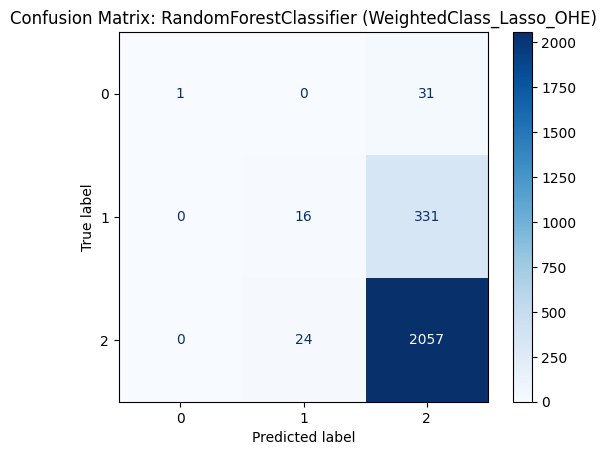

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:11:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:12:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" 

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/XGBoost_WeightedClass_Lasso_OHE.pkl


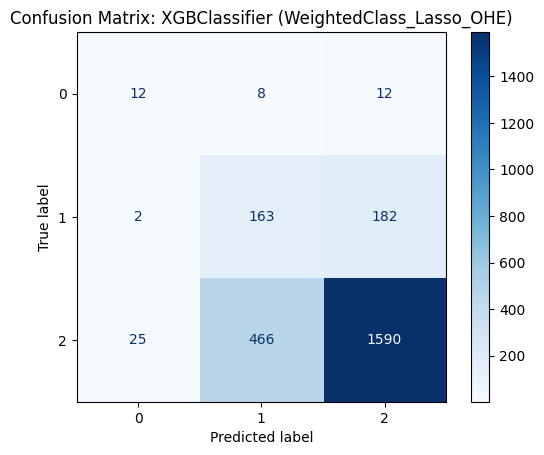

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/LogisticRegression_WeightedClass_Lasso_OHE.pkl


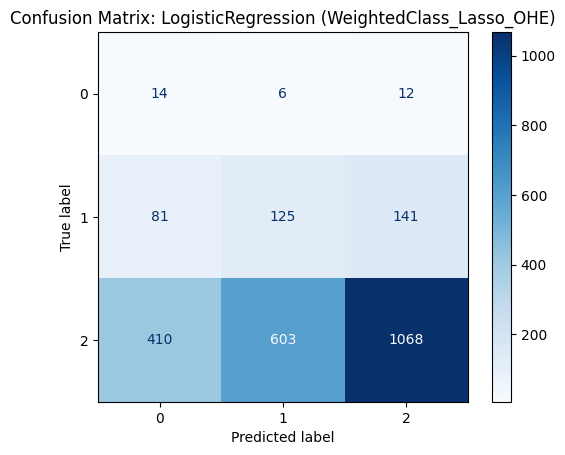

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/KNN_WeightedClass_Lasso_OHE.pkl


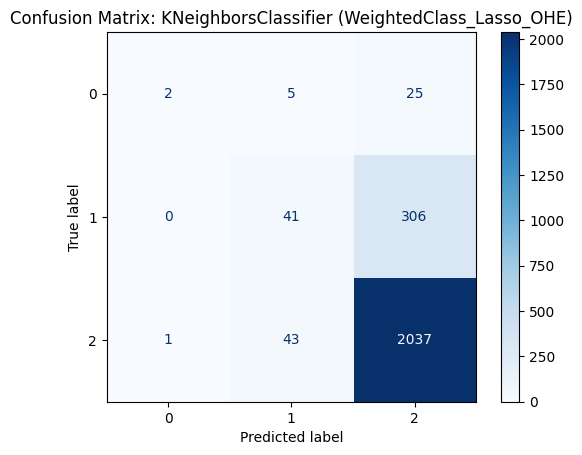

Model saved at: ../model/f1_score_micro/WeightedClass_Lasso_OHE/ExtraTrees_WeightedClass_Lasso_OHE.pkl


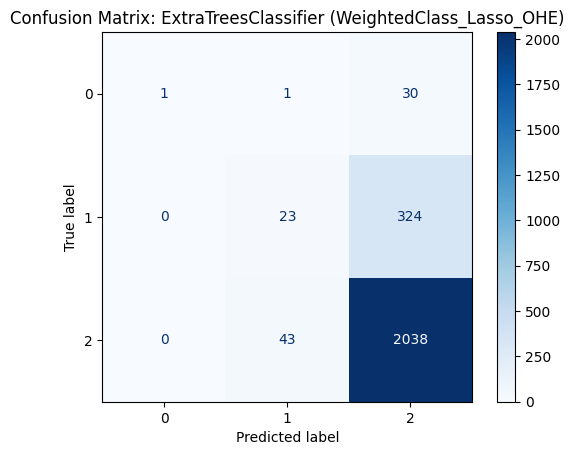

ValueError: Found input variables with inconsistent numbers of samples: [24959, 24511]

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_mix), y=y_train_mix)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

neg_count = np.sum(y_train_mix == 0)
pos_count = np.sum(y_train_mix == 1)
scale_pos_weight = neg_count / pos_count

rf_model_all_ohe.set_params(class_weight=class_weight_dict)
lr_model_all_ohe.set_params(class_weight=class_weight_dict)
et_model_all_ohe.set_params(class_weight=class_weight_dict)
xgb_model_all_ohe.set_params(scale_pos_weight=scale_pos_weight)

lasso_ohe = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_mix)
model_lasso_ohe = SelectFromModel(lasso_ohe, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model_lasso_ohe.get_support()].tolist()
X_train_lasso_ohe = X_train_ohe[selected_features_lasso_ohe]
X_test_lasso_ohe = X_test_ohe[selected_features_lasso_ohe]


print("\nEvaluasi Weighted Class + Lasso + OHE...")
rf_f1_ohe, rf_cv_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "RandomForest", "WeightedClass_Lasso_OHE")
xgb_f1_ohe, xgb_cv_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "XGBoost", "WeightedClass_Lasso_OHE")
lr_f1_ohe, lr_cv_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "LogisticRegression", "WeightedClass_Lasso_OHE")
knn_f1_ohe, knn_cv_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "KNN", "WeightedClass_Lasso_OHE")
et_f1_ohe, et_cv_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test, "ExtraTrees", "WeightedClass_Lasso_OHE")
# mote_ohe, et_cv_smote_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "ExtraTrees", "SMOTE_Tomek_Lasso_OHE")


print("\nMenggunakan SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_ohe, y_train_mix)

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_ohe.columns)
y_train_smote = pd.Series(y_train_smote)

X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

lasso_smote_ohe = LassoCV(cv=5, random_state=42).fit(X_train_smote, y_train_smote)
model_lasso_smote_ohe = SelectFromModel(lasso_smote_ohe, prefit=True)
selected_features_smote_ohe = X_train_smote.columns[model_lasso_smote_ohe.get_support()].tolist()
X_train_smote_lasso_ohe = X_train_smote[selected_features_smote_ohe]
X_test_smote_lasso_ohe = X_test_ohe[selected_features_smote_ohe]

print("\nEvaluasi SMOTE-Tomek + Lasso + OHE...")
rf_f1_smote_ohe, rf_cv_smote_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "RandomForest", "SMOTE_Tomek_Lasso_OHE")
xgb_f1_smote_ohe, xgb_cv_smote_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "XGBoost", "SMOTE_Tomek_Lasso_OHE")
lr_f1_smote_ohe, lr_cv_smote_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "LogisticRegression", "SMOTE_Tomek_Lasso_OHE")
knn_f1_smote_ohe, knn_cv_smote_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "KNN", "SMOTE_Tomek_Lasso_OHE")
et_f1_smote_ohe, et_cv_smote_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_smote_lasso_ohe, y_train_smote, X_test_smote_lasso_ohe, y_test, "ExtraTrees", "SMOTE_Tomek_Lasso_OHE")

print("\n===== Perbandingan Hasil Evaluasi =====")
print("\nWeighted Class + Lasso + OHE:")
print(f"RF:  F1 = {rf_f1_ohe:.4f}, CV = {rf_cv_ohe:.4f}")
print(f"XGB: F1 = {xgb_f1_ohe:.4f}, CV = {xgb_cv_ohe:.4f}")
print(f"LR:  F1 = {lr_f1_ohe:.4f}, CV = {lr_cv_ohe:.4f}")
print(f"KNN: F1 = {knn_f1_ohe:.4f}, CV = {knn_cv_ohe:.4f}")
print(f"ET:  F1 = {et_f1_ohe:.4f}, CV = {et_cv_ohe:.4f}")

print("\nSMOTE-Tomek + Lasso + OHE:")
print(f"RF:  F1 = {rf_f1_smote_ohe:.4f}, CV = {rf_cv_smote_ohe:.4f}")
print(f"XGB: F1 = {xgb_f1_smote_ohe:.4f}, CV = {xgb_cv_smote_ohe:.4f}")
print(f"LR:  F1 = {lr_f1_smote_ohe:.4f}, CV = {lr_cv_smote_ohe:.4f}")
print(f"KNN: F1 = {knn_f1_smote_ohe:.4f}, CV = {knn_cv_smote_ohe:.4f}")
print(f"ET:  F1 = {et_f1_smote_ohe:.4f}, CV = {et_cv_smote_ohe:.4f}")


In [ ]:


class_weights = compute_class_weight('balanced', classes=np.unique(y_train_kfold), y=y_train_kfold)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

neg_count = np.sum(y_train_kfold == 0)
pos_count = np.sum(y_train_kfold == 1)
scale_pos_weight = neg_count / pos_count

rf_model_all_kfold.set_params(class_weight=class_weight_dict)
lr_model_all_kfold.set_params(class_weight=class_weight_dict)
et_model_all_kfold.set_params(class_weight=class_weight_dict)
xgb_model_all_kfold.set_params(scale_pos_weight=scale_pos_weight)

pca_weighted = PCA(n_components=10)
X_train_pca_weighted = pca_weighted.fit_transform(X_train_kfold)
X_test_pca_weighted = pca_weighted.transform(X_test_kfold)


print("\nEvaluasi Weighted Class + PCA + K-Fold...")
rf_f1_weighted_kfold, rf_cv_weighted_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "RandomForest", "WeightedClass_PCA_KFold")
xgb_f1_weighted_kfold, xgb_cv_weighted_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "XGBoost", "WeightedClass_PCA_KFold")
lr_f1_weighted_kfold, lr_cv_weighted_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "LogisticRegression", "WeightedClass_PCA_KFold")
knn_f1_weighted_kfold, knn_cv_weighted_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "KNN", "WeightedClass_PCA_KFold")
et_f1_weighted_kfold, et_cv_weighted_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_pca_weighted, y_train_kfold, X_test_pca_weighted, y_test_kfold, "ExtraTrees", "WeightedClass_PCA_KFold")

print("\nMenggunakan SMOTE-Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_kfold, y_train_kfold)

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_kfold.columns)
y_train_smote = pd.Series(y_train_smote)

X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

pca_smote = PCA(n_components=10)
X_train_smote_pca = pca_smote.fit_transform(X_train_smote)
X_test_smote_pca = pca_smote.transform(X_test_kfold)

print("\nEvaluasi SMOTE-Tomek + PCA + K-Fold...")
rf_f1_smote_kfold, rf_cv_smote_kfold = evaluate_model_kfold(rf_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "RandomForest", "SMOTE_Tomek_PCA_KFold")
xgb_f1_smote_kfold, xgb_cv_smote_kfold = evaluate_model_kfold(xgb_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "XGBoost", "SMOTE_Tomek_PCA_KFold")
lr_f1_smote_kfold, lr_cv_smote_kfold = evaluate_model_kfold(lr_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "LogisticRegression", "SMOTE_Tomek_PCA_KFold")
knn_f1_smote_kfold, knn_cv_smote_kfold = evaluate_model_kfold(knn_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "KNN", "SMOTE_Tomek_PCA_KFold")
et_f1_smote_kfold, et_cv_smote_kfold = evaluate_model_kfold(et_model_all_kfold, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold, "ExtraTrees", "SMOTE_Tomek_PCA_KFold")

print("\n===== Perbandingan Hasil Evaluasi =====")
print("\nWeighted Class + PCA + K-Fold:")
print(f"RF:  F1 = {rf_f1_weighted_kfold:.4f}, CV = {rf_cv_weighted_kfold:.4f}")
print(f"XGB: F1 = {xgb_f1_weighted_kfold:.4f}, CV = {xgb_cv_weighted_kfold:.4f}")
print(f"LR:  F1 = {lr_f1_weighted_kfold:.4f}, CV = {lr_cv_weighted_kfold:.4f}")
print(f"KNN: F1 = {knn_f1_weighted_kfold:.4f}, CV = {knn_cv_weighted_kfold:.4f}")
print(f"ET:  F1 = {et_f1_weighted_kfold:.4f}, CV = {et_cv_weighted_kfold:.4f}")

print("\nSMOTE-Tomek + PCA + K-Fold:")
print(f"RF:  F1 = {rf_f1_smote_kfold:.4f}, CV = {rf_cv_smote_kfold:.4f}")
print(f"XGB: F1 = {xgb_f1_smote_kfold:.4f}, CV = {xgb_cv_smote_kfold:.4f}")
print(f"LR:  F1 = {lr_f1_smote_kfold:.4f}, CV = {lr_cv_smote_kfold:.4f}")
print(f"KNN: F1 = {knn_f1_smote_kfold:.4f}, CV = {knn_cv_smote_kfold:.4f}")
print(f"ET:  F1 = {et_f1_smote_kfold:.4f}, CV = {et_cv_smote_kfold:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import os

# Model dan Metode
models = ['RF', 'XGB', 'LR', 'KNN', 'ET']
x = ['Weighted + Lasso + MIX', 'SMOTE-Tomek + Lasso + MIX', 
     'Weighted + Lasso + OHE', 'SMOTE-Tomek + Lasso + OHE',
     'Weighted + PCA + K-Fold', 'SMOTE-Tomek + PCA + K-Fold']

# Data (F1-score)
f1_scores = [
    [rf_f1_weighted, xgb_f1_weighted, lr_f1_weighted, knn_f1_weighted, et_f1_weighted],
    [rf_f1_smote, xgb_f1_smote, lr_f1_smote, knn_f1_smote, et_f1_smote],
    [rf_f1_ohe, xgb_f1_ohe, lr_f1_ohe, knn_f1_ohe, et_f1_ohe],
    [rf_f1_smote_ohe, xgb_f1_smote_ohe, lr_f1_smote_ohe, knn_f1_smote_ohe, et_f1_smote_ohe],
    [rf_f1_weighted_kfold, xgb_f1_weighted_kfold, lr_f1_weighted_kfold, knn_f1_weighted_kfold, et_f1_weighted_kfold],
    [rf_f1_smote_kfold, xgb_f1_smote_kfold, lr_f1_smote_kfold, knn_f1_smote_kfold, et_f1_smote_kfold]
]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(x))  # Label lokasi
width = 0.15  # Lebar bar

for i, (model, scores) in enumerate(zip(models, zip(*f1_scores))):
    bars = ax.bar(x_pos + i * width, scores, width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Metode')
ax.set_ylabel('F1-Score')
ax.set_title('Perbandingan Hasil Evaluasi Model')
ax.set_xticks(x_pos + width * (len(models) / 2 - 0.5))
ax.set_xticklabels(x)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(models))

plt.xticks(rotation=45)
sns.despine()
plt.show()

In [ ]:
evaluation_results

Model Name                Technique  F1 Score Weighted  \
0                   RF       Weighted_Lasso_MIX           0.779424   
1                  XGB       Weighted_Lasso_MIX           0.748330   
2                   LR       Weighted_Lasso_MIX           0.571599   
3                  KNN       Weighted_Lasso_MIX           0.785060   
4                   ET       Weighted_Lasso_MIX           0.785883   
5                   RF          SMOTE_Lasso_MIX           0.781865   
6                  XGB          SMOTE_Lasso_MIX           0.785446   
7                   LR          SMOTE_Lasso_MIX           0.718598   
8                  KNN          SMOTE_Lasso_MIX           0.670755   
9                   ET          SMOTE_Lasso_MIX           0.768853   
10        RandomForest  WeightedClass_Lasso_OHE           0.785825   
11             XGBoost  WeightedClass_Lasso_OHE           0.747138   
12  LogisticRegression  WeightedClass_Lasso_OHE           0.580519   
13                 KNN  WeightedClass_Lasso_OHE           0.802648   
14          ExtraTrees  WeightedClass_Lasso_OHE           0.787316   
15        RandomForest    SMOTE_Tomek_Lasso_OHE           0.776670   
16             XGBoost    SMOTE_Tomek_Lasso_OHE           0.791984   
17  LogisticRegression    SMOTE_Tomek_Lasso_OHE           0.608617   
18                 KNN    SMOTE_Tomek_Lasso_OHE           0.483548   
19          ExtraTrees    SMOTE_Tomek_Lasso_OHE           0.780506   
20        RandomForest  WeightedClass_PCA_KFold           0.812140   
21             XGBoost  WeightedClass_PCA_KFold           0.789157   
22  LogisticRegression  WeightedClass_PCA_KFold           0.625214   
23                 KNN  WeightedClass_PCA_KFold           0.807257   
24          ExtraTrees  WeightedClass_PCA_KFold           0.828360   
25        RandomForest    SMOTE_Tomek_PCA_KFold           0.803534   
26             XGBoost    SMOTE_Tomek_PCA_KFold           0.779741   
27  LogisticRegression    SMOTE_Tomek_PCA_KFold           0.616698   
28                 KNN    SMOTE_Tomek_PCA_KFold           0.717174   
29          ExtraTrees    SMOTE_Tomek_PCA_KFold           0.807319   

    F1 Score Micro  
0         0.838618  
1         0.722764  
2         0.477642  
3         0.833333  
4         0.828862  
5         0.813415  
6         0.835772  
7         0.695935  
8         0.617073  
9         0.792276  
10        0.843089  
11        0.717480  
12        0.490650  
13        0.845528  
14        0.838211  
15        0.845528  
16        0.848374  
17        0.527642  
18        0.411789  
19        0.847154  
20        0.857317  
21        0.785772  
22        0.540244  
23        0.836992  
24        0.856098  
25        0.807724  
26        0.775203  
27        0.527642  
28        0.672358  
29        0.814634

In [299]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Pisahkan data (pastikan X_mix dan y_mix sudah tersedia)
X_train_mix, X_test_mix, y_train_mix, y_test_mix = train_test_split(X_mix, y_mix, test_size=0.2, random_state=42)

# Seleksi fitur menggunakan LassoCV
lasso_mix = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model_lasso_mix = SelectFromModel(lasso_mix, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model_lasso_mix.get_support()].tolist()

# Gunakan hanya fitur yang terpilih
X_train_lasso_mix = X_train_mix[selected_features_lasso_mix]
X_test_lasso_mix = X_test_mix[selected_features_lasso_mix]

# Hitung bobot kelas untuk menangani ketidakseimbangan data
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_mix), y=y_train_mix)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train_mix), class_weights)}

# Model Logistic Regression dengan bobot kelas
logreg = LogisticRegression(class_weight=class_weight_dict, random_state=42, max_iter=500)
logreg.fit(X_train_lasso_mix, y_train_mix)

# Prediksi
y_pred = logreg.predict(X_test_lasso_mix)

# Evaluasi model
conf_matrix = confusion_matrix(y_test_mix, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test_mix, y_pred))

# Simpan model ke file .pkl
with open("logistic_lasso_weighted.pkl", "wb") as model_file:
    pickle.dump(logreg, model_file)

print("Model berhasil disimpan sebagai logistic_lasso_weighted.pkl")


Confusion Matrix:
 [[  21    7    7]
 [  94  144  113]
 [ 426  632 1016]]

Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.60      0.07        35
           1       0.18      0.41      0.25       351
           2       0.89      0.49      0.63      2074

    accuracy                           0.48      2460
   macro avg       0.37      0.50      0.32      2460
weighted avg       0.78      0.48      0.57      2460

Model berhasil disimpan sebagai logistic_lasso_weighted.pkl


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[I 2025-03-07 21:55:21,000] A new study created in memory with name: no-name-80d30356-21d0-4363-935c-54b54b6a99c1
/tmp/ipykernel_10539/553224587.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 5e-2),
/tmp/ipykernel_10539/553224587.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipykernel_10539/553224587.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_byt

Best hyperparameters: {'max_depth': 8, 'learning_rate': 0.04908419649186043, 'n_estimators': 126, 'subsample': 0.9014641890063911, 'colsample_bytree': 0.9929522593708556, 'gamma': 0.001191697005720231, 'lambda': 0.0010420535775865969}
F1-Score (Weighted): 0.8054


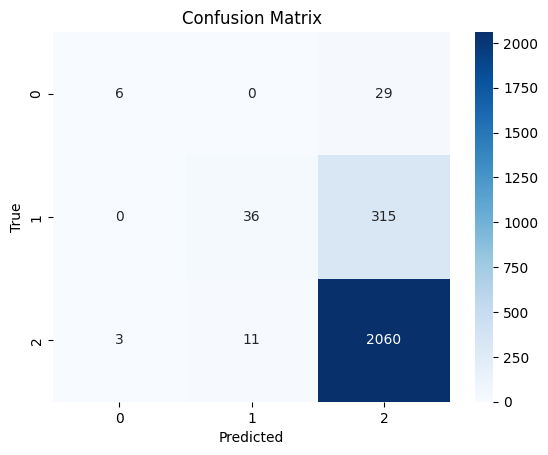

Log Loss: 0.4218
F1-Score (Weighted) dari model yang dimuat: 0.8054


In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LassoCV
    from sklearn.metrics import confusion_matrix, f1_score, log_loss
    from sklearn.model_selection import cross_val_score
    import xgboost as xgb
    import optuna
    from optuna.samplers import TPESampler
    # from optuna.integration import XGBoostPruningCallback
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pickle

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

    # Lasso untuk seleksi fitur
    lasso = LassoCV(cv=3, random_state=42).fit(X_train, y_train)
    selected_features = X_train.columns[lasso.coef_ != 0]
    X_train_selected, X_test_selected = X_train[selected_features], X_test[selected_features]

    # Fungsi Optuna
    def objective(trial):
        param = {
            'objective': 'multi:softmax',
            'eval_metric': 'mlogloss',
            'num_class': len(np.unique(y_train)),
            'max_depth': trial.suggest_int('max_depth', 3, 8),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 5e-2),
            'n_estimators': trial.suggest_int('n_estimators', 50, 150),
            'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
            'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e-1),
            'lambda': trial.suggest_loguniform('lambda', 1e-3, 1e-1),
            'n_jobs': -1
        }

        model = xgb.XGBClassifier(**param, random_state=42)
        
        score = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
        return score.mean()

    # Optimasi Optuna
    study = optuna.create_study(direction='maximize', sampler=TPESampler())
    study.optimize(objective, n_trials=100)  # Maks 10 menit

    best_params = study.best_params
    print("Best hyperparameters:", best_params)

    # Training model akhir dengan early stopping
    xgb_model = xgb.XGBClassifier(**best_params, random_state=42, n_jobs=-1)
    xgb_model.fit(
        X_train_selected, y_train,
        eval_set=[(X_test_selected, y_test)],
        # early_stopping_rounds=10,
        verbose=False
    )

    # Evaluasi model
    y_pred = xgb_model.predict(X_test_selected)
    print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Log Loss
    y_pred_prob = xgb_model.predict_proba(X_test_selected)
    print(f"Log Loss: {log_loss(y_test, y_pred_prob):.4f}")

    # Simpan model
    with open('xgb_model_best.pkl', 'wb') as f:
        pickle.dump(xgb_model, f)

    # Muat kembali dan tes
    with open('xgb_model_best.pkl', 'rb') as f:
        loaded_model = pickle.load(f)

    y_pred_loaded = loaded_model.predict(X_test_selected)
    print(f"F1-Score (Weighted) dari model yang dimuat: {f1_score(y_test, y_pred_loaded, average='weighted'):.4f}")


[I 2025-03-07 22:05:46,222] A new study created in memory with name: no-name-e802dd63-0576-422e-86bf-d346e39310ce
[I 2025-03-07 22:05:53,271] Trial 0 finished with value: 0.7762316851074722 and parameters: {'n_neighbors': 57, 'weights': 'distance', 'metric': 'minkowski', 'p': 2, 'leaf_size': 43, 'algorithm': 'ball_tree'}. Best is trial 0 with value: 0.7762316851074722.
[I 2025-03-07 22:05:57,132] Trial 1 finished with value: 0.7762316851074722 and parameters: {'n_neighbors': 37, 'weights': 'distance', 'metric': 'minkowski', 'p': 1, 'leaf_size': 50, 'algorithm': 'brute'}. Best is trial 0 with value: 0.7762316851074722.
[I 2025-03-07 22:06:01,323] Trial 2 finished with value: 0.7762316851074722 and parameters: {'n_neighbors': 76, 'weights': 'distance', 'metric': 'manhattan', 'p': 4, 'leaf_size': 44, 'algorithm': 'auto'}. Best is trial 0 with value: 0.7762316851074722.
[I 2025-03-07 22:06:05,209] Trial 3 finished with value: 0.7762316851074722 and parameters: {'n_neighbors': 44, 'weights'

Best hyperparameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'p': 2, 'leaf_size': 23, 'algorithm': 'kd_tree'}
F1-Score (Weighted): 0.7972


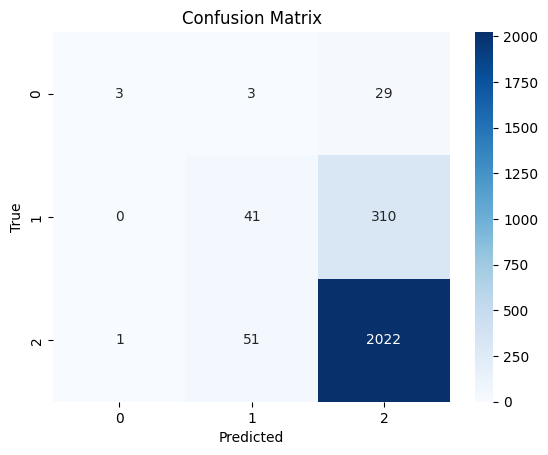

F1-Score (Weighted) dari model yang dimuat: 0.7972


In [329]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, log_loss
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

# Lasso untuk seleksi fitur
lasso = LassoCV(cv=3, random_state=42).fit(X_train, y_train)
selected_features = X_train.columns[lasso.coef_ != 0]
X_train_selected, X_test_selected = X_train[selected_features], X_test[selected_features]

# Fungsi Optuna
def objective(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 100),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski', 'chebyshev']),
        'p': trial.suggest_int('p', 1, 5),  # Pangkat untuk Minkowski
        'leaf_size': trial.suggest_int('leaf_size', 10, 50),  # Ukuran leaf untuk KD-Tree & Ball-Tree
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])  
    }

    model = KNeighborsClassifier(**param, n_jobs=-1)
    
    score = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    return score.mean()

# Optimasi Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=600)  # Maks 10 menit

best_params = study.best_params
print("Best hyperparameters:", best_params)

# Training model akhir
knn_model = KNeighborsClassifier(**best_params, n_jobs=-1)
knn_model.fit(X_train_selected, y_train)

# Evaluasi model
y_pred = knn_model.predict(X_test_selected)
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Simpan model
with open('knn_model_best.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

# Muat kembali dan tes
with open('knn_model_best.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred_loaded = loaded_model.predict(X_test_selected)
print(f"F1-Score (Weighted) dari model yang dimuat: {f1_score(y_test, y_pred_loaded, average='weighted'):.4f}")


In [317]:
import optuna
import numpy as np
import pandas as pd
import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from imblearn.over_sampling import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  
    cm = confusion_matrix(y_test, y_pred)
    return f1, cm

# Random Forest Optimization
def objective_rf(trial, X_train, y_train, X_test, y_test):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 10, 100, step=10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20, step=2)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])  
  
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                      min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf,
                                      max_features=max_features, random_state=42)
    
    f1, cm = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
    return f1

# Extra Trees Optimization
def objective_et(trial, X_train, y_train, X_test, y_test):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 10, 100, step=10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20, step=2)
    
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None, 0.5, 0.75])

    et_model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    max_features=max_features, random_state=42)

    f1, cm = evaluate_model(et_model, X_train, y_train, X_test, y_test)
    return f1

# PCA + SMOTE Preprocessing
def pca_smote(X_train, y_train):
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    pca = PCA(n_components=10)
    X_resampled_pca = pca.fit_transform(X_resampled)
    return X_resampled_pca, y_resampled, pca

X_train_smote_pca, y_train_smote, pca_model = pca_smote(X_train_kfold, y_train_kfold)

X_test_smote_pca = pca_model.transform(X_test_kfold)

# 2. Extra Trees Study
study_et = optuna.create_study(direction='maximize')
study_et.optimize(lambda trial: objective_et(trial, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold), n_trials=50)

print("Best Hyperparameters for Extra Trees:")
print(study_et.best_params)
print("Best F1 Score for Extra Trees:", study_et.best_value)

best_et = ExtraTreesClassifier(**study_et.best_params, random_state=42)
best_et.fit(X_train_smote_pca, y_train_smote)
et_f1, et_cm = evaluate_model(best_et, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold)

print("\nExtra Trees Evaluation:")
print(f"F1-Score: {et_f1:.4f}")
print(f"Confusion Matrix:\n{et_cm}")

joblib.dump(best_et, 'best_et_model.pkl')

print("\nExtra Trees model has been saved as 'best_et_model.pkl'")


[I 2025-03-07 20:28:41,153] A new study created in memory with name: no-name-c6aea4c1-3f40-4833-aa79-6a5c40063772
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 19].
  warnings.warn(
[I 2025-03-07 20:28:46,501] Trial 0 finished with value: 0.810860542927763 and parameters: {'n_estimators': 50, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.810860542927763.
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 19].
  warnings.warn(
[I 2025-03-07 20:28:59,897] Trial 1 finished with value: 0.7672630620773827 and parameters: {'n_estimators': 300, 'max_depth'

Best Hyperparameters for Extra Trees:
{'n_estimators': 100, 'max_depth': 90, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best F1 Score for Extra Trees: 0.8191400041748967

Extra Trees Evaluation:
F1-Score: 0.8191
Confusion Matrix:
[[   9    5   18]
 [   4  116  227]
 [   9  162 1910]]

Extra Trees model has been saved as 'best_et_model.pkl'


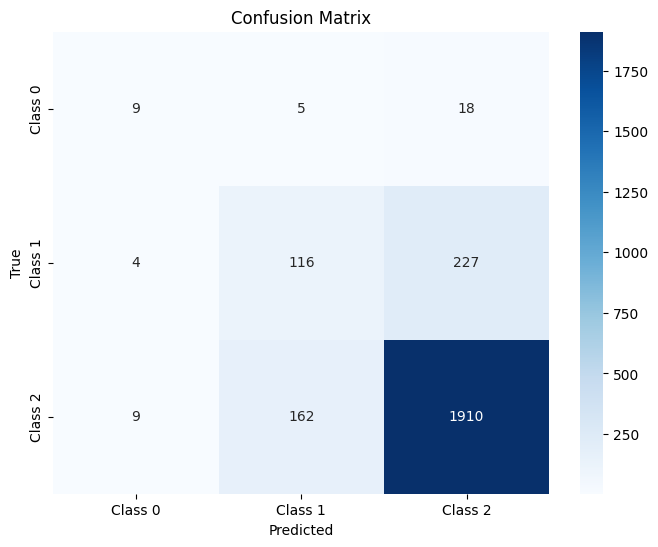

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data confusion matrix
conf_matrix = np.array([[9, 5, 18],
                        [4, 116, 227],
                        [9, 162, 1910]])

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


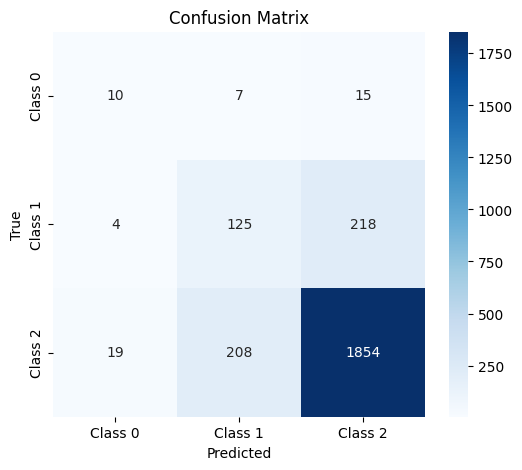

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix dari hasil prediksi
cm = np.array([[10, 7, 15],
               [4, 125, 218],
               [19, 208, 1854]])

# Label kelas (sesuai dengan jumlah kelas di dataset)
labels = ["Class 0", "Class 1", "Class 2"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Judul dan label
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Tampilkan plot
plt.show()


In [318]:

# 1. Random Forest Study
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(lambda trial: objective_rf(trial, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold), n_trials=30)

print("Best Hyperparameters for Random Forest:")
print(study_rf.best_params)
print("Best F1 Score for Random Forest:", study_rf.best_value)

best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train_smote_pca, y_train_smote)
rf_f1, rf_cm = evaluate_model(best_rf, X_train_smote_pca, y_train_smote, X_test_smote_pca, y_test_kfold)

print("\nRandom Forest Evaluation:")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Confusion Matrix:\n{rf_cm}")

joblib.dump(best_rf, 'best_rf_model.pkl')

print("\nRandom Forest model has been saved as 'best_rf_model.pkl'")




[I 2025-03-07 20:35:40,219] A new study created in memory with name: no-name-d76eef56-a98e-4fd8-b881-33b5c1dcb1ec
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 19].
  warnings.warn(
[I 2025-03-07 20:37:00,223] Trial 0 finished with value: 0.7702968856515882 and parameters: {'n_estimators': 300, 'max_depth': 70, 'min_samples_split': 4, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 0 with value: 0.7702968856515882.
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 19].
  warnings.warn(
[I 2025-03-07 20:37:12,228] Trial 1 finished with value: 0.7687285989696901 and parameters: {'n_estimators': 50, 'max_de

Best Hyperparameters for Random Forest:
{'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best F1 Score for Random Forest: 0.8079068705131252

Random Forest Evaluation:
F1-Score: 0.8079
Confusion Matrix:
[[  10    7   15]
 [   4  125  218]
 [  19  208 1854]]

Random Forest model has been saved as 'best_rf_model.pkl'


In [ ]:
# import joblib
# import numpy as np
# import pandas as pd
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.decomposition import PCA
# # from imblearn.over_sampling import SMOTETomek
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.utils.class_weight import compute_class_weight

# # Menggunakan SMOTE-Tomek
# smote_tomek = SMOTETomek(random_state=42)
# X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_kfold, y_train_kfold)

# # Membuat DataFrame dan Series untuk hasil SMOTE
# X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_kfold.columns)
# y_train_smote = pd.Series(y_train_smote)

# # Drop duplikasi dan reset index
# X_train_smote = X_train_smote.drop_duplicates().reset_index(drop=True)
# y_train_smote = y_train_smote.loc[X_train_smote.index].reset_index(drop=True)

# # PCA pada data SMOTE
# pca_smote = PCA(n_components=10)
# X_train_smote_pca = pca_smote.fit_transform(X_train_smote)
# X_test_smote_pca = pca_smote.transform(X_test_kfold)

# # Model yang digunakan untuk hyperparameter tuning
# rf_model_all_kfold = RandomForestClassifier(random_state=42)
# xgb_model_all_kfold = XGBClassifier(random_state=42)
# et_model_all_kfold = ExtraTreesClassifier(random_state=42)
# knn_model_all_kfold = KNeighborsClassifier()

# # Hyperparameter grid untuk model
# rf_param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# xgb_param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'scale_pos_weight': [1, 10, 50]
# }

# et_param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# knn_param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1, 2]
# }

# # Hyperparameter tuning dengan RandomizedSearchCV atau GridSearchCV
# rf_random_search = RandomizedSearchCV(estimator=rf_model_all_kfold, param_distributions=rf_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# xgb_random_search = RandomizedSearchCV(estimator=xgb_model_all_kfold, param_distributions=xgb_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# et_random_search = RandomizedSearchCV(estimator=et_model_all_kfold, param_distributions=et_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# knn_grid_search = GridSearchCV(estimator=knn_model_all_kfold, param_grid=knn_param_grid, cv=3, verbose=2, n_jobs=-1)

# # Fitting model dengan hyperparameter tuning
# rf_random_search.fit(X_train_smote_pca, y_train_smote)
# xgb_random_search.fit(X_train_smote_pca, y_train_smote)
# et_random_search.fit(X_train_smote_pca, y_train_smote)
# knn_grid_search.fit(X_train_smote_pca, y_train_smote)

# # Menyimpan model terbaik
# joblib.dump(rf_random_search.best_estimator_, 'rf_model_best.pkl')
# joblib.dump(xgb_random_search.best_estimator_, 'xgb_model_best.pkl')
# joblib.dump(et_random_search.best_estimator_, 'et_model_best.pkl')
# joblib.dump(knn_grid_search.best_estimator_, 'knn_model_best.pkl')

# # Evaluasi dengan confusion matrix dan classification report
# models = {
#     'RandomForest': rf_random_search.best_estimator_,
#     'XGBoost': xgb_random_search.best_estimator_,
#     'ExtraTrees': et_random_search.best_estimator_,
#     'KNN': knn_grid_search.best_estimator_
# }

# for model_name, model in models.items():
#     y_pred = model.predict(X_test_smote_pca)
#     cm = confusion_matrix(y_test_kfold, y_pred)
#     cr = classification_report(y_test_kfold, y_pred)

#     print(f"\nEvaluasi Model: {model_name}")
#     print("Confusion Matrix:")
#     print(cm)
#     print("Classification Report:")
#     print(cr)

#     # Menyimpan confusion matrix untuk analisis lebih lanjut
#     np.savetxt(f'{model_name}_confusion_matrix.csv', cm, delimiter=",")
#     np.savetxt(f'{model_name}_classification_report.csv', cr.splitlines(), delimiter=",", fmt="%s")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [328]:
import pandas as pd

# Data
data = {
    'Model Name': ['RF', 'XGB', 'LR', 'KNN', 'ET', 'RF', 'XGB', 'LR', 'KNN', 'ET', 
                   'RandomForest', 'XGBoost', 'LogisticRegression', 'KNN', 'ExtraTrees', 
                   'RandomForest', 'XGBoost', 'LogisticRegression', 'KNN', 'ExtraTrees', 
                   'RandomForest', 'XGBoost', 'LogisticRegression', 'KNN', 'ExtraTrees', 
                   'RandomForest', 'XGBoost', 'LogisticRegression', 'KNN', 'ExtraTrees'],
    'Technique': ['Weighted_Lasso_MIX', 'Weighted_Lasso_MIX', 'Weighted_Lasso_MIX', 'Weighted_Lasso_MIX', 
                  'Weighted_Lasso_MIX', 'SMOTE_Lasso_MIX', 'SMOTE_Lasso_MIX', 'SMOTE_Lasso_MIX', 
                  'SMOTE_Lasso_MIX', 'SMOTE_Lasso_MIX', 'WeightedClass_Lasso_OHE', 'WeightedClass_Lasso_OHE', 
                  'WeightedClass_Lasso_OHE', 'WeightedClass_Lasso_OHE', 'WeightedClass_Lasso_OHE', 
                  'SMOTE_Tomek_Lasso_OHE', 'SMOTE_Tomek_Lasso_OHE', 'SMOTE_Tomek_Lasso_OHE', 
                  'SMOTE_Tomek_Lasso_OHE', 'SMOTE_Tomek_Lasso_OHE', 'WeightedClass_Lasso_PCA_KFold', 
                  'WeightedClass_Lasso_PCA_KFold', 'WeightedClass_Lasso_PCA_KFold', 'WeightedClass_Lasso_PCA_KFold', 
                  'WeightedClass_Lasso_PCA_KFold', 'SMOTE_Tomek_PCA_KFold', 'SMOTE_Tomek_PCA_KFold', 
                  'SMOTE_Tomek_PCA_KFold', 'SMOTE_Tomek_PCA_KFold', 'SMOTE_Tomek_PCA_KFold'],
    'F1 Score Weighted': [0.779424, 0.748330, 0.571599, 0.785060, 0.785883, 0.781865, 0.785446, 
                          0.718598, 0.670755, 0.768853, 0.785825, 0.747318, 0.580519, 0.802648, 
                          0.787316, 0.776670, 0.791984, 0.608617, 0.483548, 0.780506, 0.812140, 
                          0.789157, 0.625214, 0.807257, 0.828360, 0.803534, 0.779741, 0.616698, 
                          0.717174, 0.807319],
    'F1 Score Micro': [0.838618, 0.722764, 0.476642, 0.833333, 0.828868, 0.813415, 0.835772, 
                       0.695935, 0.617073, 0.792279, 0.843088, 0.717480, 0.490650, 0.845528, 
                       0.838211, 0.845528, 0.848374, 0.527644, 0.411789, 0.847513, 0.857317, 
                       0.785772, 0.540244, 0.836994, 0.856099, 0.807724, 0.775203, 0.527642, 
                       0.672358, 0.814634]
}


df_evaluate = pd.DataFrame(data)

df_evaluate

# Mengurutkan dataframe berdasarkan kolom 'F1 Score Weighted'
df_sorted = df_evaluate.sort_values(by='F1 Score Weighted', ascending=False)

# Menampilkan DataFrame yang sudah diurutkan
df_sorted



Model Name                      Technique  F1 Score Weighted  \
24          ExtraTrees  WeightedClass_Lasso_PCA_KFold           0.828360   
20        RandomForest  WeightedClass_Lasso_PCA_KFold           0.812140   
29          ExtraTrees          SMOTE_Tomek_PCA_KFold           0.807319   
23                 KNN  WeightedClass_Lasso_PCA_KFold           0.807257   
25        RandomForest          SMOTE_Tomek_PCA_KFold           0.803534   
13                 KNN        WeightedClass_Lasso_OHE           0.802648   
16             XGBoost          SMOTE_Tomek_Lasso_OHE           0.791984   
21             XGBoost  WeightedClass_Lasso_PCA_KFold           0.789157   
14          ExtraTrees        WeightedClass_Lasso_OHE           0.787316   
4                   ET             Weighted_Lasso_MIX           0.785883   
10        RandomForest        WeightedClass_Lasso_OHE           0.785825   
6                  XGB                SMOTE_Lasso_MIX           0.785446   
3                  KNN             Weighted_Lasso_MIX           0.785060   
5                   RF                SMOTE_Lasso_MIX           0.781865   
19          ExtraTrees          SMOTE_Tomek_Lasso_OHE           0.780506   
26             XGBoost          SMOTE_Tomek_PCA_KFold           0.779741   
0                   RF             Weighted_Lasso_MIX           0.779424   
15        RandomForest          SMOTE_Tomek_Lasso_OHE           0.776670   
9                   ET                SMOTE_Lasso_MIX           0.768853   
1                  XGB             Weighted_Lasso_MIX           0.748330   
11             XGBoost        WeightedClass_Lasso_OHE           0.747318   
7                   LR                SMOTE_Lasso_MIX           0.718598   
28                 KNN          SMOTE_Tomek_PCA_KFold           0.717174   
8                  KNN                SMOTE_Lasso_MIX           0.670755   
22  LogisticRegression  WeightedClass_Lasso_PCA_KFold           0.625214   
27  LogisticRegression          SMOTE_Tomek_PCA_KFold           0.616698   
17  LogisticRegression          SMOTE_Tomek_Lasso_OHE           0.608617   
12  LogisticRegression        WeightedClass_Lasso_OHE           0.580519   
2                   LR             Weighted_Lasso_MIX           0.571599   
18                 KNN          SMOTE_Tomek_Lasso_OHE           0.483548   

    F1 Score Micro  
24        0.856099  
20        0.857317  
29        0.814634  
23        0.836994  
25        0.807724  
13        0.845528  
16        0.848374  
21        0.785772  
14        0.838211  
4         0.828868  
10        0.843088  
6         0.835772  
3         0.833333  
5         0.813415  
19        0.847513  
26        0.775203  
0         0.838618  
15        0.845528  
9         0.792279  
1         0.722764  
11        0.717480  
7         0.695935  
28        0.672358  
8         0.617073  
22        0.540244  
27        0.527642  
17        0.527644  
12        0.490650  
2         0.476642  
18        0.411789